In [49]:
import os
import json
import numpy as np
import pandas as pd
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
%config InlineBackend.figure_format ='retina'

sns.set(font_scale=1.5)

sns.set_style('darkgrid',
              {'xtick.bottom' : True,
               'ytick.left': True,
               'grid.linestyle':'--',
               'font.monospace': ['Computer Modern Typewriter'],
               'axes.edgecolor' : 'white'})

In [51]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [52]:
repos = [
    'Eccoar_Complaint',
    'eccoar_frontend',
    'Eccoar_Gateway',
    'Eccoar_Mailer',
    'Eccoar_Reports',
    'Eccoar_Users'
]

language = [['Eccoar_Complaint', 'ts'], 
            ['eccoar_frontend', 'ts'], 
            ['Eccoar_Gateway', 'ts'], 
            ['Eccoar_Mailer', 'ts'], 
            ['Eccoar_Reports', 'ts'], 
            ['Eccoar_Users', 'ts']]
repos_language = {}

for item in language:
    repos_language[f"{item[0]}"] = item[1]

In [53]:
jsons = glob('data/fga-eps-mds-2020-2-data/eccoar/analytics-raw-data/*.json')

In [54]:
jsons

['data/fga-eps-mds-2020-2-data/eccoar/analytics-raw-data/fga-eps-mds-2020_2-Eccoar_Mailer-22-04-2021-00:00.json',
 'data/fga-eps-mds-2020-2-data/eccoar/analytics-raw-data/fga-eps-mds-2020_2-Eccoar_Complaint-17-04-2021-00:00.json',
 'data/fga-eps-mds-2020-2-data/eccoar/analytics-raw-data/fga-eps-mds-2020_2-eccoar_frontend-17-05-2021-00:00.json',
 'data/fga-eps-mds-2020-2-data/eccoar/analytics-raw-data/fga-eps-mds-2020_2-eccoar_frontend-21-04-2021-00:00.json',
 'data/fga-eps-mds-2020-2-data/eccoar/analytics-raw-data/fga-eps-mds-2020_2-Eccoar_Users-17-05-2021-00:00.json',
 'data/fga-eps-mds-2020-2-data/eccoar/analytics-raw-data/fga-eps-mds-2020_2-Eccoar_Complaint-27-04-2021-00:00.json',
 'data/fga-eps-mds-2020-2-data/eccoar/analytics-raw-data/fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021-00:00.json',
 'data/fga-eps-mds-2020-2-data/eccoar/analytics-raw-data/fga-eps-mds-2020_2-Eccoar_Mailer-12-04-2021-00:00.json',
 'data/fga-eps-mds-2020-2-data/eccoar/analytics-raw-data/fga-eps-mds-2020_2-

In [55]:
def read_json(json_path):

    with open(json_path) as json_file:
        json_obj = json.load(json_file)

    return json_obj

In [79]:
def create_base_component_df(json_list):

    df = pd.DataFrame()

    for i in json_list:

        base_component = read_json(i)

        base_component_data = base_component['baseComponent']['measures']

        base_component_df = pd.DataFrame(base_component_data)

        base_component_df['filename'] = os.path.basename(i)

        df = df.append(base_component_df, ignore_index=True)

    aux_df = df['filename'].str.split(r"fga-eps-mds-2020_2-(.*?)-(.*?).json", expand=True)

    df['repository'] = aux_df[1]

    df['version'] = aux_df[2]

    df = df.sort_values(by=['repository', 'version'])

    return df

In [81]:
base_component_df = create_base_component_df(jsons)

In [82]:
base_component_df.head(10)

,metric,value,bestValue,filename,repository,version
72,duplicated_lines_density,0.0,True,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,01-05-2021-00:00
73,functions,42,NaN,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,01-05-2021-00:00
74,test_execution_time,70,NaN,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,01-05-2021-00:00
75,security_rating,1.0,True,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,01-05-2021-00:00
76,tests,21,NaN,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,01-05-2021-00:00
77,files,19,NaN,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,01-05-2021-00:00
78,complexity,60,NaN,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,01-05-2021-00:00
79,ncloc,626,NaN,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,01-05-2021-00:00
80,coverage,68.2,False,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,01-05-2021-00:00
81,reliability_rating,1.0,True,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,01-05-2021-00:00


In [ ]:
metric_list = ['files',
               'functions',
               'complexity',
               'comment_lines_density',
               'duplicated_lines_density',
               'coverage',
               'ncloc',
               'security_rating',
               'tests',
               'test_success_density',
               'test_execution_time',
               'reliability_rating']

len(metric_list)

In [ ]:
def metric_per_file(json):

    file_json = []

    for component in json['components']:
        if component['qualifier'] == 'FIL':
            file_json.append(component)

    return file_json

In [ ]:
def generate_file_dataframe(metric_list, json, language_extension):

    df_columns = metric_list
    df = pd.DataFrame(columns = df_columns)

    for file in json:
        try:
            if file['language'] == language_extension:
                for measure in file['measures']:
                    df.at[file['path'], measure['metric']] = measure['value']
        except:
            pass

    df.reset_index(inplace = True)
    df = df.rename({'index': 'path'}, axis=1).drop(['files'], axis=1)

    return df

In [ ]:
def generate_file_dataframe_per_release(metric_list, json, language_extension):

    df_columns = metric_list
    df = pd.DataFrame(columns = df_columns)

    for file in json:
        try:
            if file['language'] == language_extension:
                for measure in file['measures']:
                    df.at[file['path'], measure['metric']] = measure['value']
        except:
            pass

    df.reset_index(inplace = True)
    df = df.rename({'index': 'path'}, axis=1).drop(['files'], axis=1)

    return df

In [85]:
def create_file_df(json_list):

    df = pd.DataFrame()

    for i in json_list:

        file_component = read_json(i)

        file_component_data = metric_per_file(file_component)

        file_component_df = generate_file_dataframe_per_release(metric_list, file_component_data, language_extension = 'ts')

        file_component_df['filename'] = os.path.basename(i)

        df = df.append(file_component_df, ignore_index=True)

    # replace TeamName by yours.
    aux_df = df['filename'].str.split(r"fga-eps-mds-2020_2-(.*?)-(.*?).json", expand=True)

    df['repository'] = aux_df[1]

    df['version'] = aux_df[2]

    df = df.sort_values(by=['repository', 'version'])

    return df

In [86]:
file_component_df = create_file_df(jsons)

In [87]:
file_component_df.head(10)

,path,functions,complexity,comment_lines_density,duplicated_lines_density,coverage,ncloc,security_rating,tests,test_success_density,test_execution_time,reliability_rating,filename,repository,version
109,src/migration/1618526567509-CreateComplaint.ts,2,2,0.0,0.0,0.0,76,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,01-05-2021-00:00
110,src/migration/1618529825437-CreateVote.ts,2,2,0.0,0.0,0.0,38,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,01-05-2021-00:00
111,src/utils/Category.ts,0,0,0.0,0.0,100.0,5,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,01-05-2021-00:00
112,src/entity/Complaint.ts,0,0,0.0,0.0,100.0,36,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,01-05-2021-00:00
113,src/repositories/ComplaintRepository.ts,7,7,0.0,0.0,61.3,80,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,01-05-2021-00:00
114,src/utils/ComplaintUpvote.ts,1,3,0.0,0.0,63.6,16,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,01-05-2021-00:00
115,src/utils/ComplaintVote.ts,0,0,0.0,0.0,NaN,9,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,01-05-2021-00:00
116,src/utils/ComplaintVoteConfirmed.ts,1,3,0.0,0.0,92.3,18,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,01-05-2021-00:00
117,src/utils/ComplaintWithVote.ts,0,0,0.0,0.0,NaN,18,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,01-05-2021-00:00
118,src/controllers/ControllerComplaint.ts,13,24,0.0,0.0,90.3,170,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-Eccoar_Complaint-01-05-2021...,Eccoar_Complaint,01-05-2021-00:00


In [121]:
# Create dataframe per repository

repository_dataframes = {}

for repository in repos:
    df = file_component_df[file_component_df['repository'] == f"{repository}"]
    df.name = f"{repository}"
    repository_dataframes[f"{repository}"] = df

repository_dataframes.keys()

dict_keys(['Eccoar_Complaint', 'eccoar_frontend', 'Eccoar_Gateway', 'Eccoar_Mailer', 'Eccoar_Reports', 'Eccoar_Users'])

In [122]:
eccoar_complaint_df = file_component_df[file_component_df['repository'] == 'Eccoar_Complaint']
eccoar_gateway_df = file_component_df[file_component_df['repository'] == 'Eccoar_Gateway']
eccoar_frontend_df = file_component_df[file_component_df['repository'] == 'eccoar_frontend']
eccoar_reports_df = file_component_df[file_component_df['repository'] == 'Eccoar_Reports']
eccoar_mailer_df = file_component_df[file_component_df['repository'] == 'Eccoar_Mailer']
eccoar_users_df = file_component_df[file_component_df['repository'] == 'Eccoar_Users']

#### COMPLEXITY

In [123]:
def m1(df):

    density_non_complex_files = len(df[(df['complexity'].astype(float)/df['functions'].astype(float)) < 10])/len(df)

    return density_non_complex_files

#### COMMENTS

In [124]:
def m2(df):

    density_comment_files = len(df[(df['comment_lines_density'].astype(float) > 10) & (df['comment_lines_density'].astype(float) < 30)])/len(df)

    return density_comment_files

#### DUPLICATIONS

In [125]:
def m3(df):

    duplication = len(df[(df['duplicated_lines_density'].astype(float) < 5)])/len(df)

    return duplication

In [126]:
def _ncloc(df):
    ncloc = 0
    for each in df['ncloc']:
        ncloc += int(each)

    return ncloc

In [127]:
# Calculating m1, m2 and m3 for each repository

def create_metrics_df(df):

    version_vec = df['version'].unique()

    m1_list = []
    m2_list = []
    m3_list = []
    repository_list = []
    version_list = []

    metrics_df = pd.DataFrame()

    for version in version_vec:

        version_df = df[df['version'] == version]

        m1_list.append(m1(version_df))
        m2_list.append(m2(version_df))
        m3_list.append(m3(version_df))
        repository_list.append(version_df['repository'].iloc[0])
        version_list.append(version)

    metrics_df = pd.DataFrame({'m1': m1_list,
                               'm2': m2_list,
                               'm3': m3_list,
                               'repository': repository_list,
                               'version': version_list})

    return metrics_df

In [128]:
repository_metrics = {}

for repository, repo_df in repository_dataframes.items():
    metrics_df = create_metrics_df(repo_df)
    metrics_df.name = f"{repository}"
    repository_metrics[f"{repository}"] = metrics_df

In [129]:
repository_dataframes["eccoar_frontend"].head(10)

,path,functions,complexity,comment_lines_density,duplicated_lines_density,coverage,ncloc,security_rating,tests,test_success_density,test_execution_time,reliability_rating,filename,repository,version
480,src/services/api.ts,0,1,0.0,0.0,100.0,4,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-eccoar_frontend-03-05-2021-...,eccoar_frontend,03-05-2021-00:00
481,src/App.tsx,1,1,0.0,0.0,0.0,12,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-eccoar_frontend-03-05-2021-...,eccoar_frontend,03-05-2021-00:00
482,src/components/Backdrop.tsx,1,1,0.0,0.0,50.0,8,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-eccoar_frontend-03-05-2021-...,eccoar_frontend,03-05-2021-00:00
483,src/components/Button.tsx,1,9,7.9,0.0,93.9,70,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-eccoar_frontend-03-05-2021-...,eccoar_frontend,03-05-2021-00:00
484,src/components/complainCard.tsx,4,14,6.0,0.0,95.7,126,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-eccoar_frontend-03-05-2021-...,eccoar_frontend,03-05-2021-00:00
485,src/services/complaint.ts,5,5,0.0,0.0,77.3,69,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-eccoar_frontend-03-05-2021-...,eccoar_frontend,03-05-2021-00:00
486,src/pages/ComplaintDetails.tsx,7,17,0.0,0.0,24.5,139,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-eccoar_frontend-03-05-2021-...,eccoar_frontend,03-05-2021-00:00
487,src/components/DisplayMap.tsx,1,1,0.0,0.0,50.0,20,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-eccoar_frontend-03-05-2021-...,eccoar_frontend,03-05-2021-00:00
488,src/components/Drawer.tsx,5,8,0.0,0.0,52.6,82,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-eccoar_frontend-03-05-2021-...,eccoar_frontend,03-05-2021-00:00
489,src/utils/emailValidation.ts,1,1,0.0,0.0,100.0,4,1.0,NaN,100.0,NaN,1.0,fga-eps-mds-2020_2-eccoar_frontend-03-05-2021-...,eccoar_frontend,03-05-2021-00:00


In [130]:
repository_metrics["eccoar_frontend"]

,m1,m2,m3,repository,version
0,0.906250,0.031250,1.0,eccoar_frontend,03-05-2021-00:00
1,0.906250,0.031250,1.0,eccoar_frontend,08-05-2021-00:00
2,0.906250,0.031250,1.0,eccoar_frontend,10-05-2021-00:00
3,0.875000,0.041667,1.0,eccoar_frontend,12-04-2021-00:00
4,0.875000,0.041667,1.0,eccoar_frontend,17-04-2021-00:00
5,0.911765,0.029412,1.0,eccoar_frontend,17-05-2021-00:00
6,0.875000,0.041667,1.0,eccoar_frontend,21-04-2021-00:00
7,0.850000,0.050000,1.0,eccoar_frontend,23-03-2021-00:00
8,0.888889,0.037037,1.0,eccoar_frontend,23-04-2021-00:00
9,0.888889,0.037037,1.0,eccoar_frontend,26-04-2021-00:00


In [131]:
repository_metrics["Eccoar_Gateway"]

,m1,m2,m3,repository,version
0,0.875000,0.0,1.0,Eccoar_Gateway,01-05-2021-00:00
1,0.875000,0.0,1.0,Eccoar_Gateway,03-05-2021-00:00
2,0.875000,0.0,1.0,Eccoar_Gateway,05-05-2021-00:00
3,0.875000,0.0,1.0,Eccoar_Gateway,10-05-2021-00:00
4,1.000000,0.0,1.0,Eccoar_Gateway,12-04-2021-00:00
5,1.000000,0.0,1.0,Eccoar_Gateway,17-04-2021-00:00
6,0.909091,0.0,1.0,Eccoar_Gateway,17-05-2021-00:00
7,1.000000,0.0,1.0,Eccoar_Gateway,23-03-2021-00:00
8,1.000000,0.0,1.0,Eccoar_Gateway,23-04-2021-00:00
9,0.875000,0.0,1.0,Eccoar_Gateway,28-04-2021-00:00


In [132]:
repository_metrics["Eccoar_Mailer"]

,m1,m2,m3,repository,version
0,0.600000,0.0,1.0,Eccoar_Mailer,03-05-2021-00:00
1,0.666667,0.0,1.0,Eccoar_Mailer,12-04-2021-00:00
2,0.666667,0.0,1.0,Eccoar_Mailer,17-04-2021-00:00
3,0.600000,0.0,1.0,Eccoar_Mailer,17-05-2021-00:00
4,0.666667,0.0,1.0,Eccoar_Mailer,22-04-2021-00:00
5,0.714286,0.0,1.0,Eccoar_Mailer,23-03-2021-00:00
6,0.666667,0.0,1.0,Eccoar_Mailer,23-04-2021-00:00
7,0.600000,0.0,1.0,Eccoar_Mailer,27-04-2021-00:00


In [133]:
repository_metrics["Eccoar_Reports"]

,m1,m2,m3,repository,version
0,0.700000,0.0,1.0,Eccoar_Reports,03-05-2021-00:00
1,0.777778,0.0,1.0,Eccoar_Reports,12-04-2021-00:00
2,0.777778,0.0,1.0,Eccoar_Reports,17-04-2021-00:00
3,0.700000,0.0,1.0,Eccoar_Reports,17-05-2021-00:00
4,1.000000,0.0,1.0,Eccoar_Reports,23-03-2021-00:00
5,0.700000,0.0,1.0,Eccoar_Reports,27-04-2021-00:00


In [134]:
repository_metrics["Eccoar_Users"]

,m1,m2,m3,repository,version
0,0.666667,0.0,1.0,Eccoar_Users,03-05-2021-00:00
1,0.666667,0.0,1.0,Eccoar_Users,10-05-2021-00:00
2,1.000000,0.0,1.0,Eccoar_Users,12-04-2021-00:00
3,0.666667,0.0,1.0,Eccoar_Users,17-05-2021-00:00
4,1.000000,0.0,1.0,Eccoar_Users,23-03-2021-00:00
5,0.666667,0.0,1.0,Eccoar_Users,23-04-2021-00:00


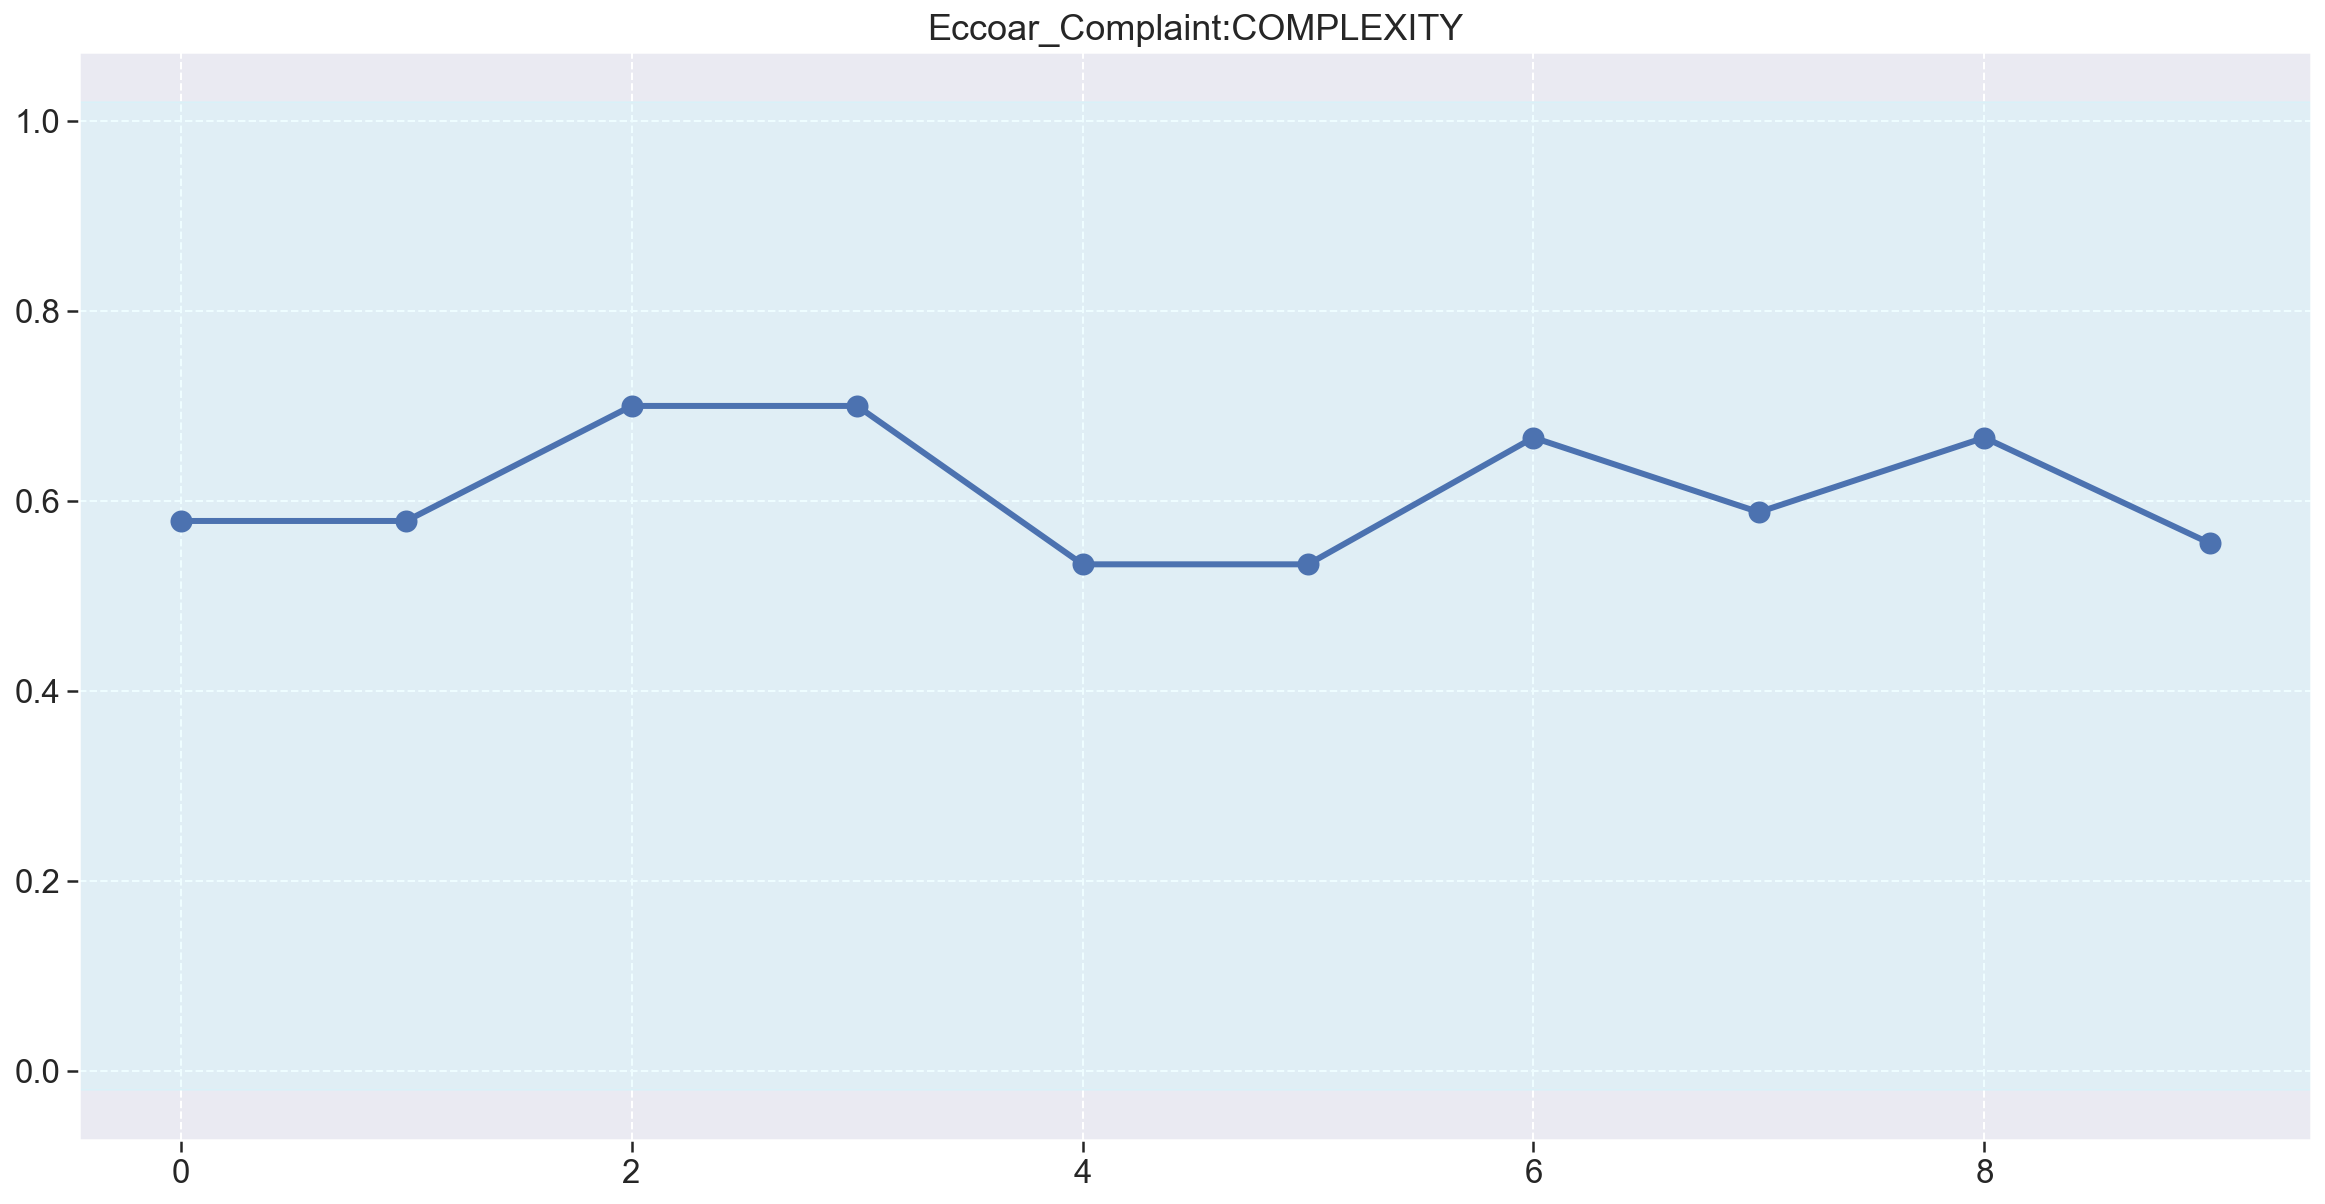

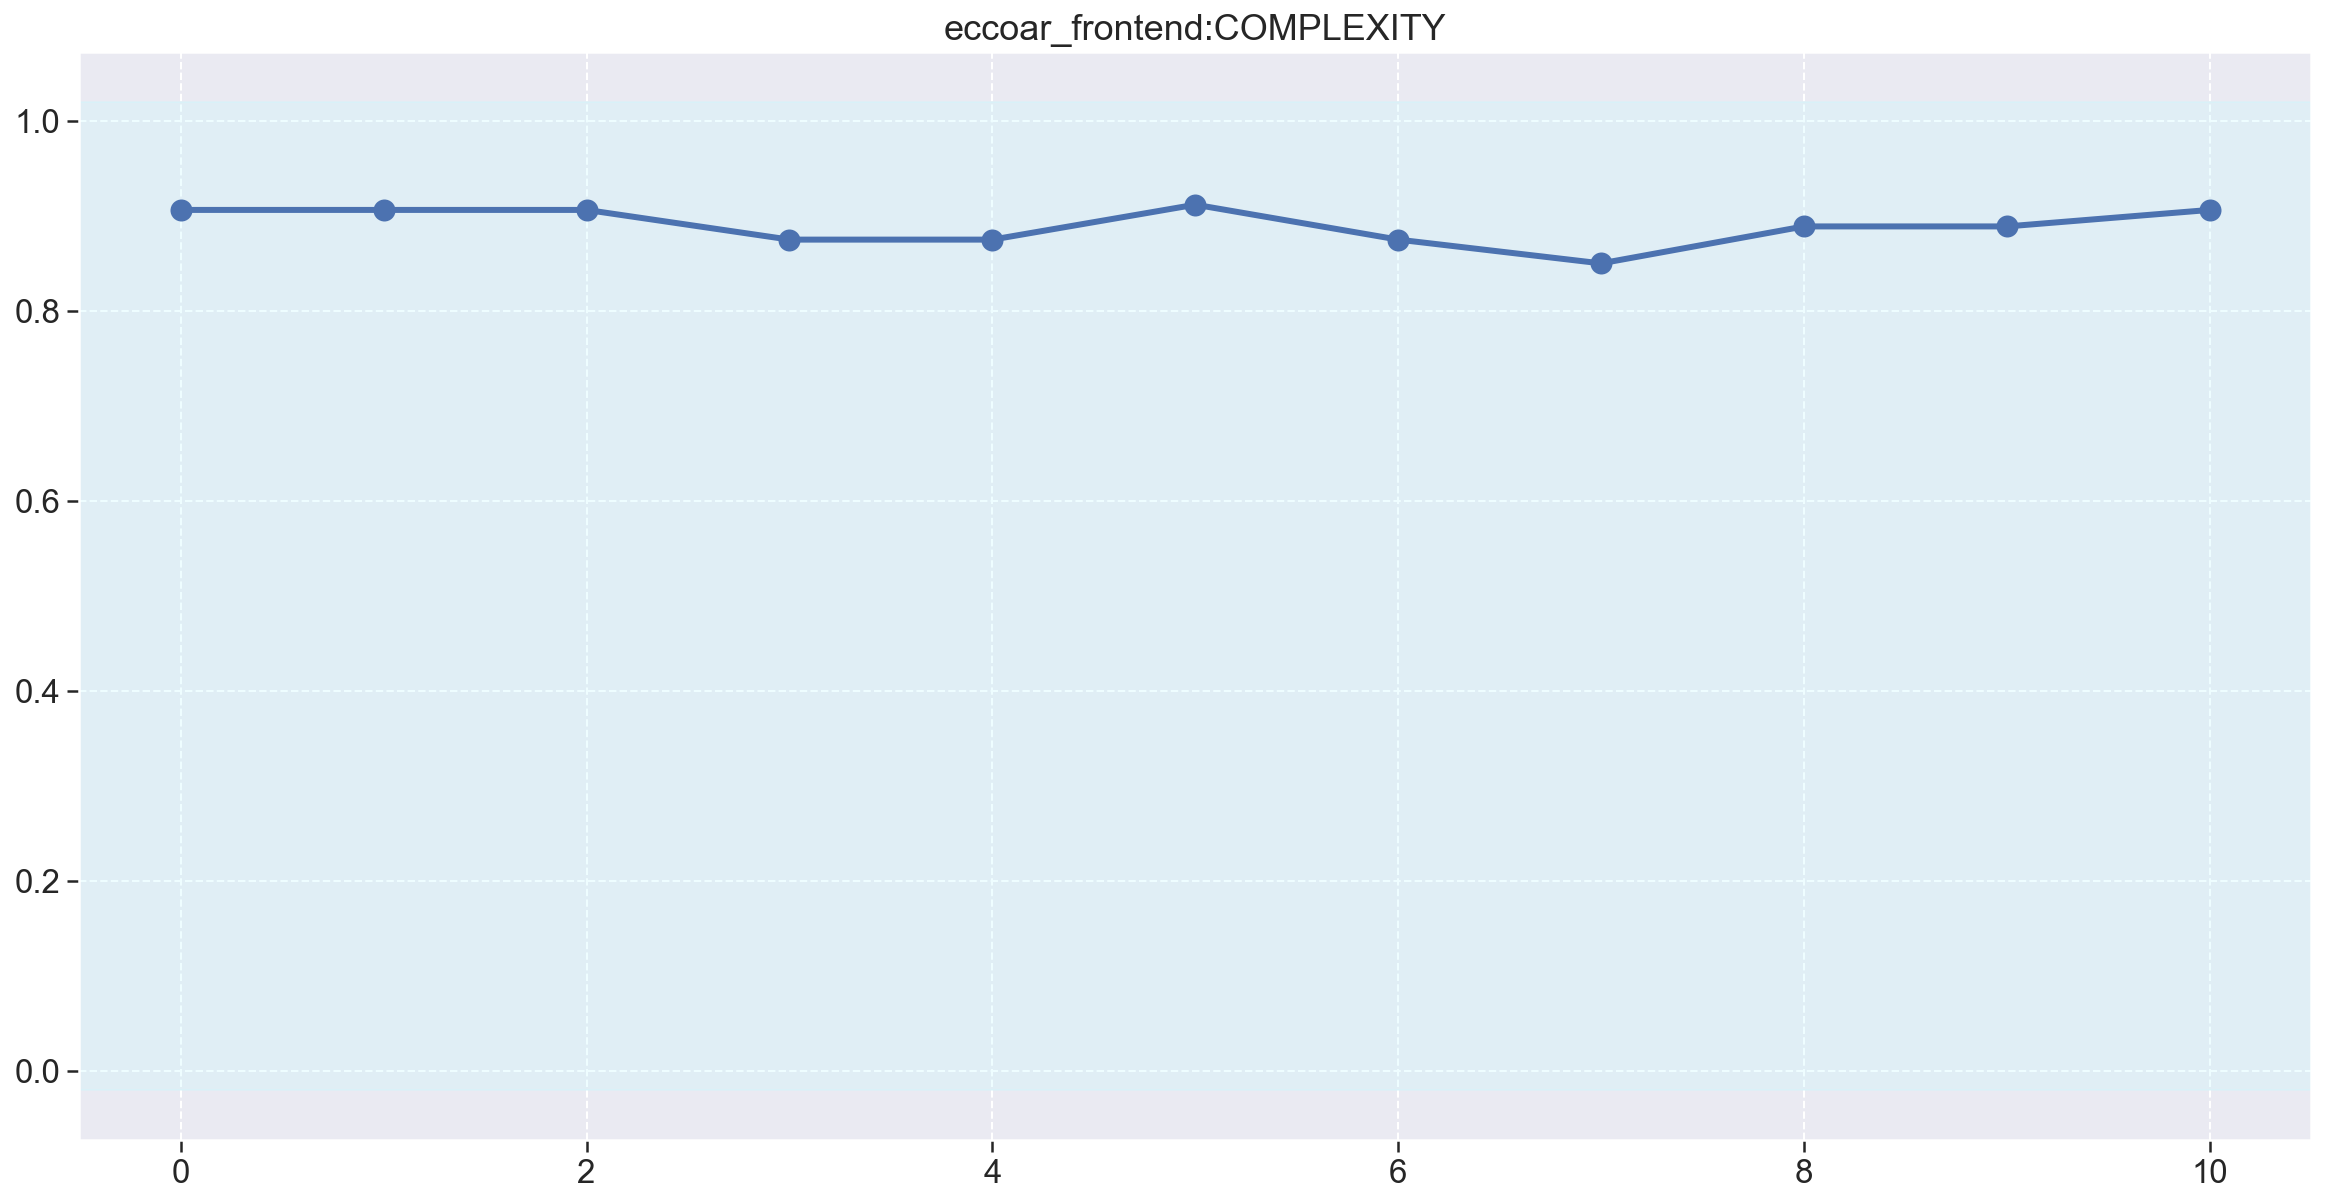

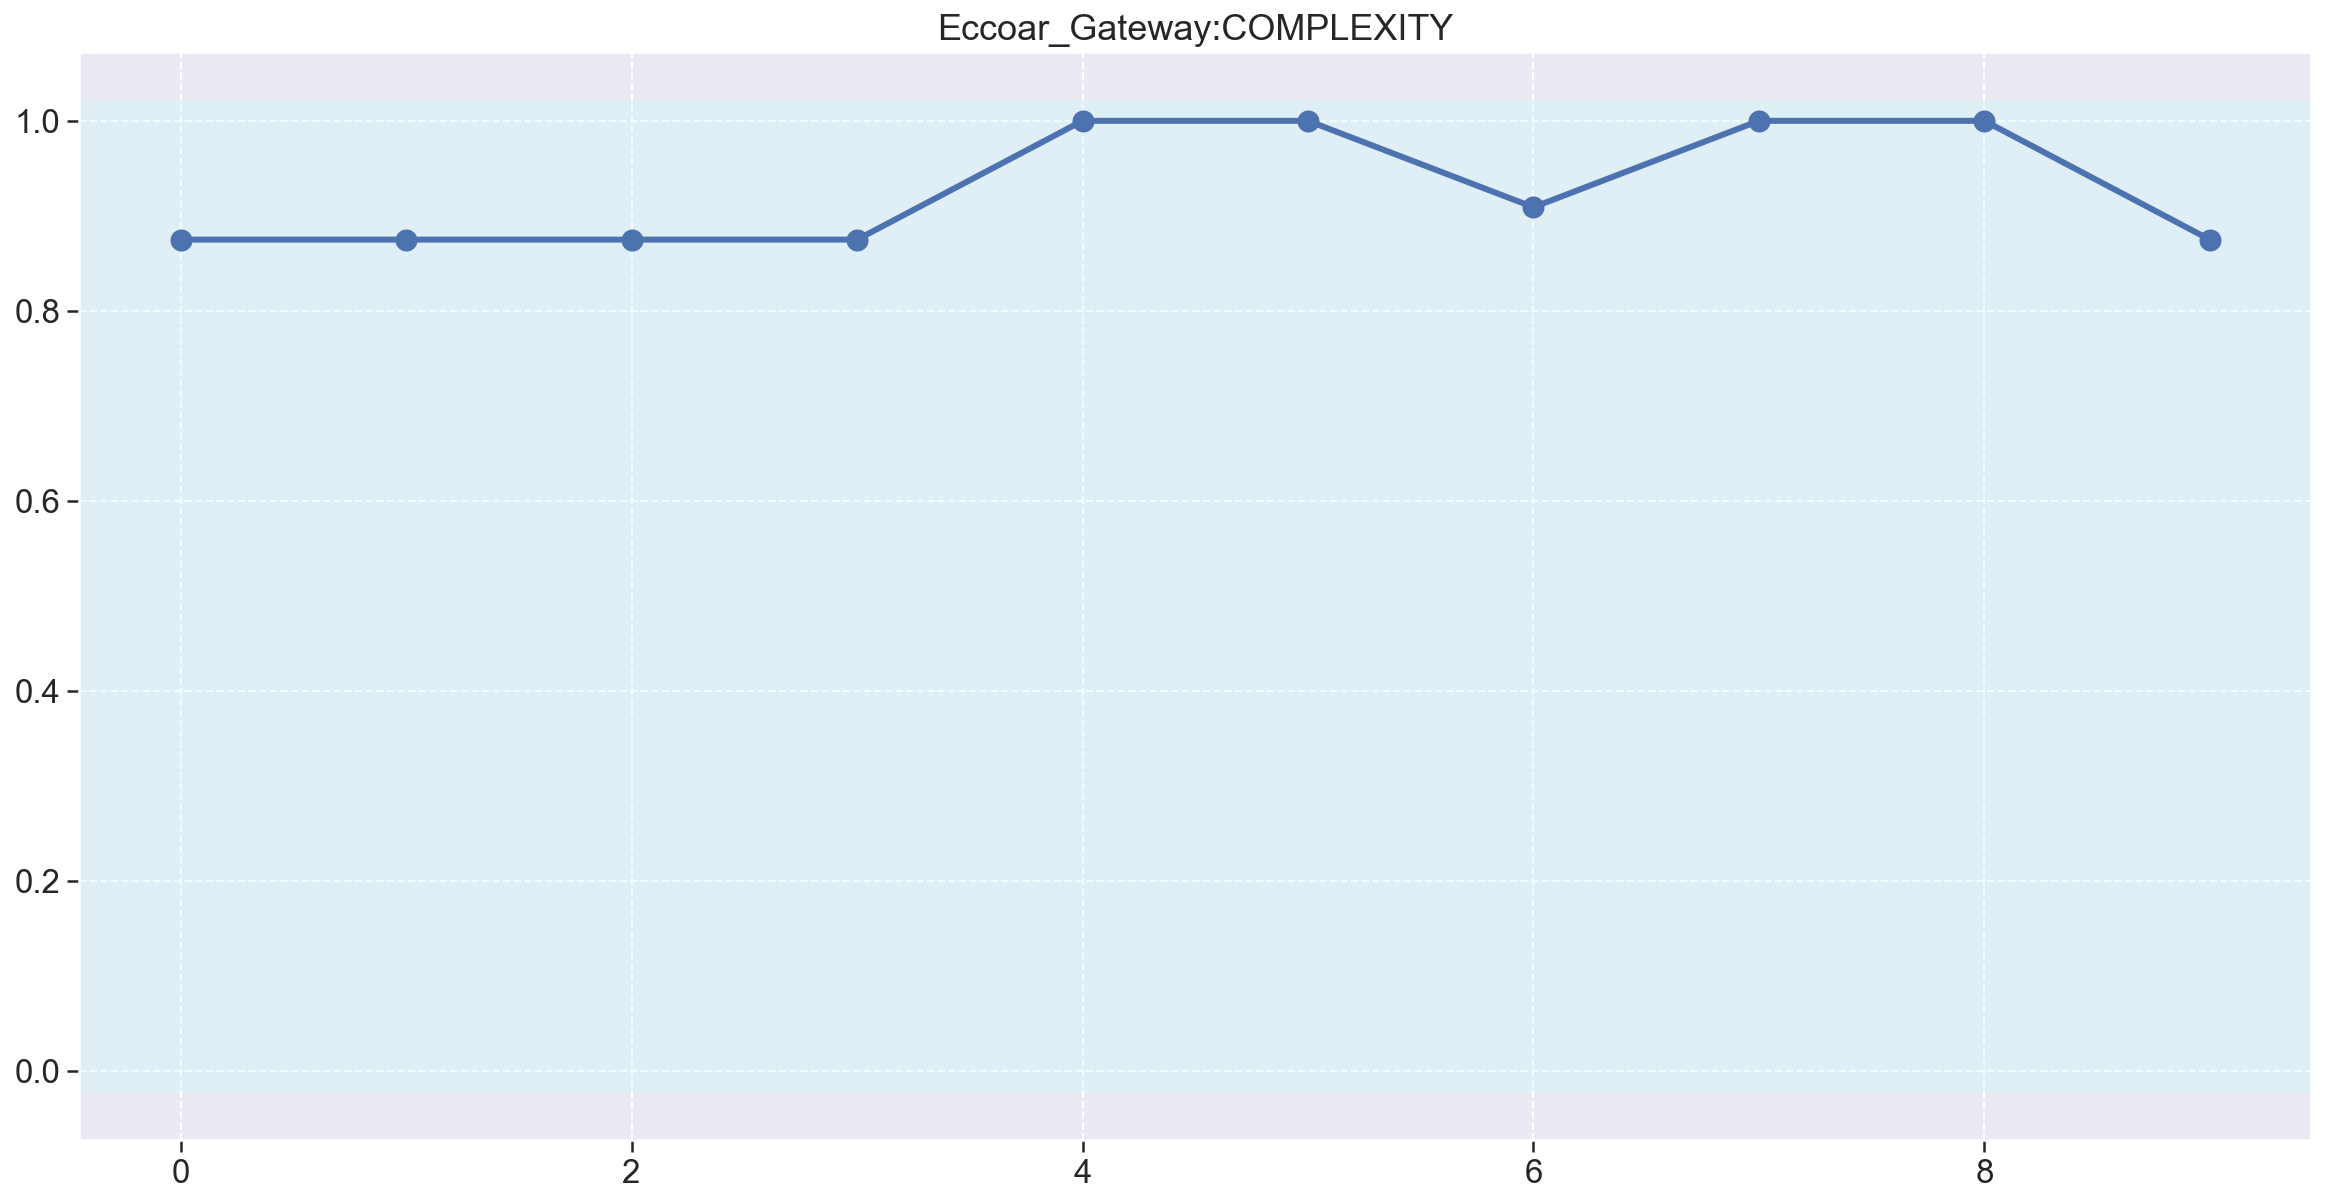

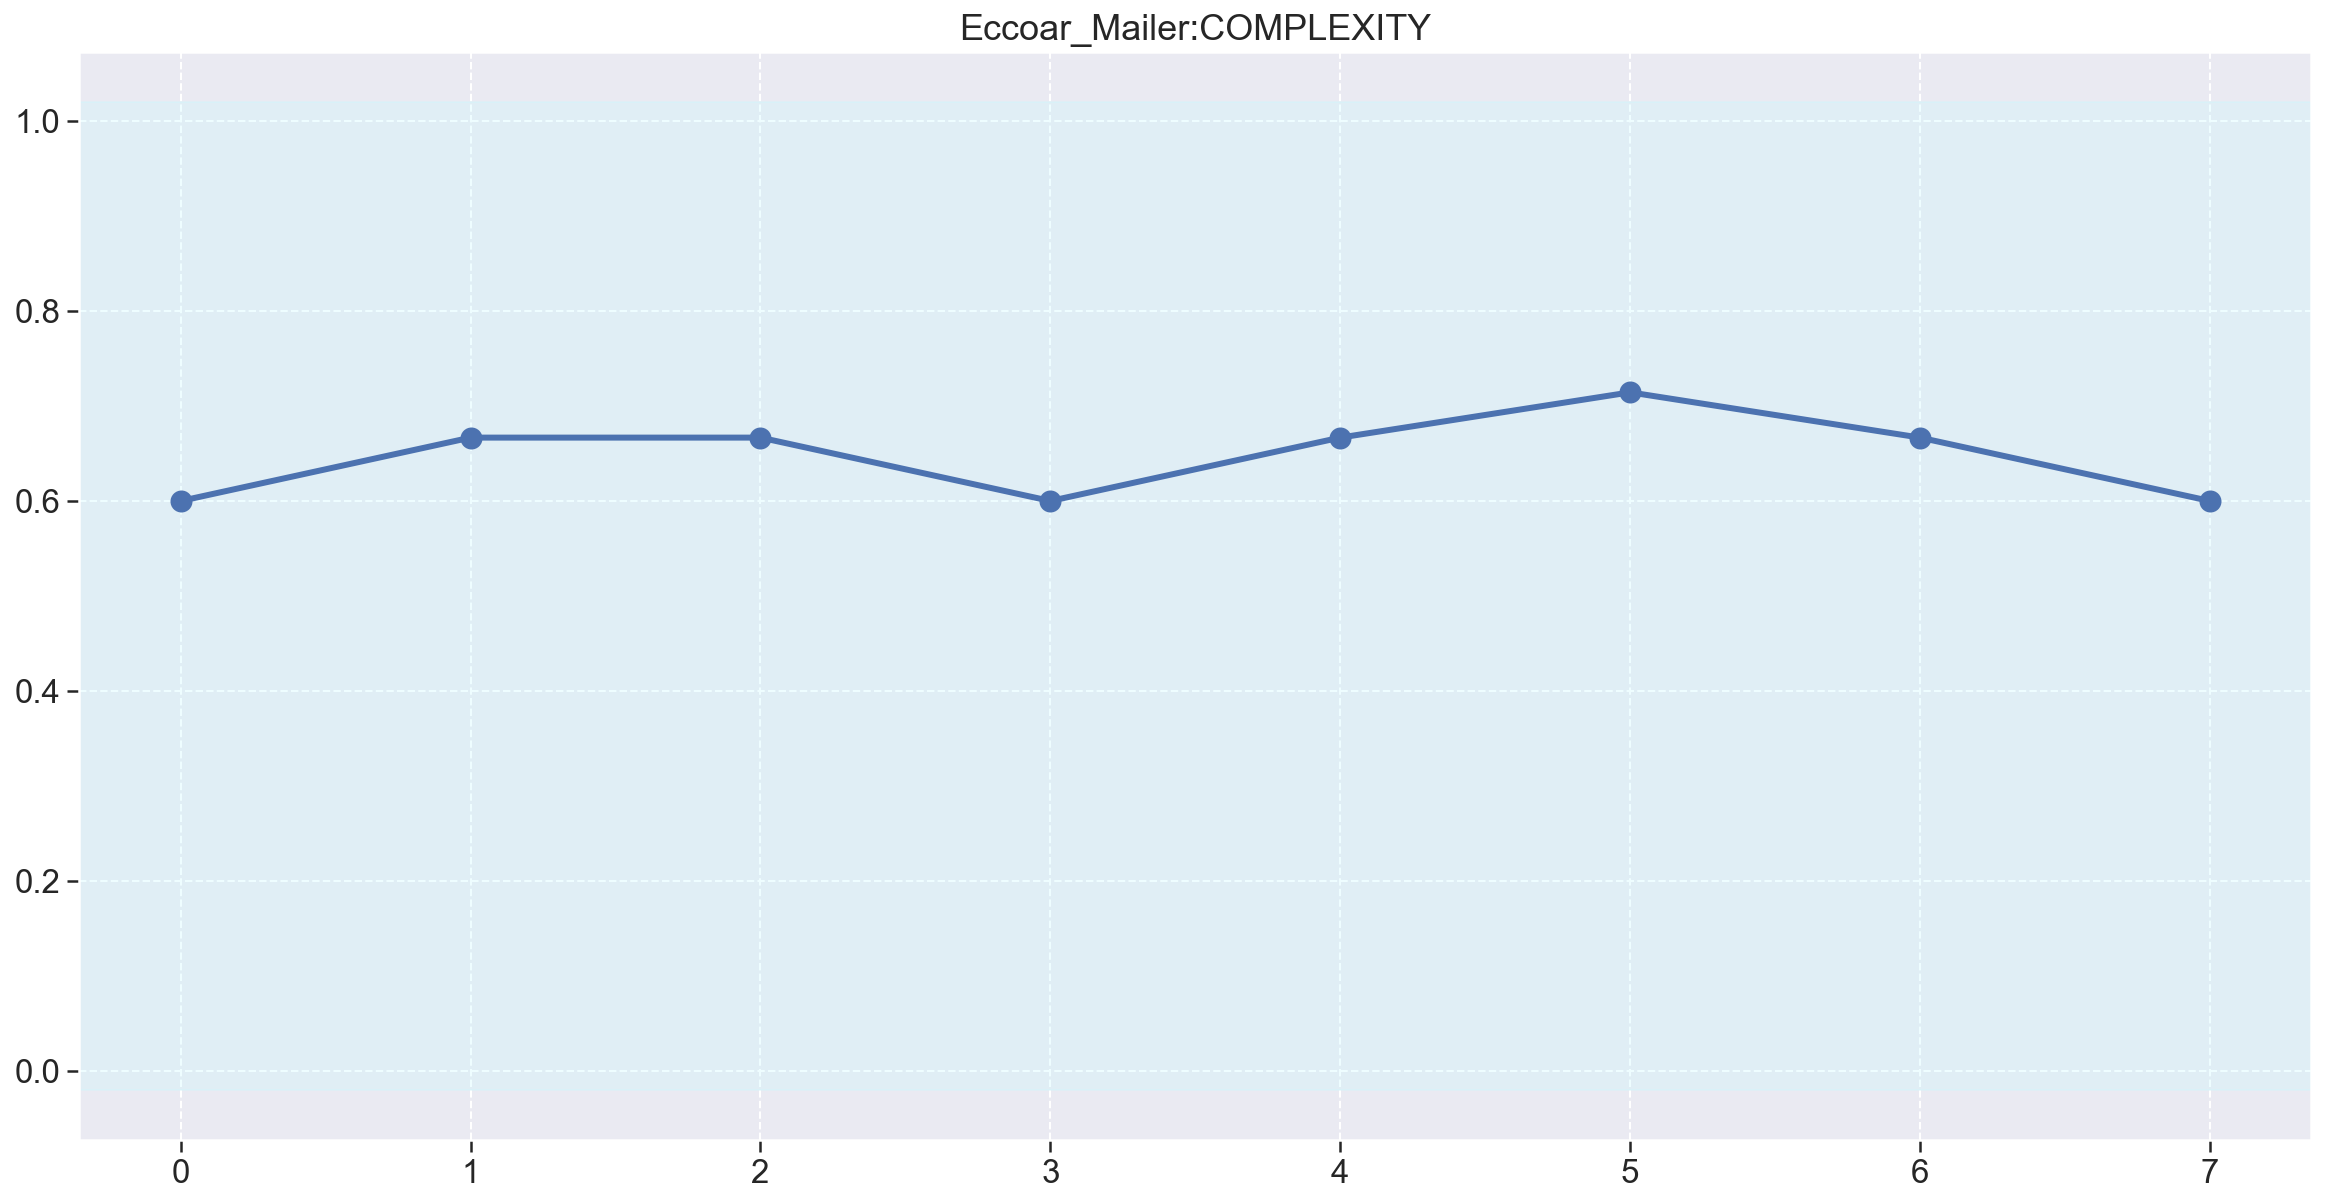

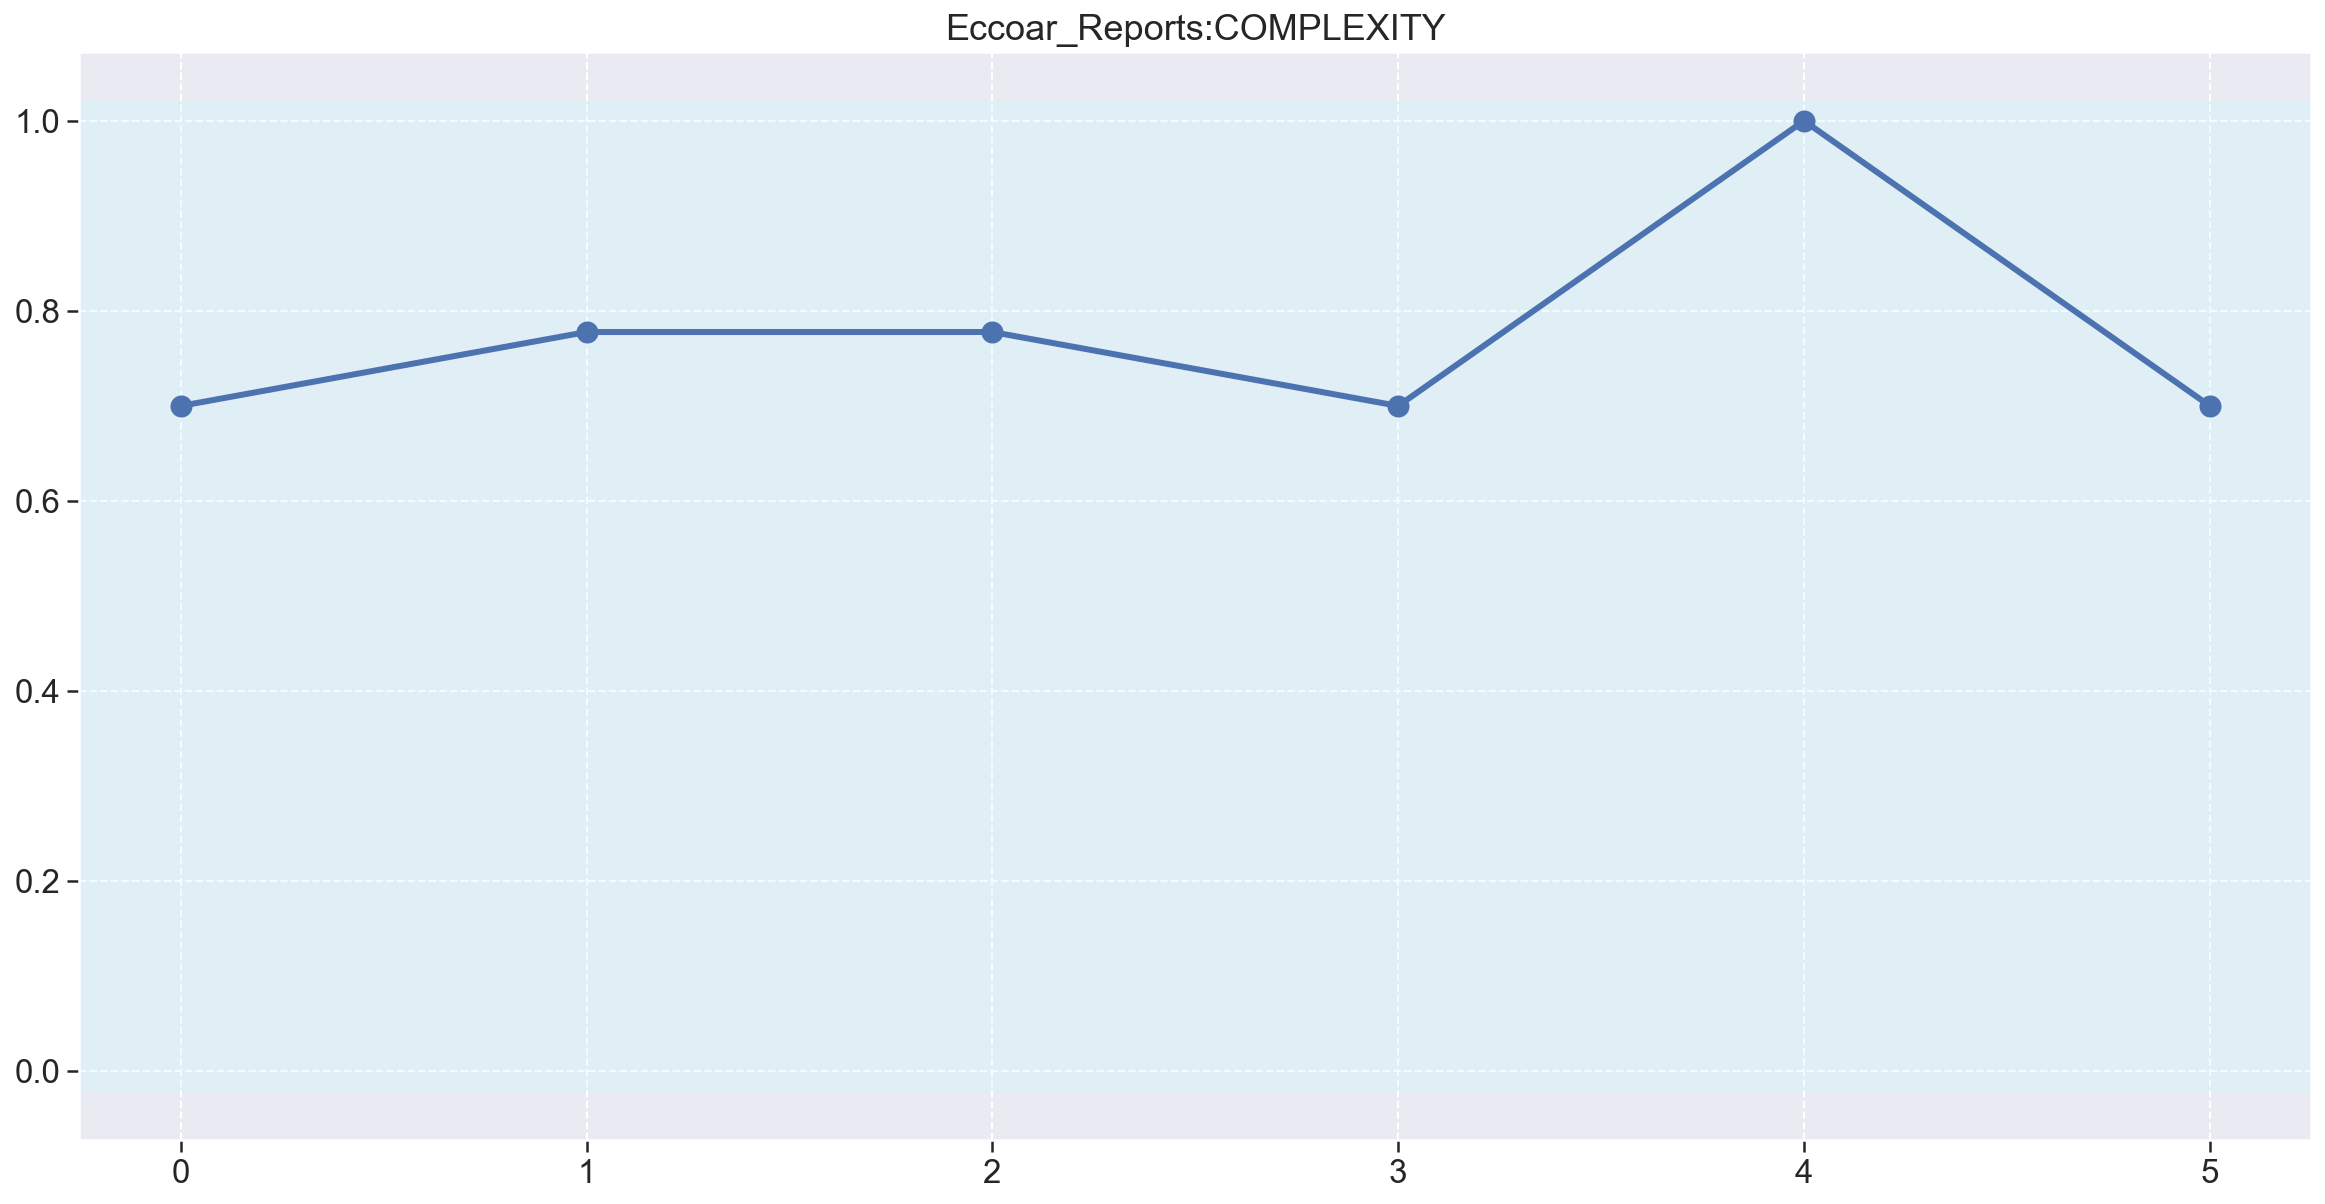

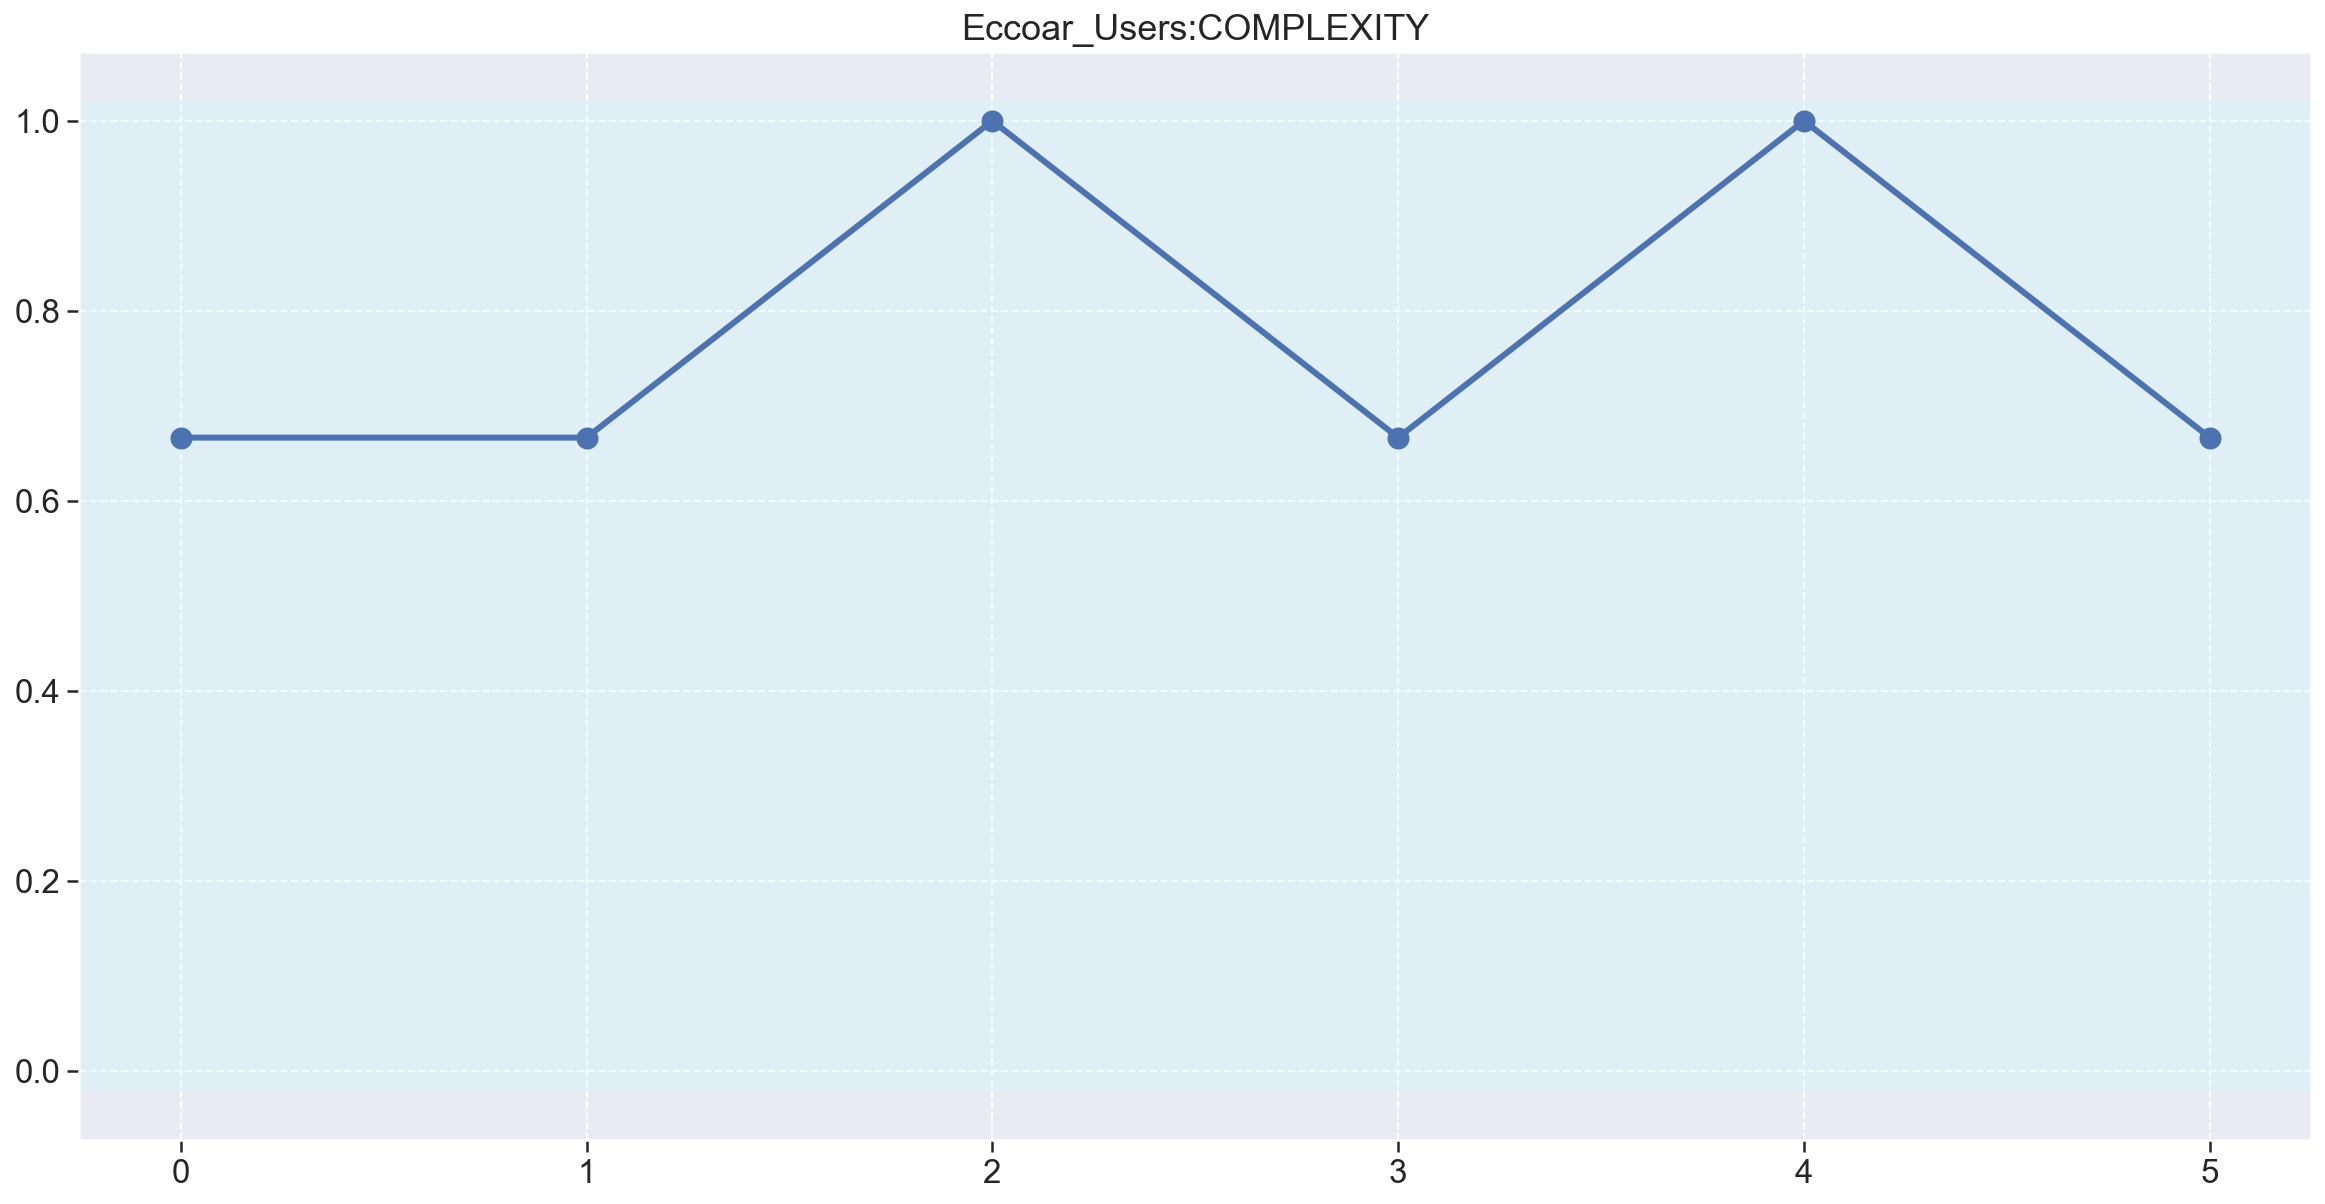

In [153]:
for repository, metrics_df in repository_metrics.items():
    fig = plt.figure(figsize=(20, 10))
    plt.title(f"{repository}:COMPLEXITY")
    plt.plot(metrics_df['m1'], linewidth=3, marker='o', markersize=10)
    # Background color
    plt.axhspan(-.02,1.02, color="#c9f9ff", alpha=0.3)

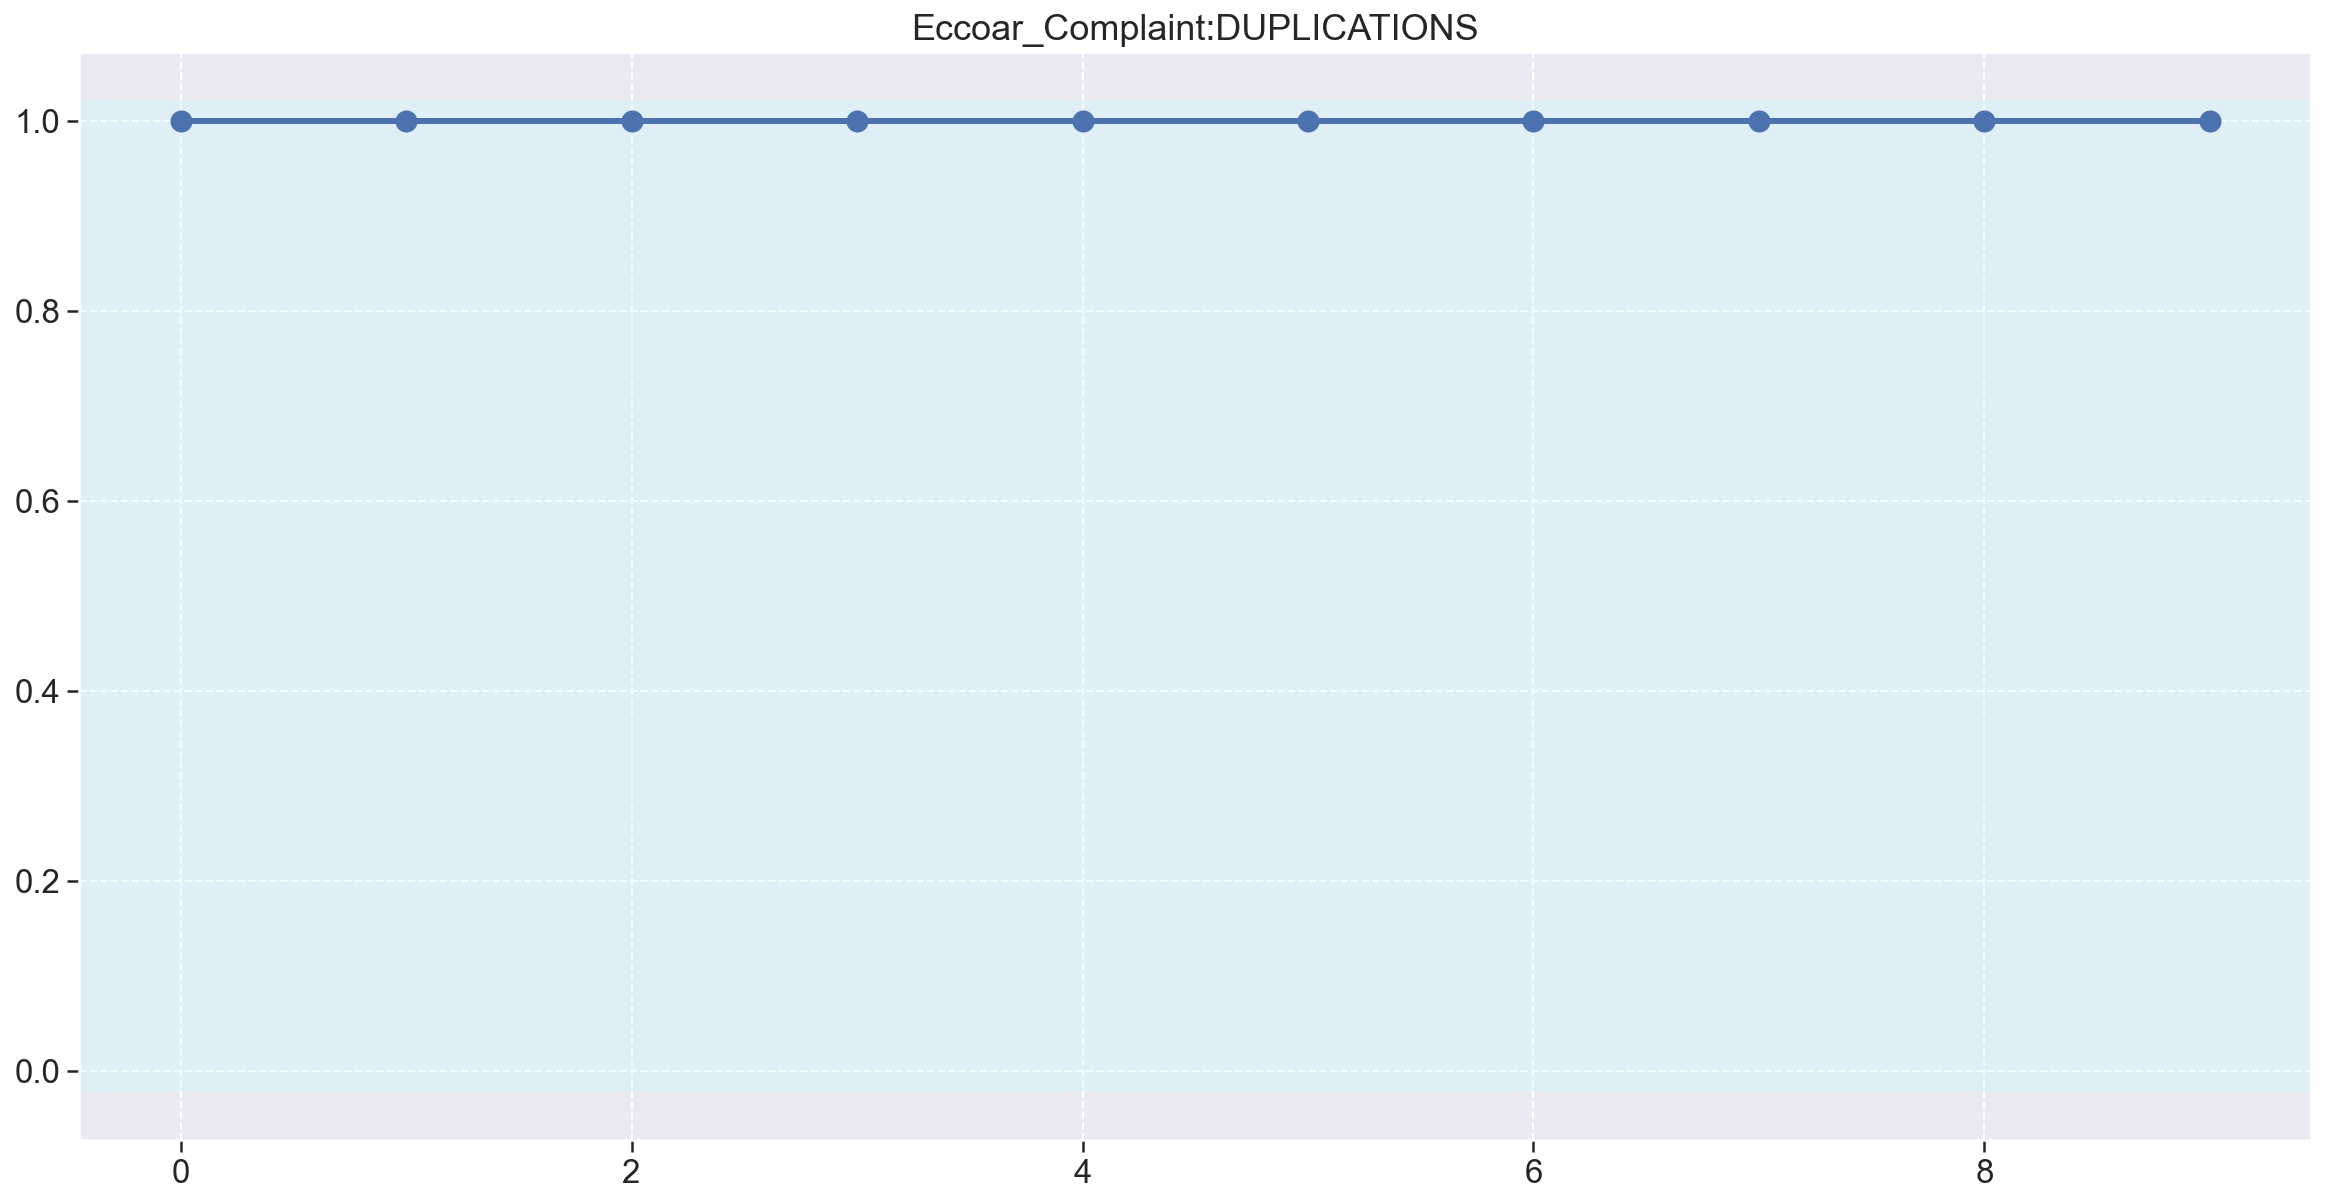

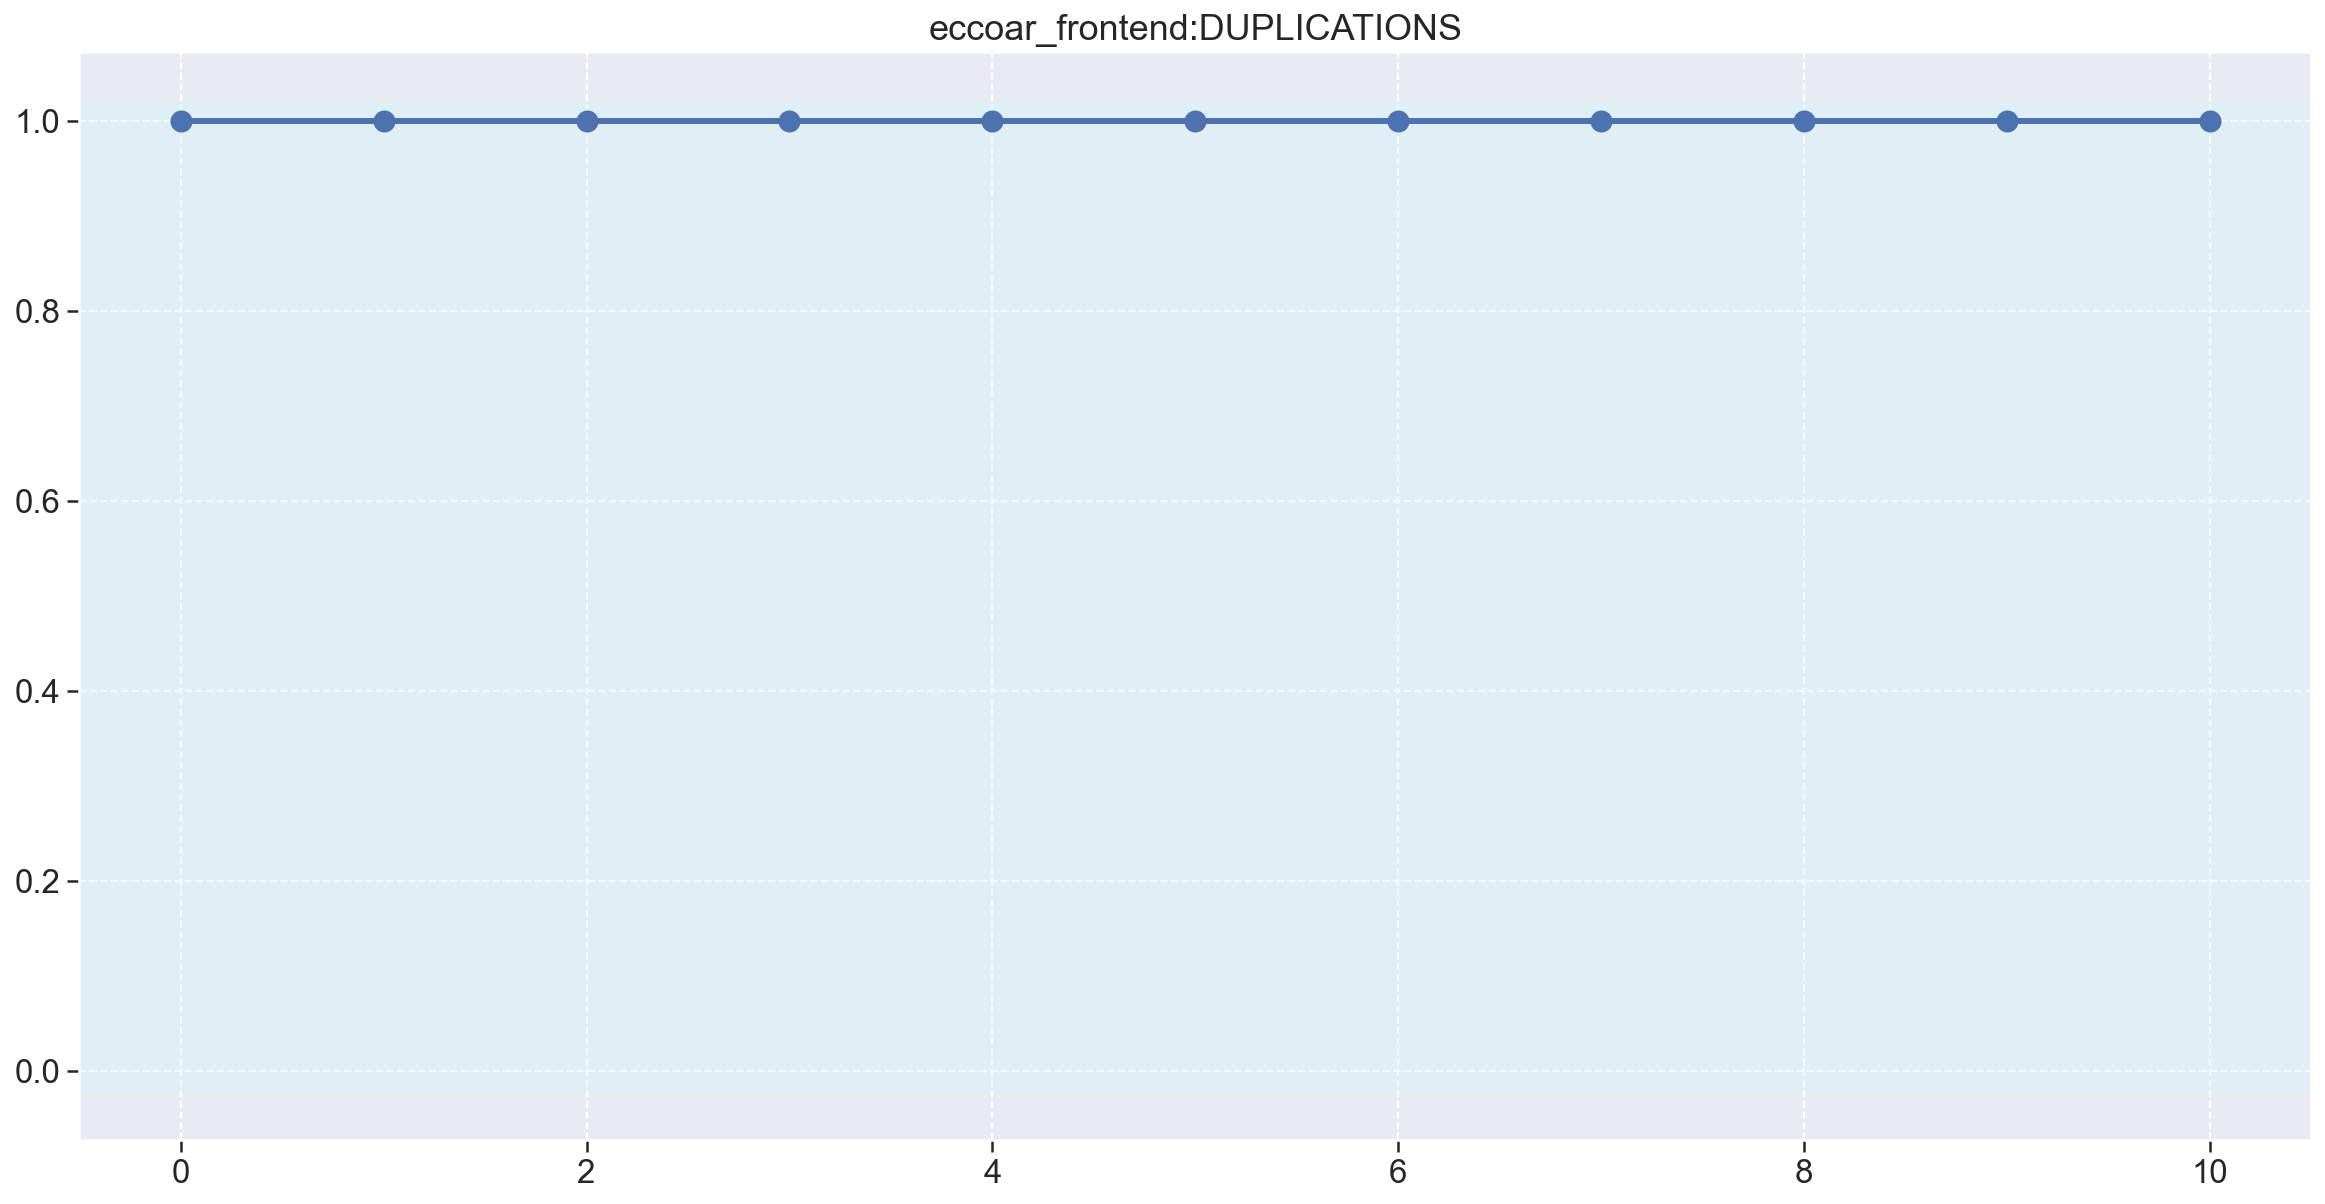

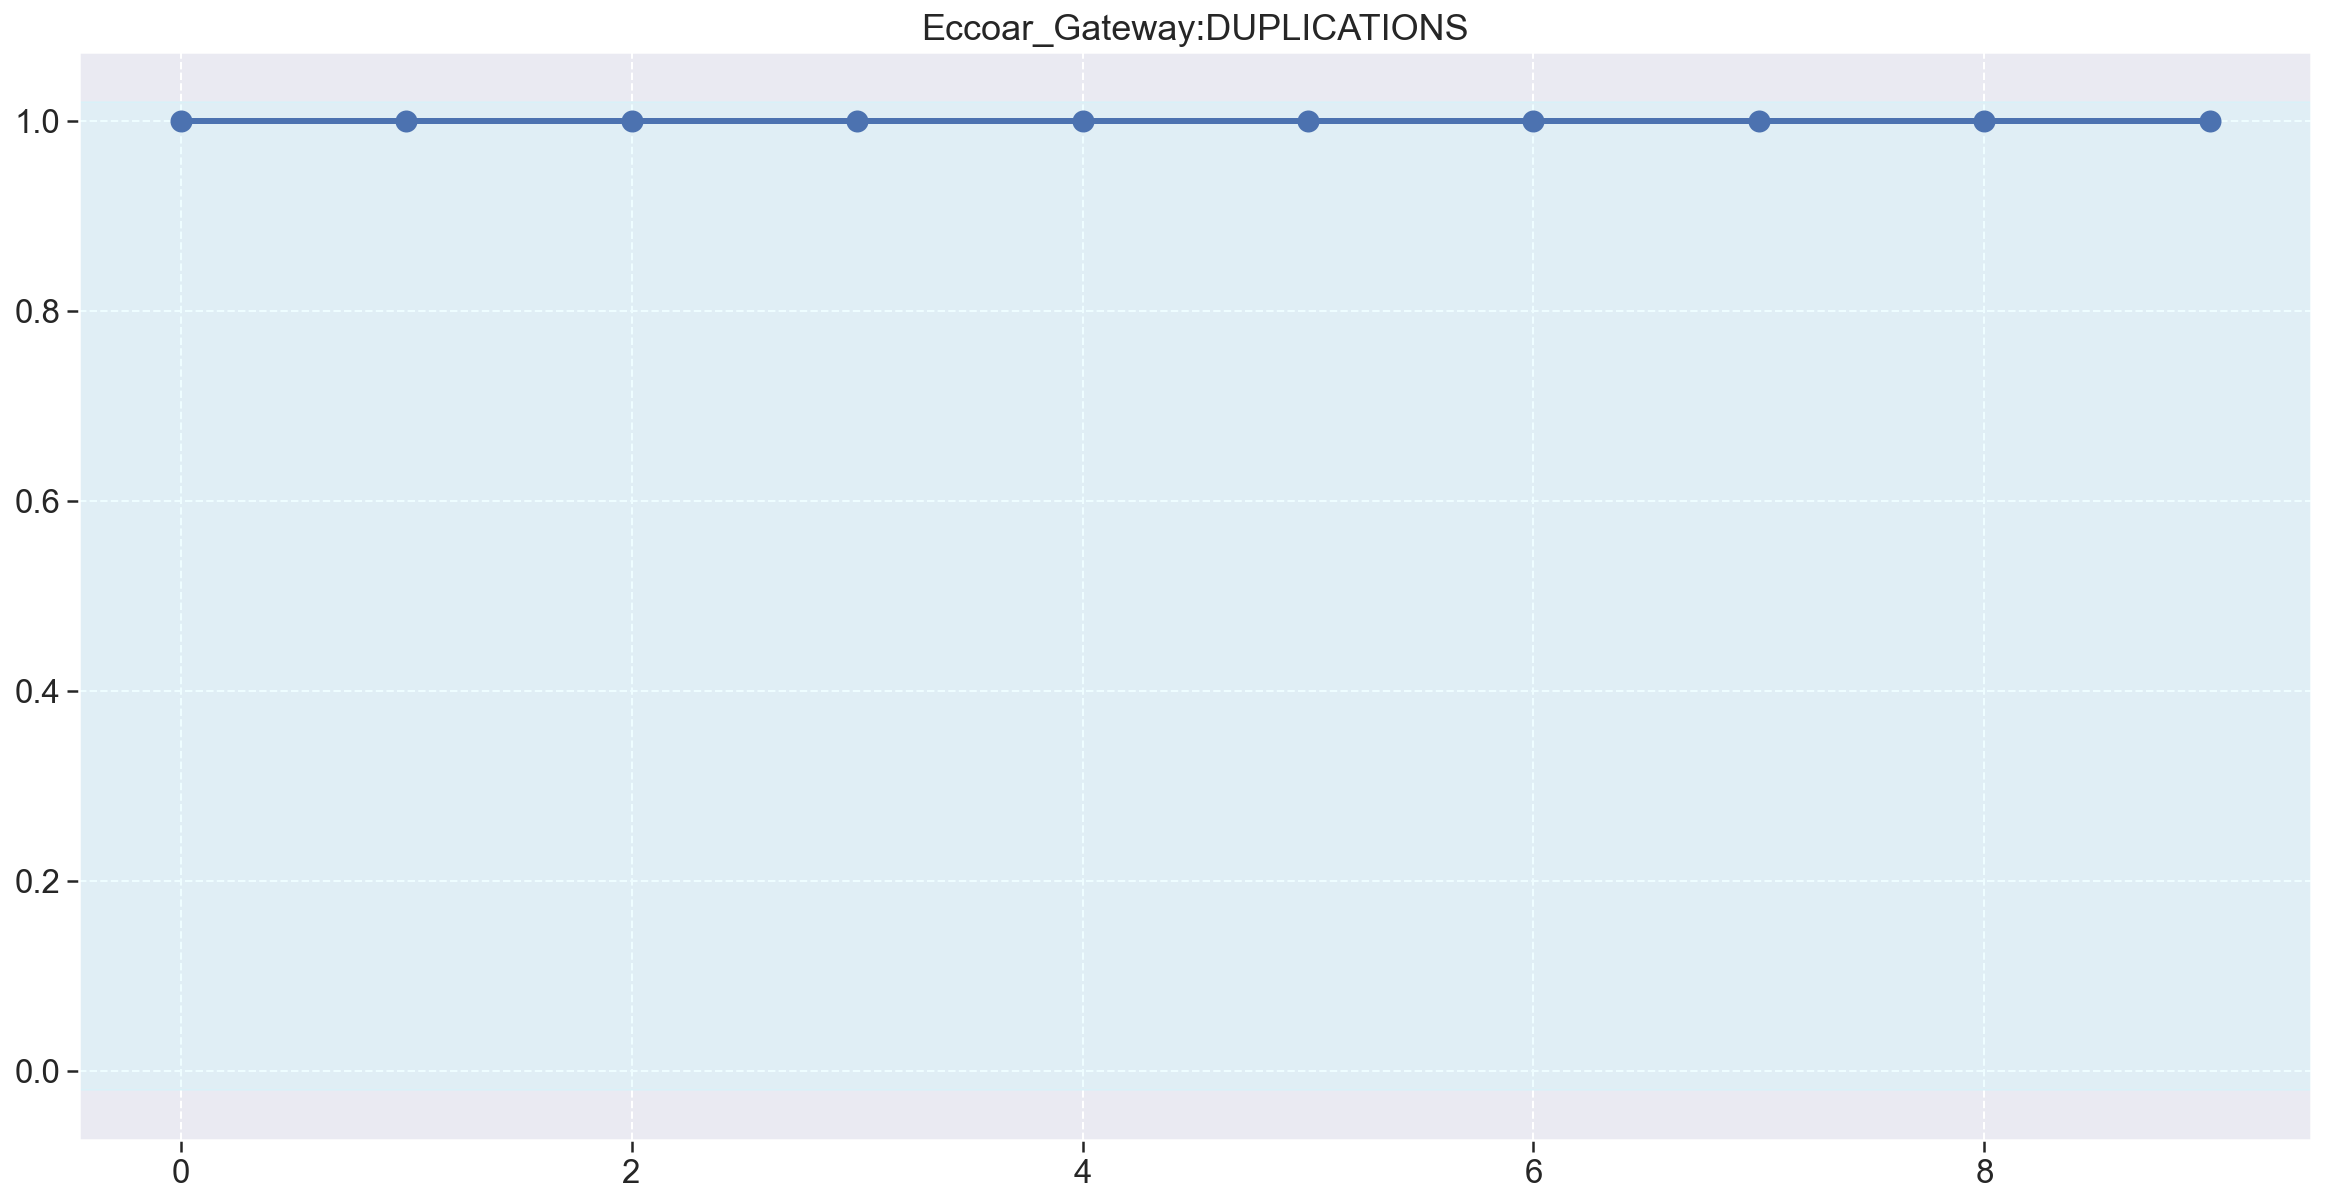

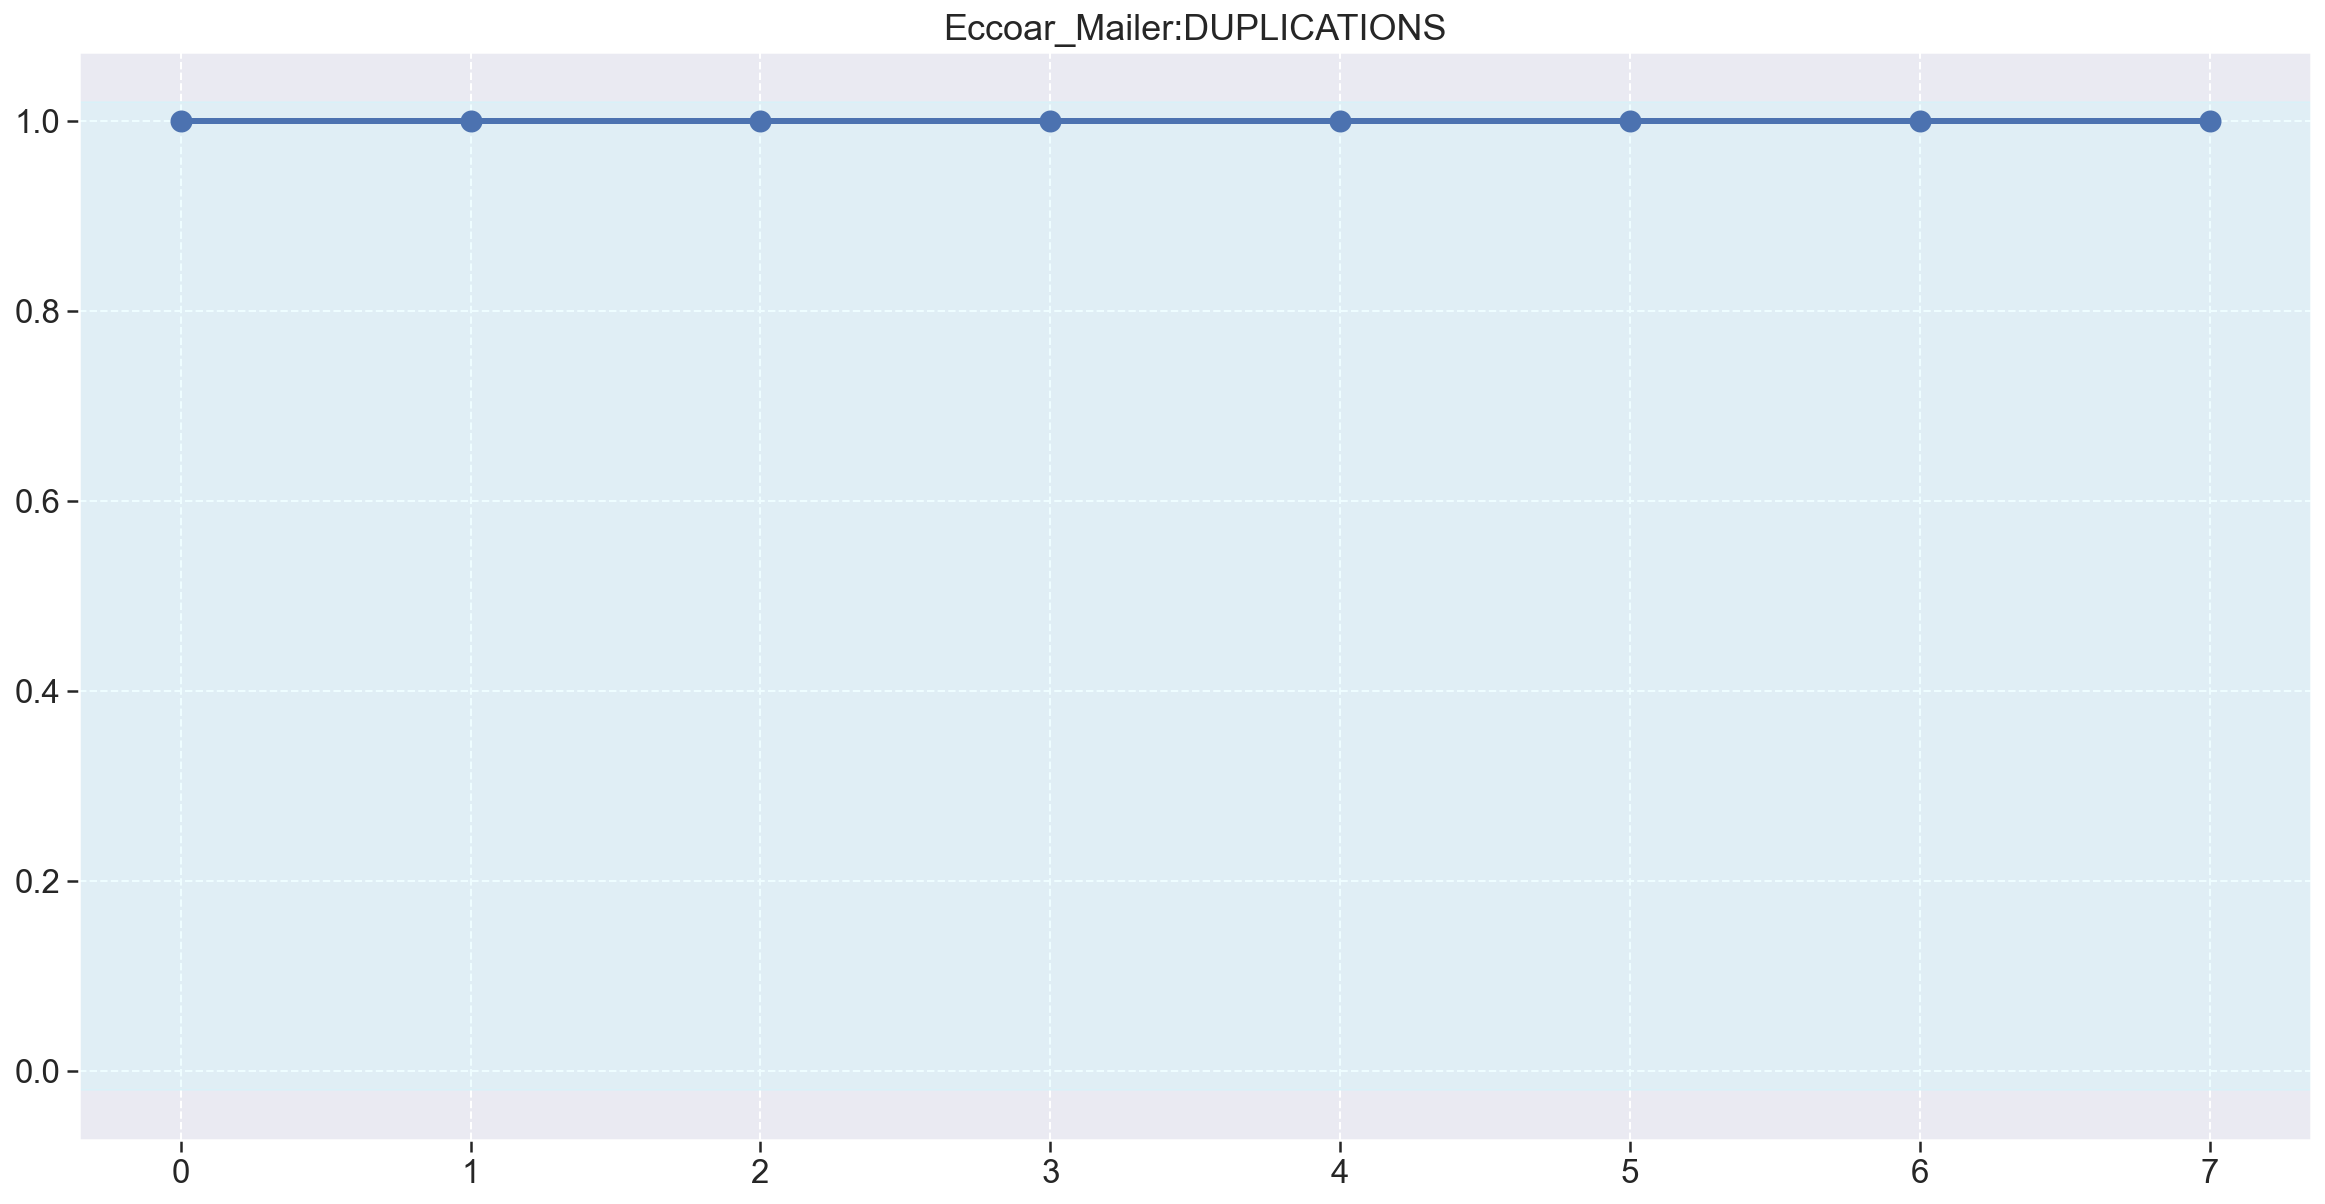

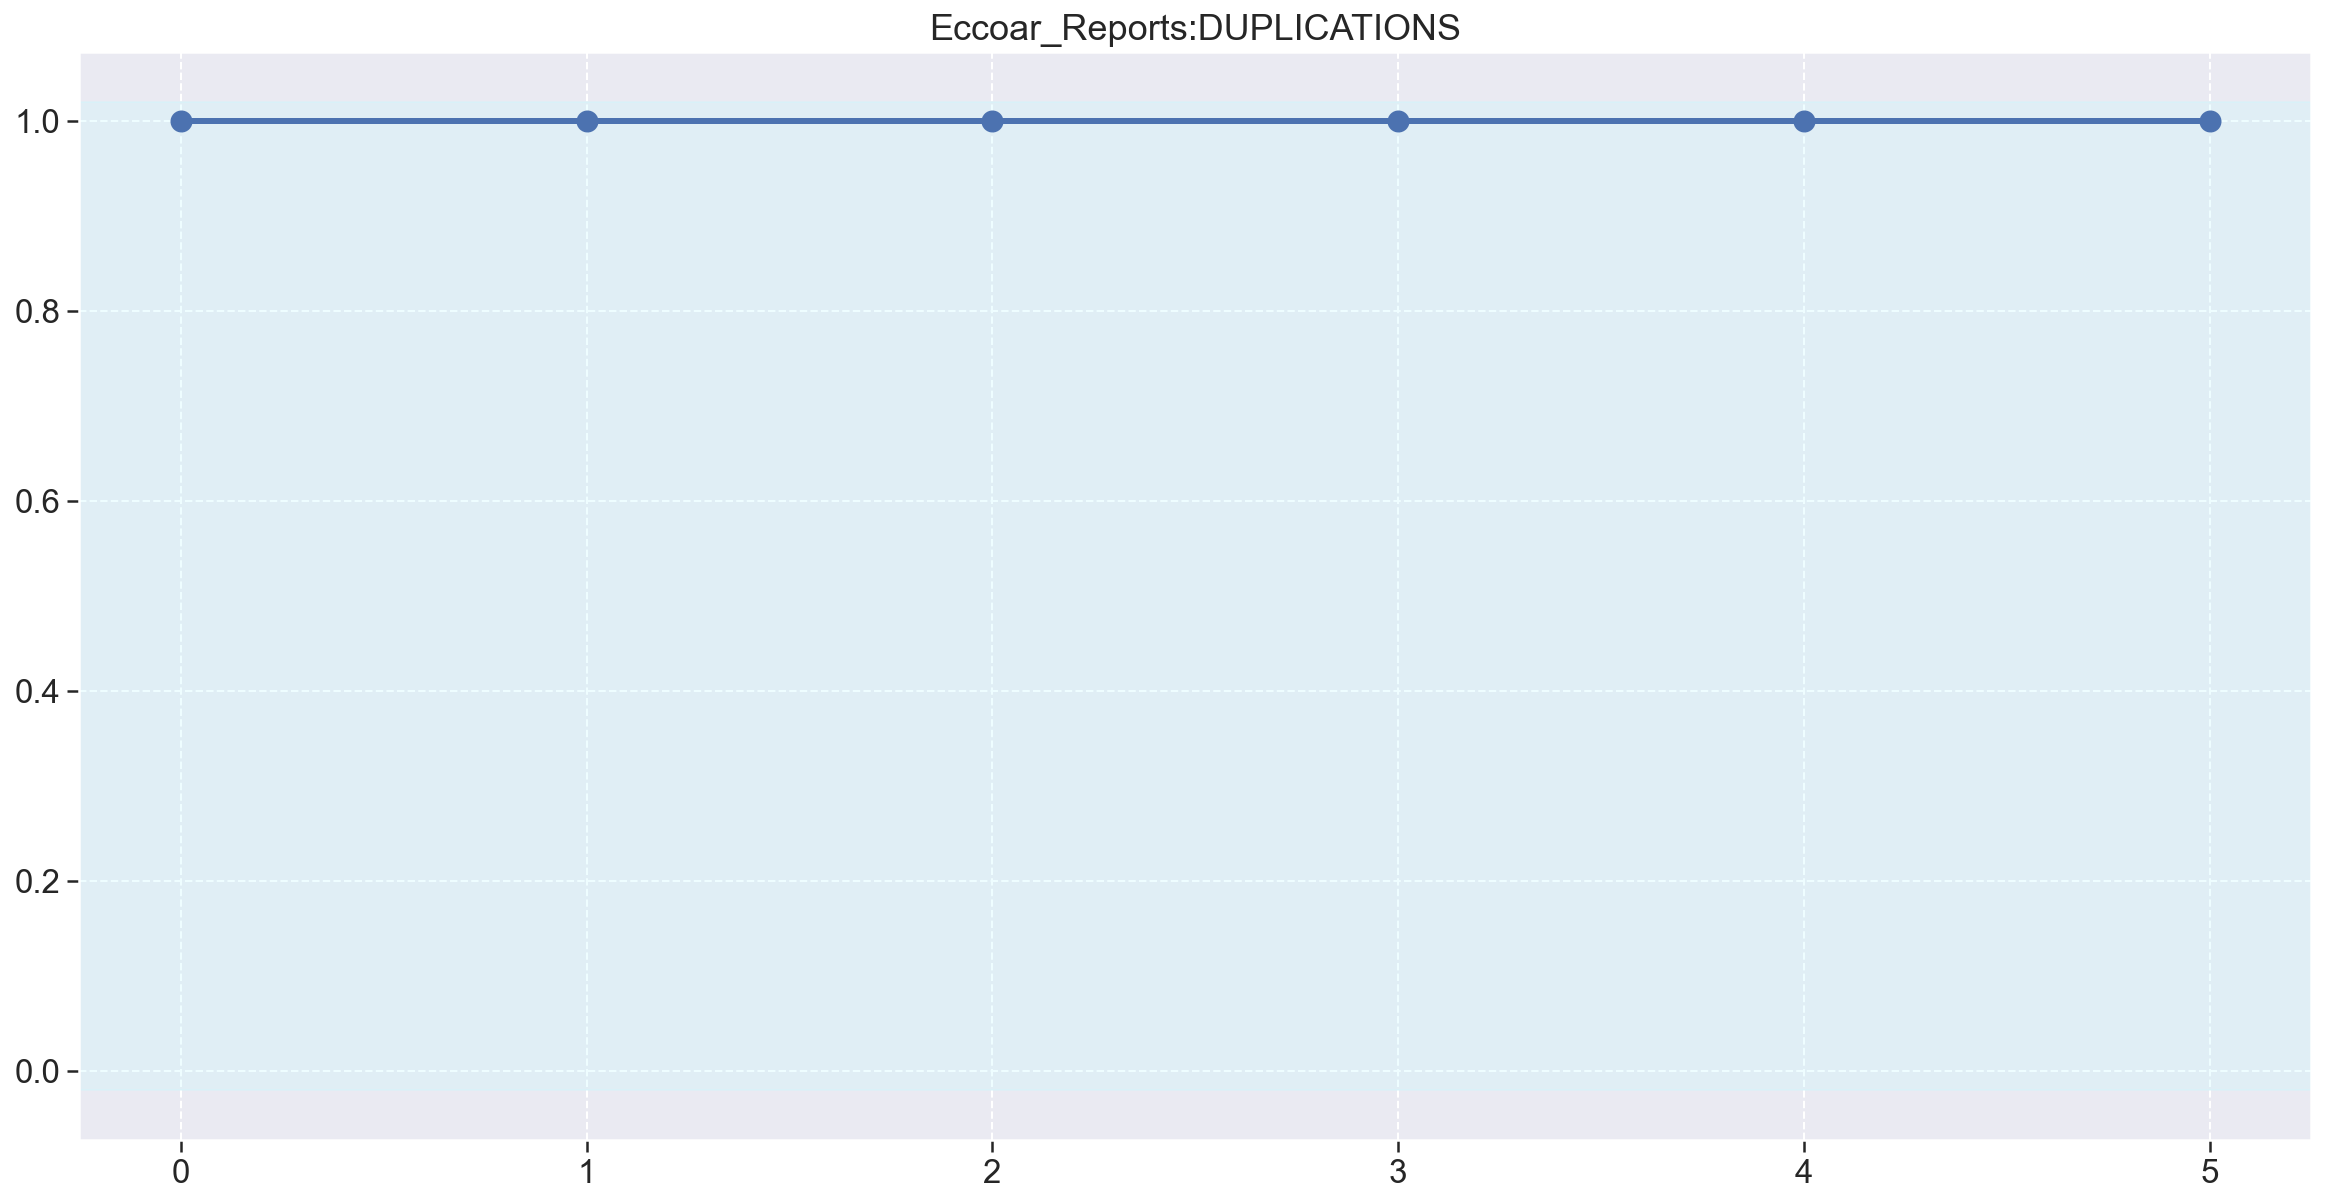

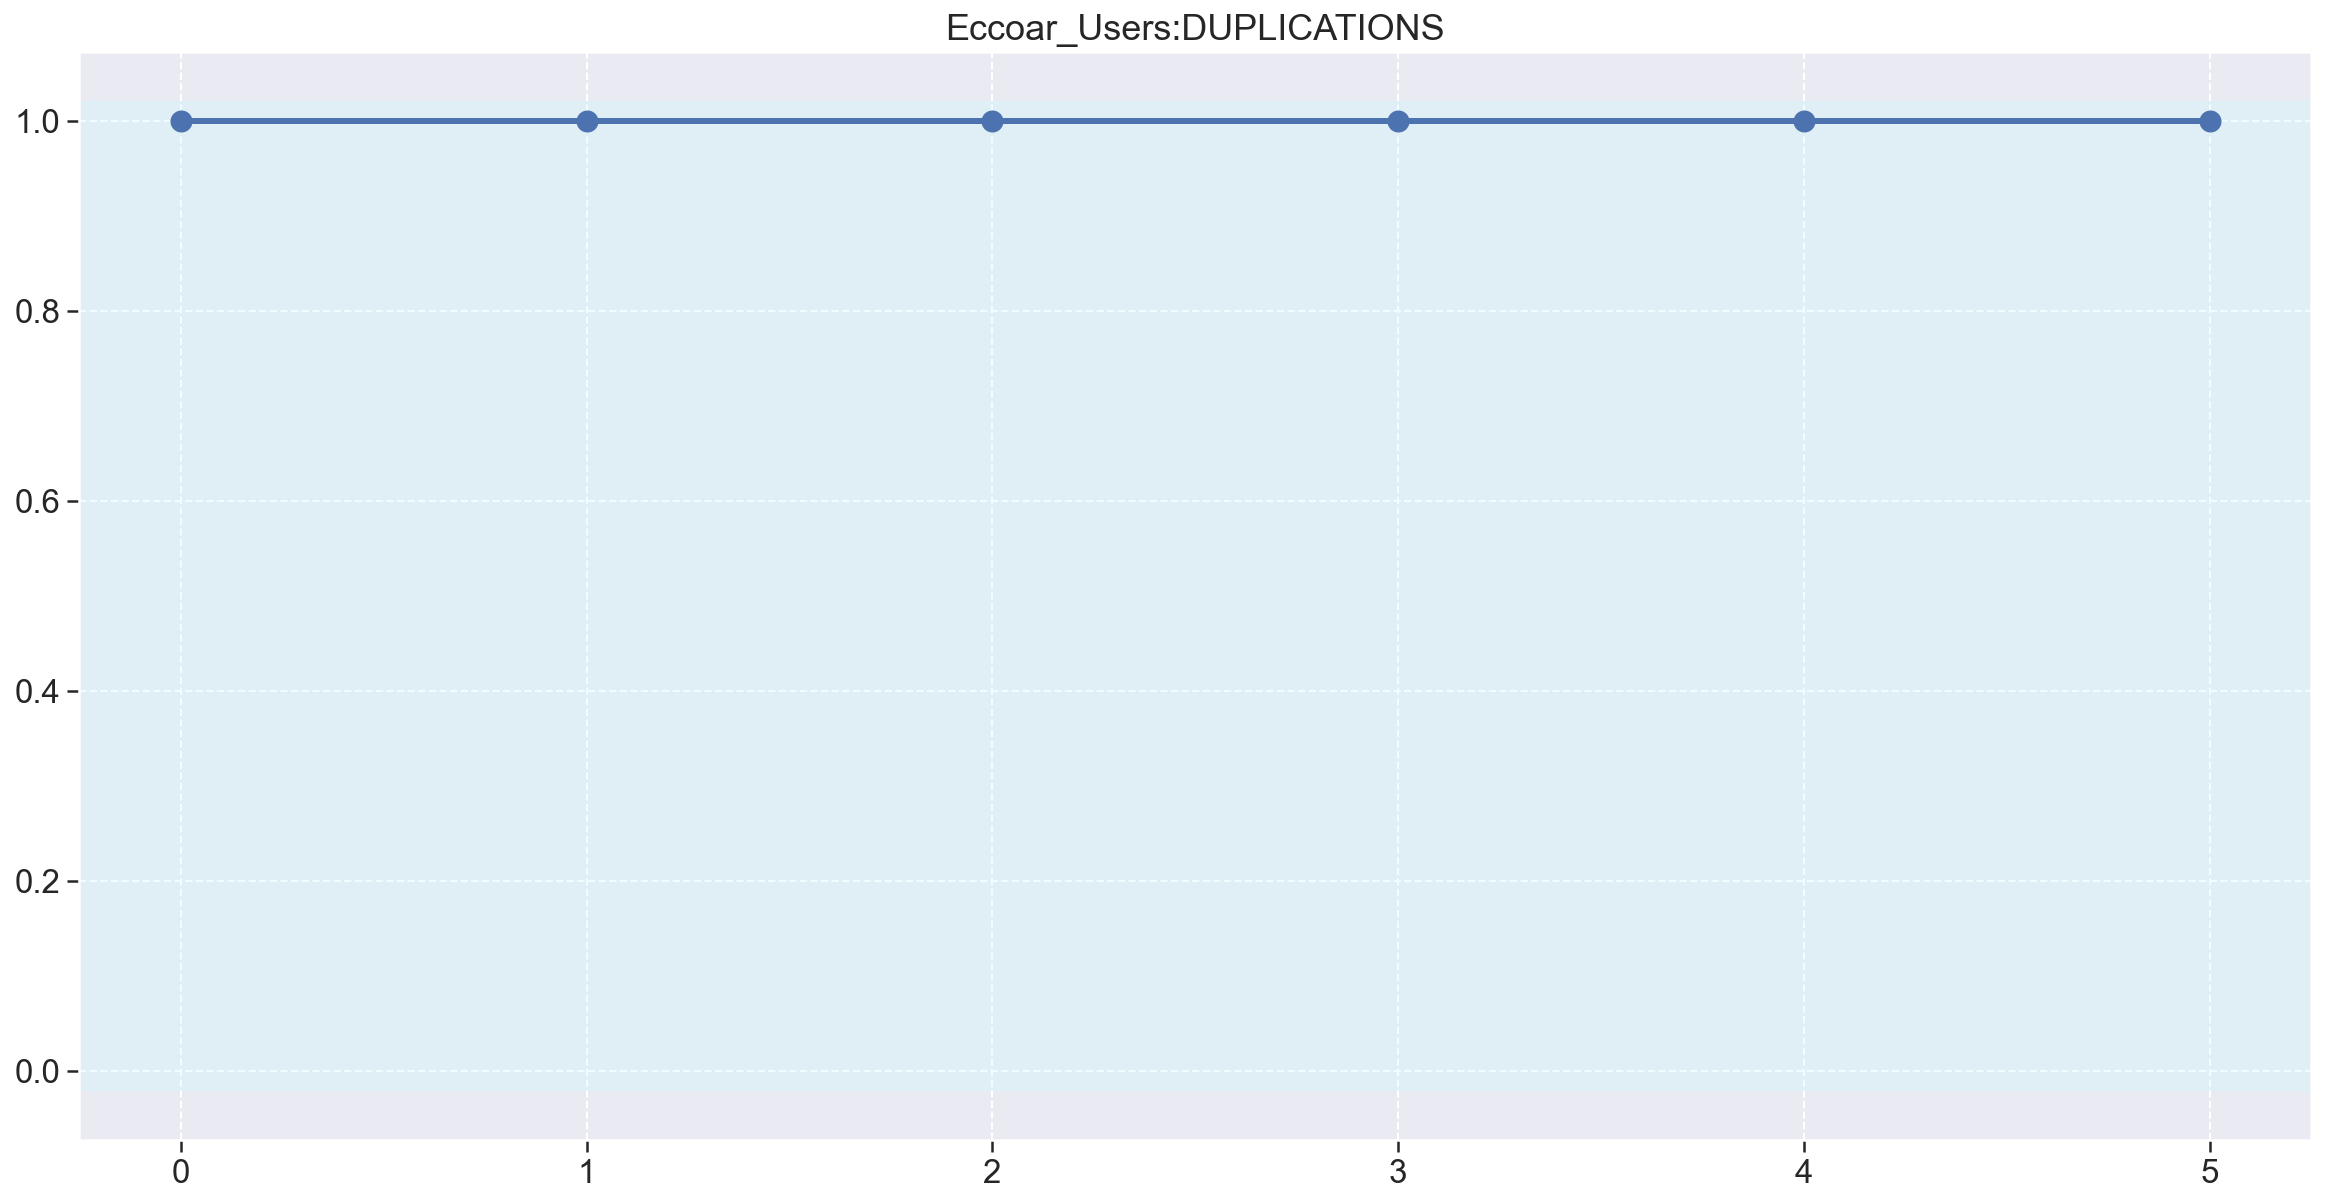

In [154]:
for repository, metrics_df in repository_metrics.items():
    fig = plt.figure(figsize=(20, 10))
    # Background color
    plt.axhspan(-.02,1.02, color="#c9f9ff", alpha=0.3)
    plt.title(f"{repository}:DUPLICATIONS")
    plt.plot(metrics_df['m3'], linewidth=3, marker='o', markersize=10)

## Repository: Frontend

#### All metrics

(-0.02, 1.02)

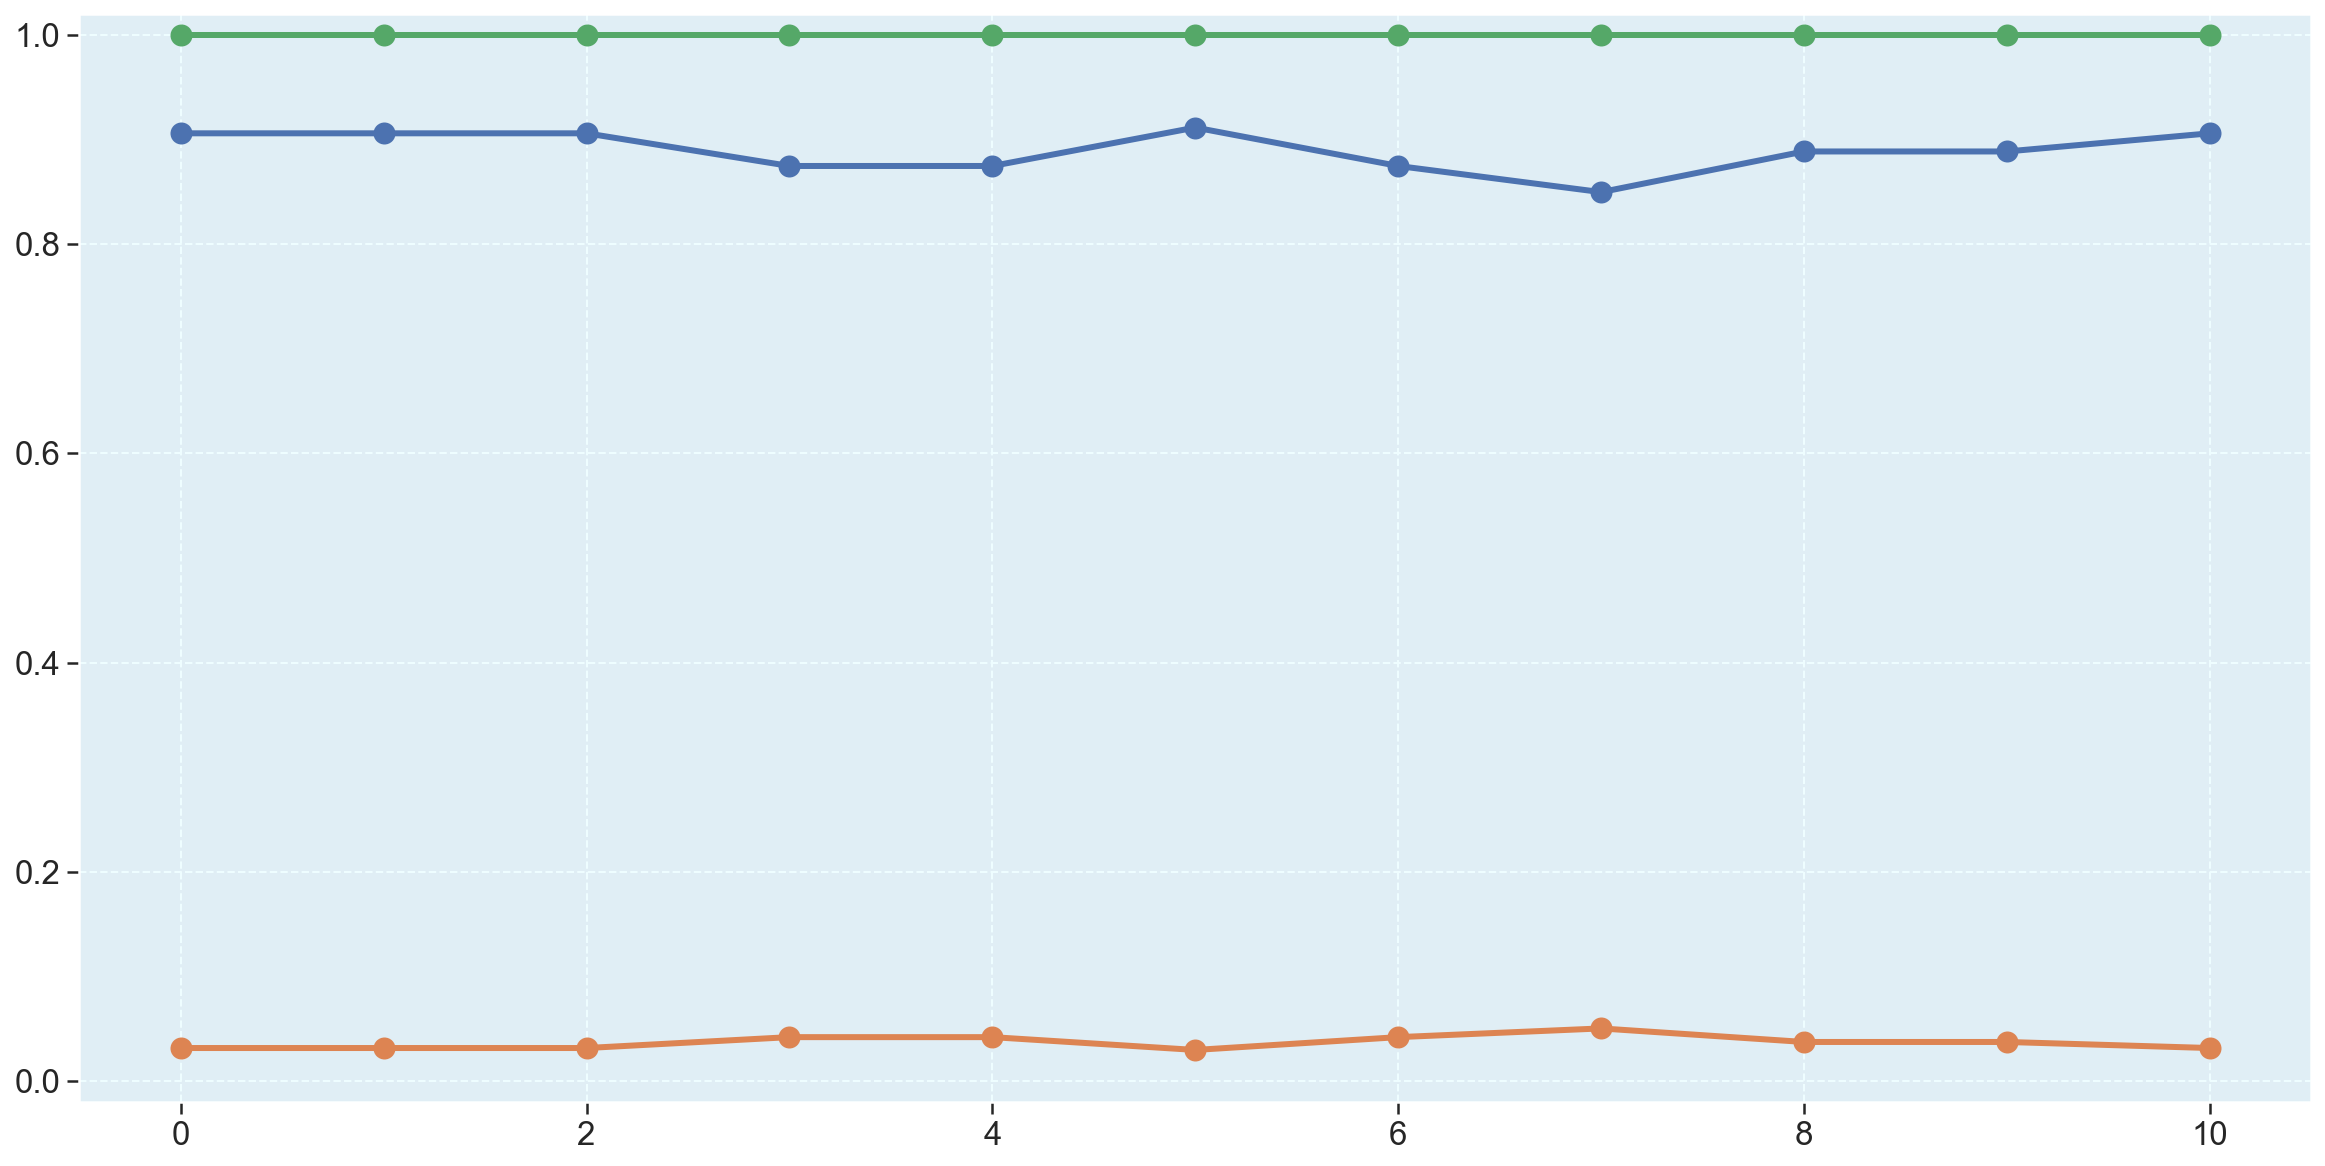

In [137]:
fig = plt.figure(figsize=(20, 10))

# Background color
plt.axhspan(-.02,1.02, color="#c9f9ff", alpha=0.3)

plt.plot(repository_metrics["eccoar_frontend"]['m1'], linewidth=3, marker='o', markersize=10)
plt.plot(repository_metrics["eccoar_frontend"]['m2'], linewidth=3, marker='o', markersize=10)
plt.plot(repository_metrics["eccoar_frontend"]['m3'], linewidth=3, marker='o', markersize=10)

plt.ylim(-.02,1.02)

## Repository: Gateway

#### All metrics

(-0.02, 1.02)

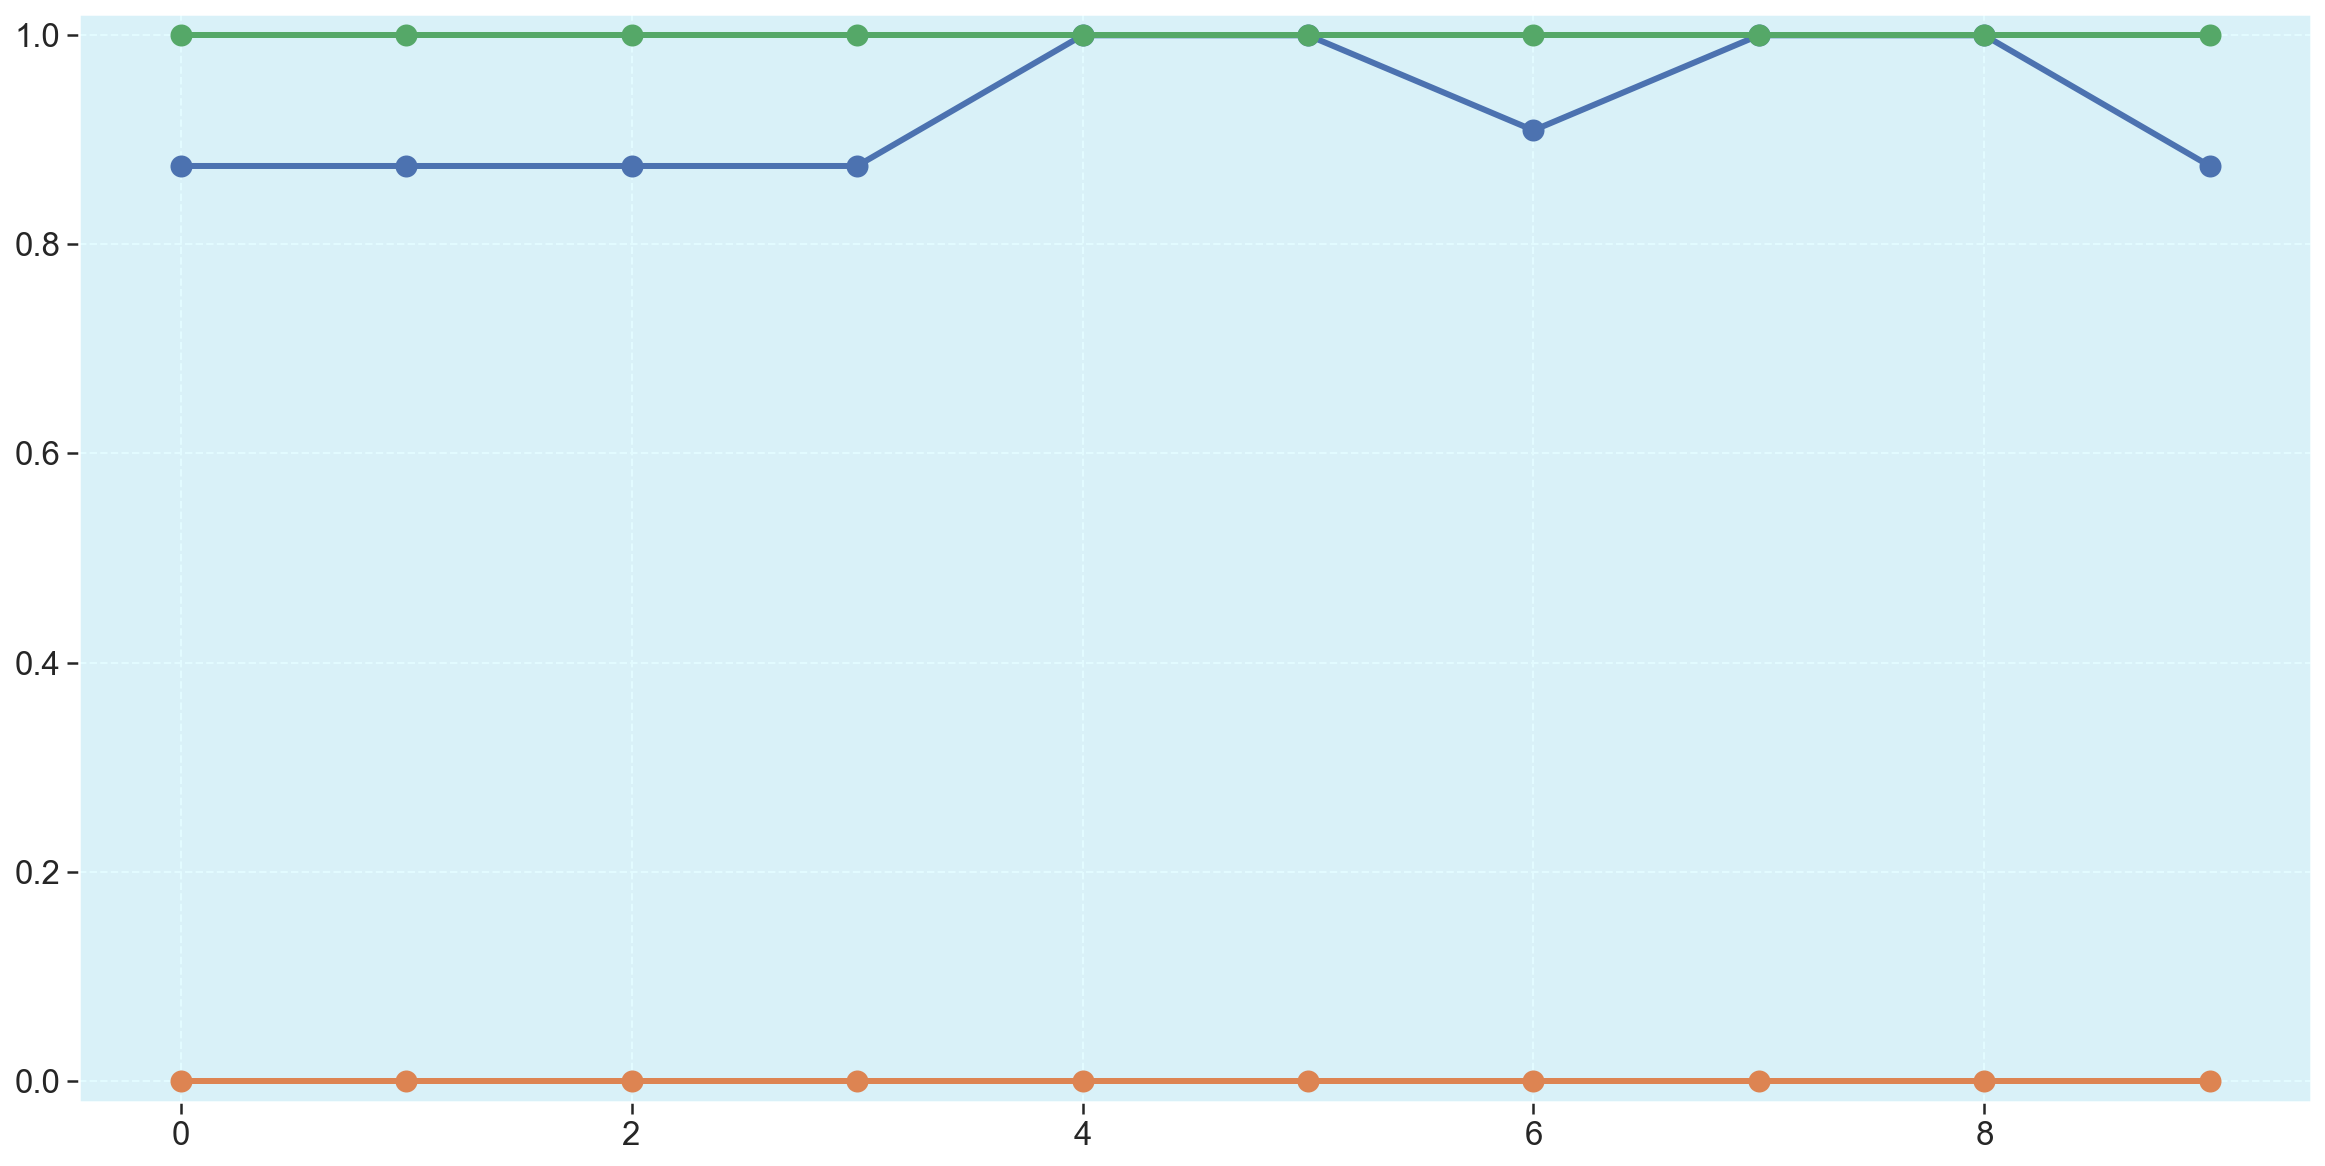

In [138]:
fig = plt.figure(figsize=(20, 10))

# Background color
plt.axhspan(-.02,1.02, color="#c9f9ff", alpha=0.3)

plt.plot(repository_metrics["Eccoar_Gateway"]['m1'], linewidth=3, marker='o', markersize=10)
plt.plot(repository_metrics["Eccoar_Gateway"]['m2'], linewidth=3, marker='o', markersize=10)
plt.plot(repository_metrics["Eccoar_Gateway"]['m3'], linewidth=3, marker='o', markersize=10)

# Background color
plt.axhspan(-.02,1.02, color="#c9f9ff", alpha=0.3)

plt.ylim(-.02,1.02)

## Repository: Mailer

#### All metrics

(-0.02, 1.02)

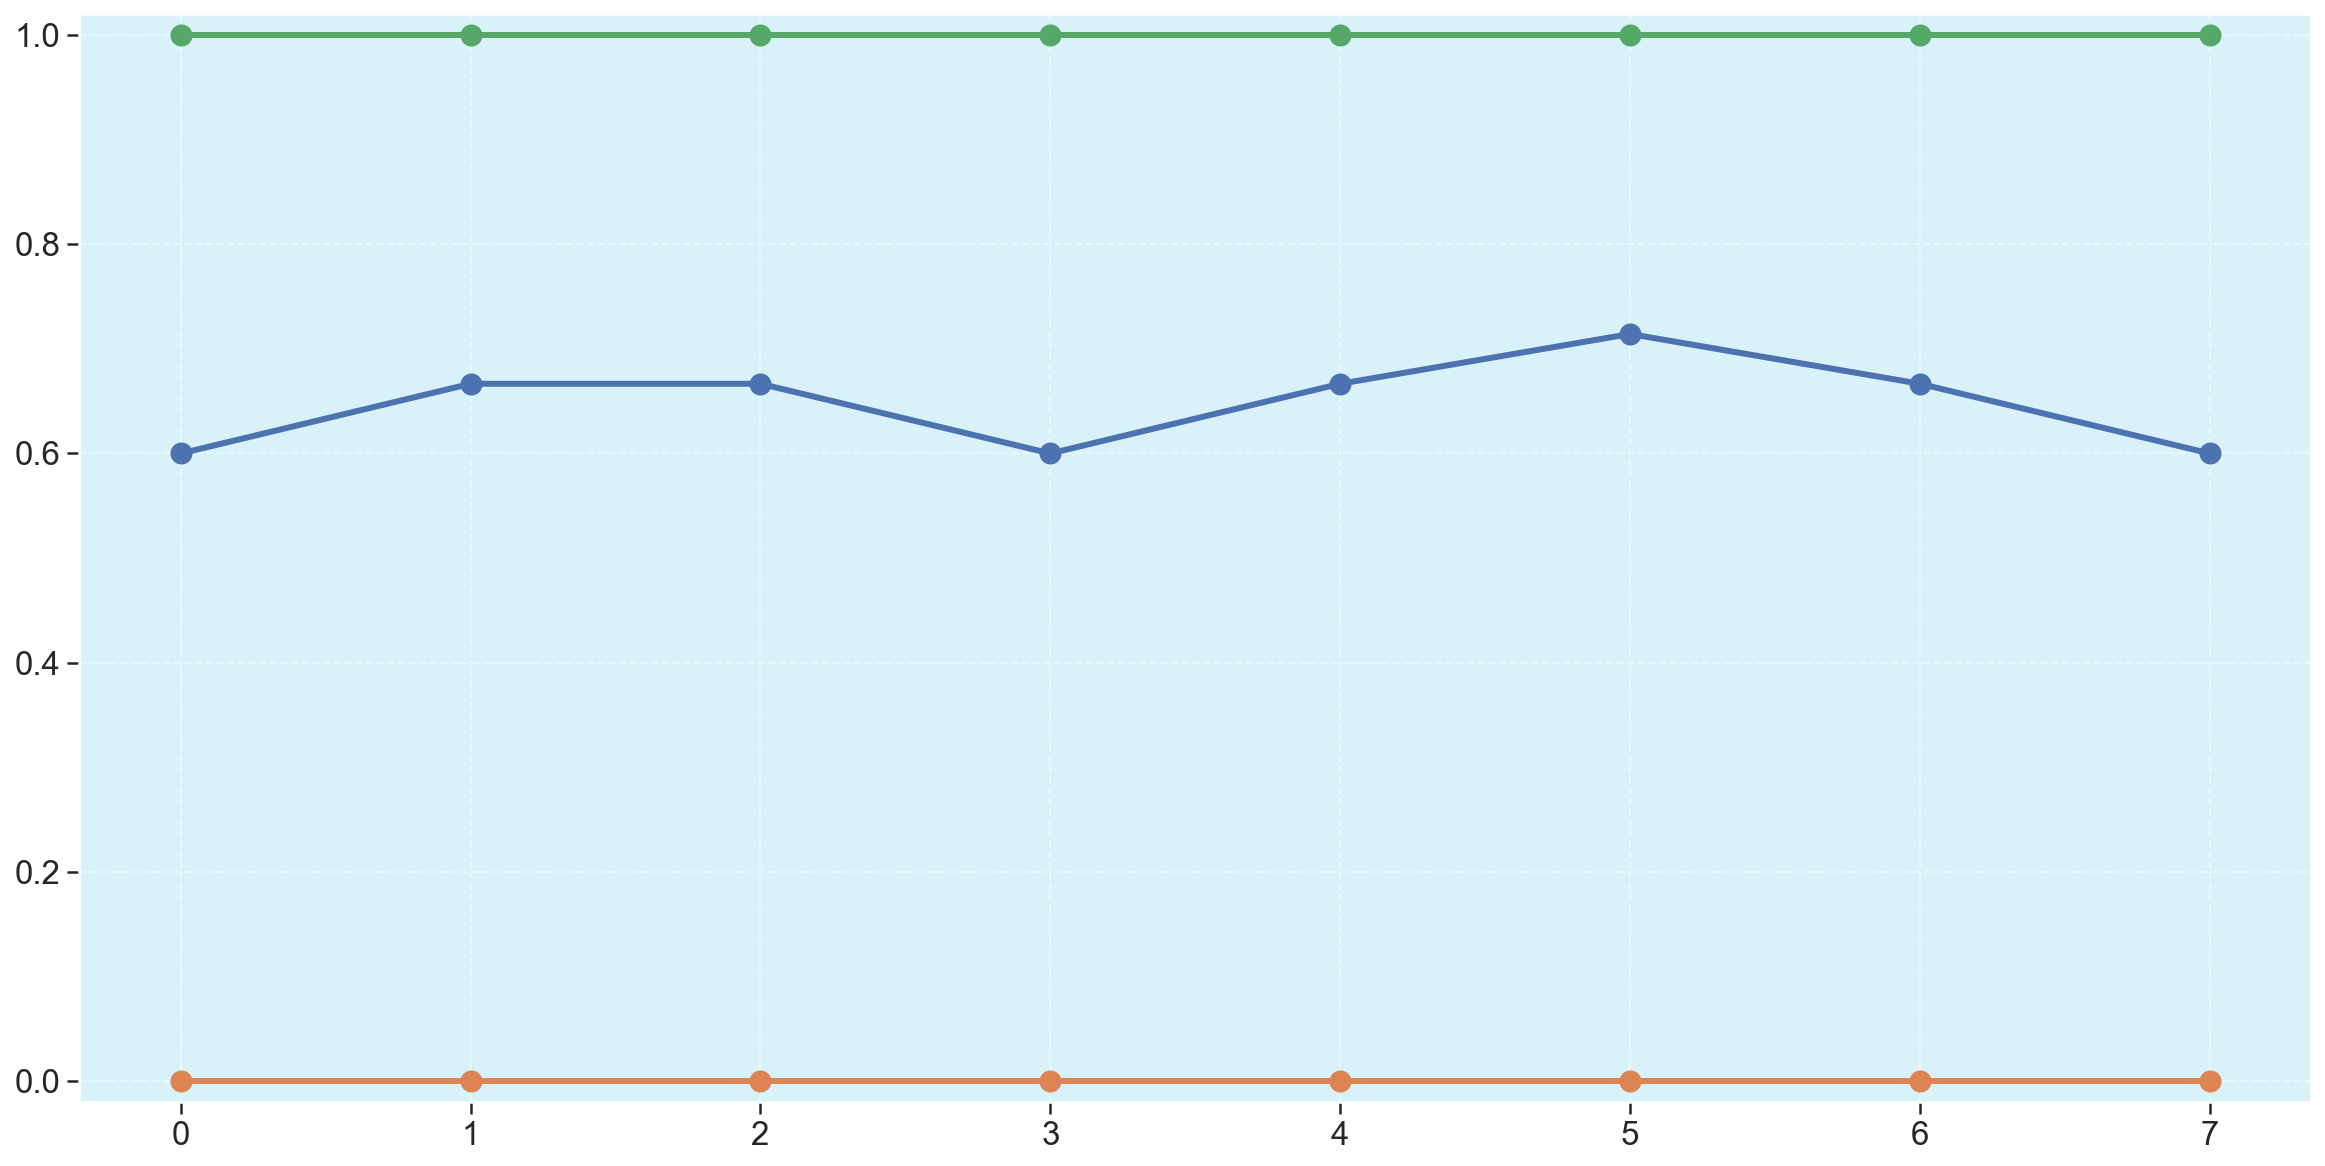

In [139]:
fig = plt.figure(figsize=(20, 10))

# Background color
plt.axhspan(-.02,1.02, color="#c9f9ff", alpha=0.3)

plt.plot(repository_metrics["Eccoar_Mailer"]['m1'], linewidth=3, marker='o', markersize=10)
plt.plot(repository_metrics["Eccoar_Mailer"]['m2'], linewidth=3, marker='o', markersize=10)
plt.plot(repository_metrics["Eccoar_Mailer"]['m3'], linewidth=3, marker='o', markersize=10)

# Background color
plt.axhspan(-.02,1.02, color="#c9f9ff", alpha=0.3)

plt.ylim(-.02,1.02)

## Repository: Reports

(-0.02, 1.02)

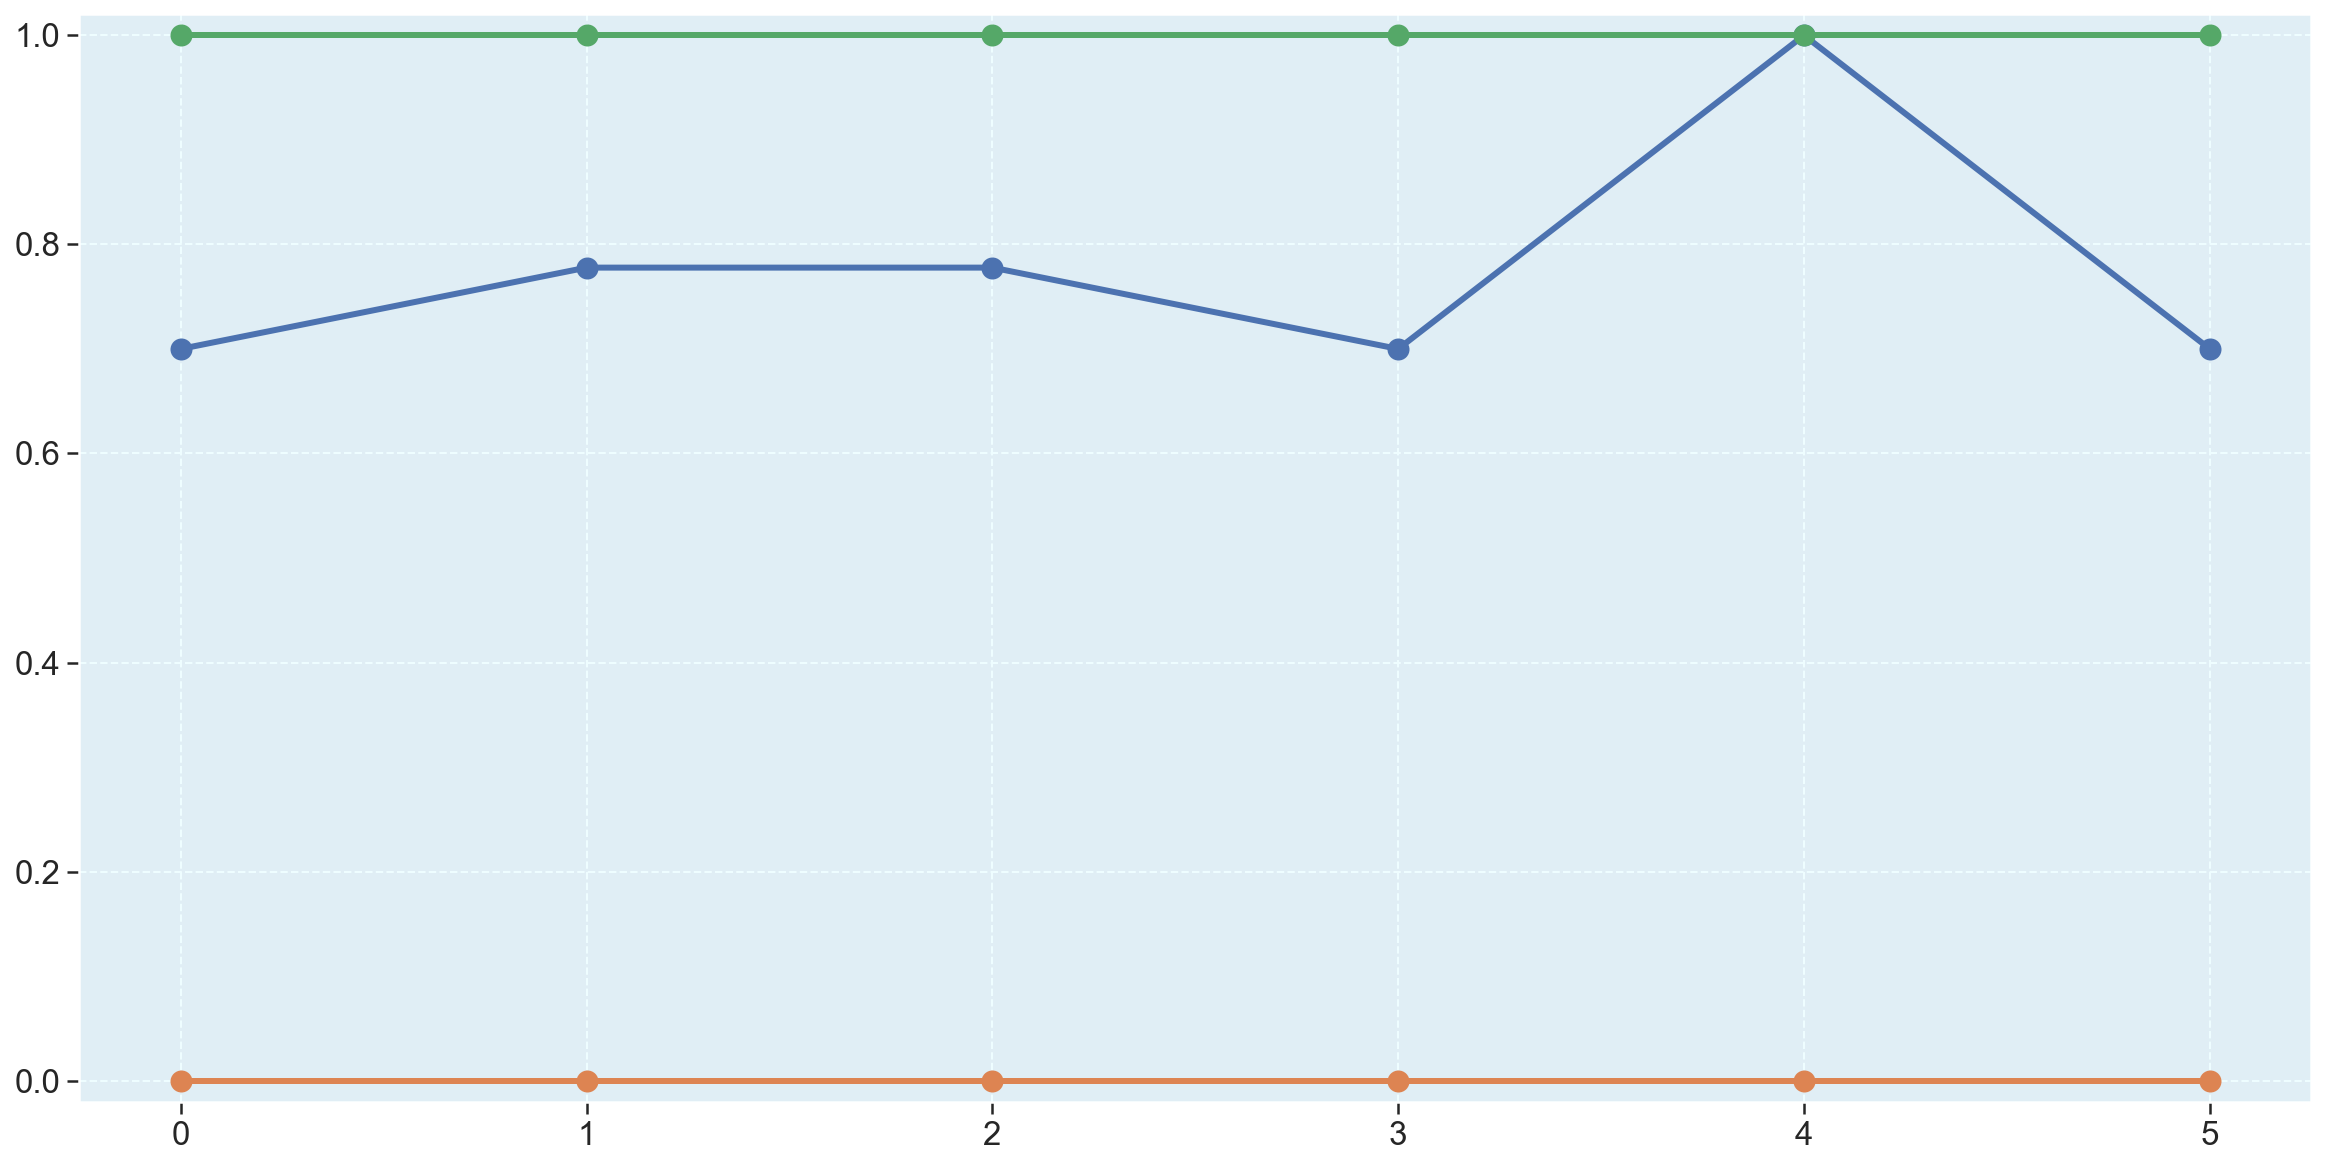

In [140]:
fig = plt.figure(figsize=(20, 10))

# Background color
plt.axhspan(-.02,1.02, color="#c9f9ff", alpha=0.3)

plt.plot(repository_metrics["Eccoar_Reports"]['m1'], linewidth=3, marker='o', markersize=10)
plt.plot(repository_metrics["Eccoar_Reports"]['m2'], linewidth=3, marker='o', markersize=10)
plt.plot(repository_metrics["Eccoar_Reports"]['m3'], linewidth=3, marker='o', markersize=10)

plt.ylim(-.02,1.02)

## Repository: Users

(-0.02, 1.02)

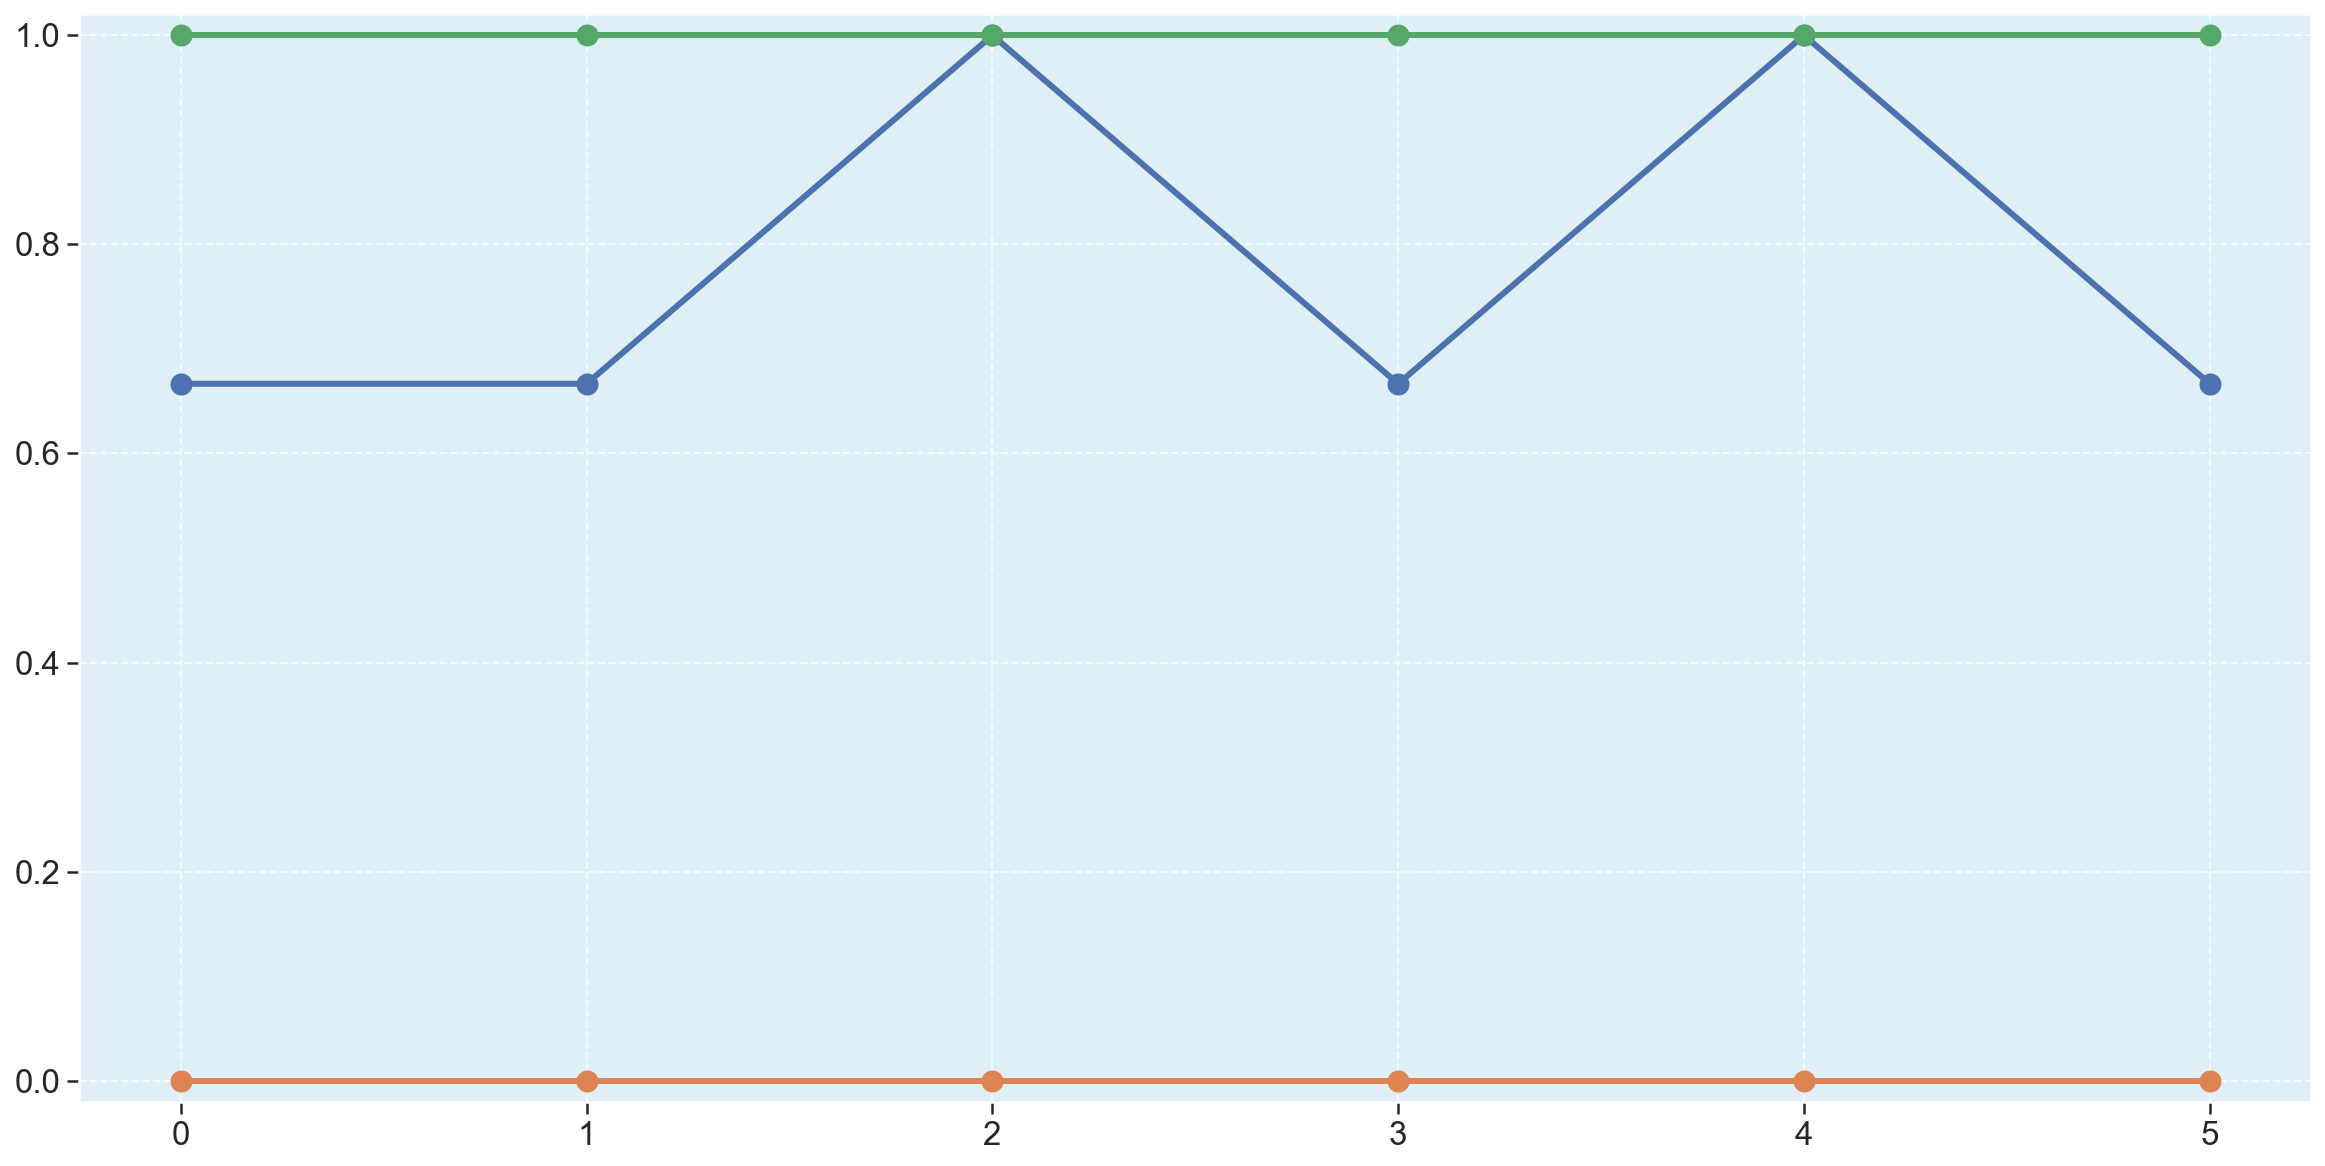

In [141]:
fig = plt.figure(figsize=(20, 10))

# Background color
plt.axhspan(-.02,1.02, color="#c9f9ff", alpha=0.3)

plt.plot(repository_metrics["Eccoar_Users"]['m1'], linewidth=3, marker='o', markersize=10)
plt.plot(repository_metrics["Eccoar_Users"]['m2'], linewidth=3, marker='o', markersize=10)
plt.plot(repository_metrics["Eccoar_Users"]['m3'], linewidth=3, marker='o', markersize=10)

plt.ylim(-.02,1.02)

### Ponderação e Agregação na SubCaracterística

In [162]:
psc1 = 1
pm1 = 0.33
pm2 = 0.33
pm3 = 0.33


repository_metrics["Eccoar_Complaint"]['asc1'] = ((repository_metrics["Eccoar_Complaint"]['m1']*pm1)+
                                                                   (repository_metrics["Eccoar_Complaint"]['m2']*pm2)+
                                                                   (repository_metrics["Eccoar_Complaint"]['m3']*pm3)) * psc1

repository_metrics["eccoar_frontend"]['asc1'] = ((repository_metrics["eccoar_frontend"]['m1']*pm1)+
                                                                   (repository_metrics["eccoar_frontend"]['m2']*pm2)+
                                                                   (repository_metrics["eccoar_frontend"]['m3']*pm3)) * psc1

repository_metrics["Eccoar_Gateway"]['asc1'] = ((repository_metrics["Eccoar_Gateway"]['m1']*pm1)+
                                                                   (repository_metrics["Eccoar_Gateway"]['m2']*pm2)+
                                                                   (repository_metrics["Eccoar_Gateway"]['m3']*pm3)) * psc1

repository_metrics["Eccoar_Mailer"]['asc1'] = ((repository_metrics["Eccoar_Mailer"]['m1']*pm1)+
                                                                   (repository_metrics["Eccoar_Mailer"]['m2']*pm2)+
                                                                   (repository_metrics["Eccoar_Mailer"]['m3']*pm3)) * psc1

repository_metrics["Eccoar_Reports"]['asc1'] = ((repository_metrics["Eccoar_Reports"]['m1']*pm1)+
                                                                   (repository_metrics["Eccoar_Reports"]['m2']*pm2)+
                                                                   (repository_metrics["Eccoar_Reports"]['m3']*pm3)) * psc1

repository_metrics["Eccoar_Users"]['asc1'] = ((repository_metrics["Eccoar_Users"]['m1']*pm1)+
                                                                   (repository_metrics["Eccoar_Users"]['m2']*pm2)+
                                                                   (repository_metrics["Eccoar_Users"]['m3']*pm3)) * psc1




(0.45, 0.7)

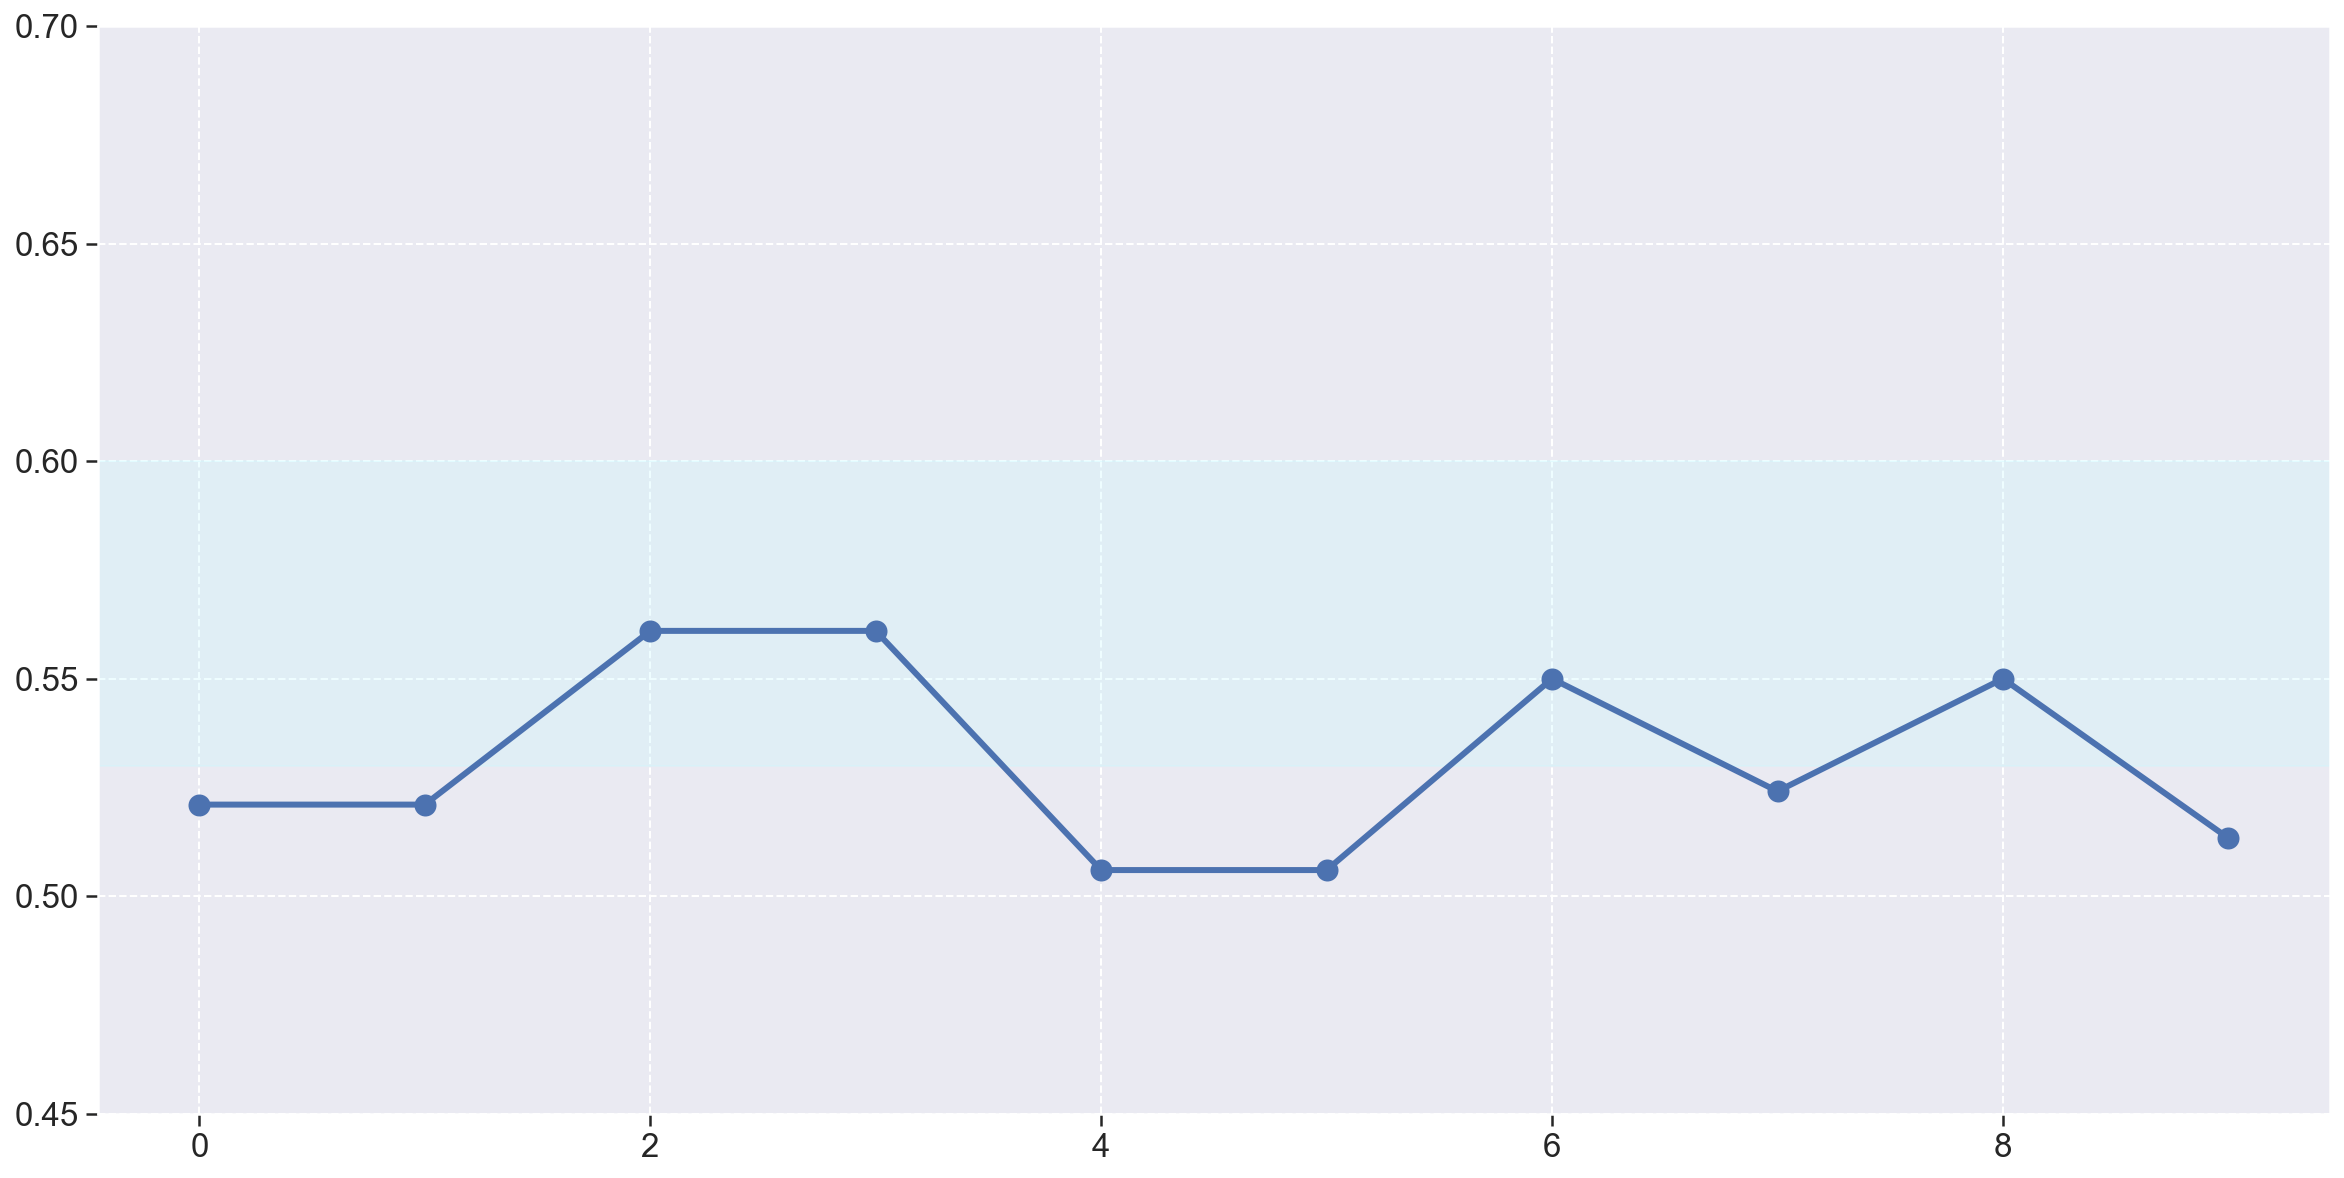

In [163]:
fig = plt.figure(figsize=(20, 10))

plt.plot(repository_metrics["Eccoar_Complaint"]['asc1'], linewidth=3, marker='o', markersize=10)

# Background color
plt.axhspan(.53,.6, color="#c9f9ff", alpha=0.3)

plt.ylim(.45,.7)

(0.45, 0.7)

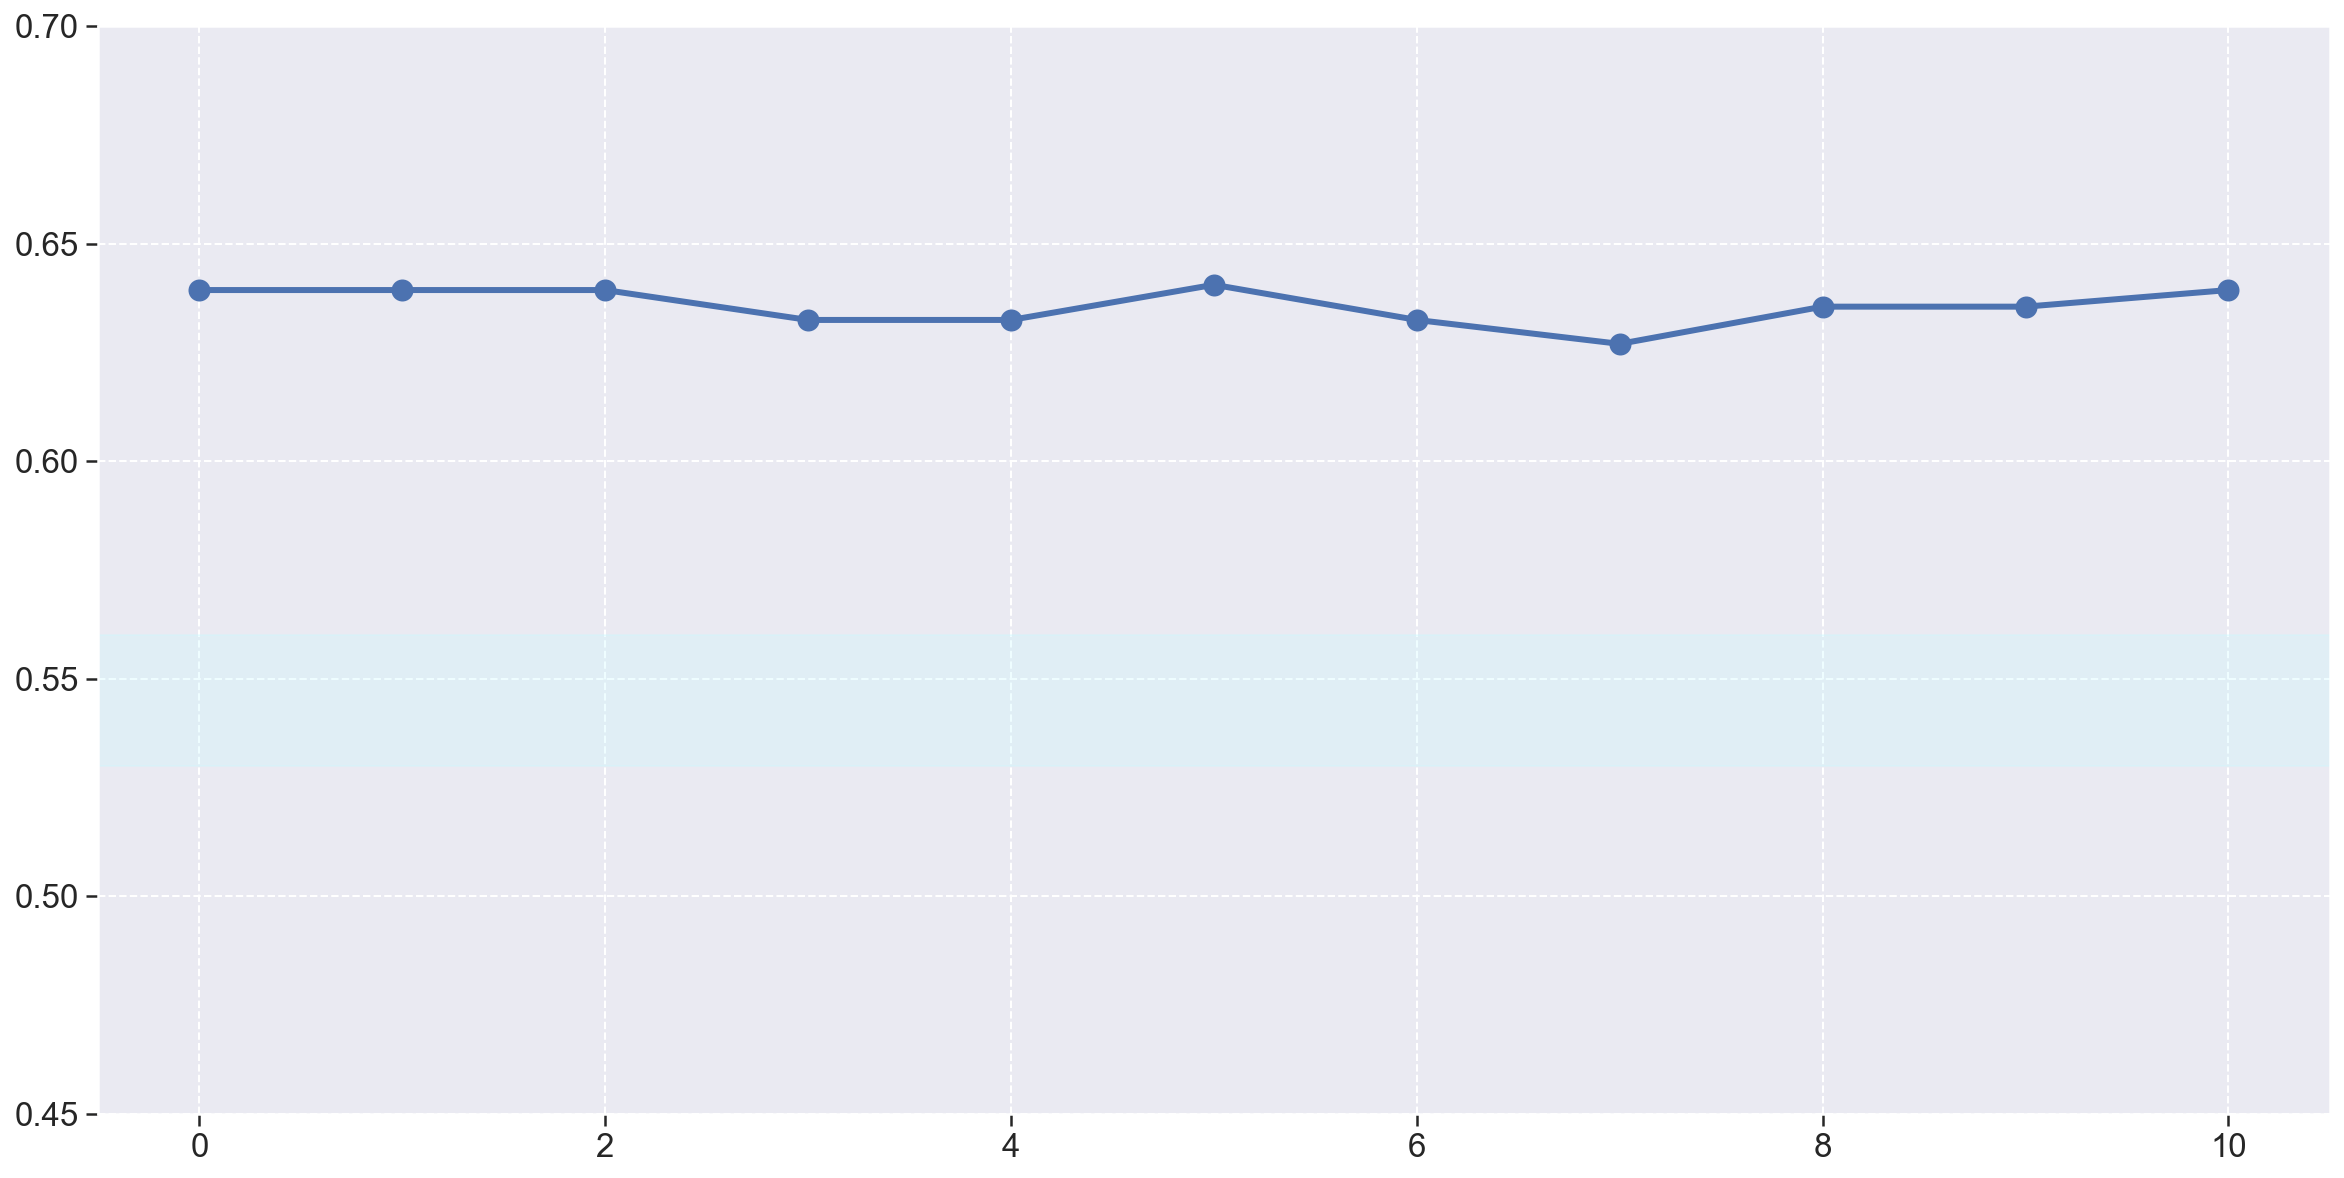

In [164]:
fig = plt.figure(figsize=(20, 10))

plt.plot(repository_metrics["eccoar_frontend"]['asc1'], linewidth=3, marker='o', markersize=10)

# Background color
plt.axhspan(.53,.56, color="#c9f9ff", alpha=0.3)

plt.ylim(.45,.7)

(0.45, 0.7)

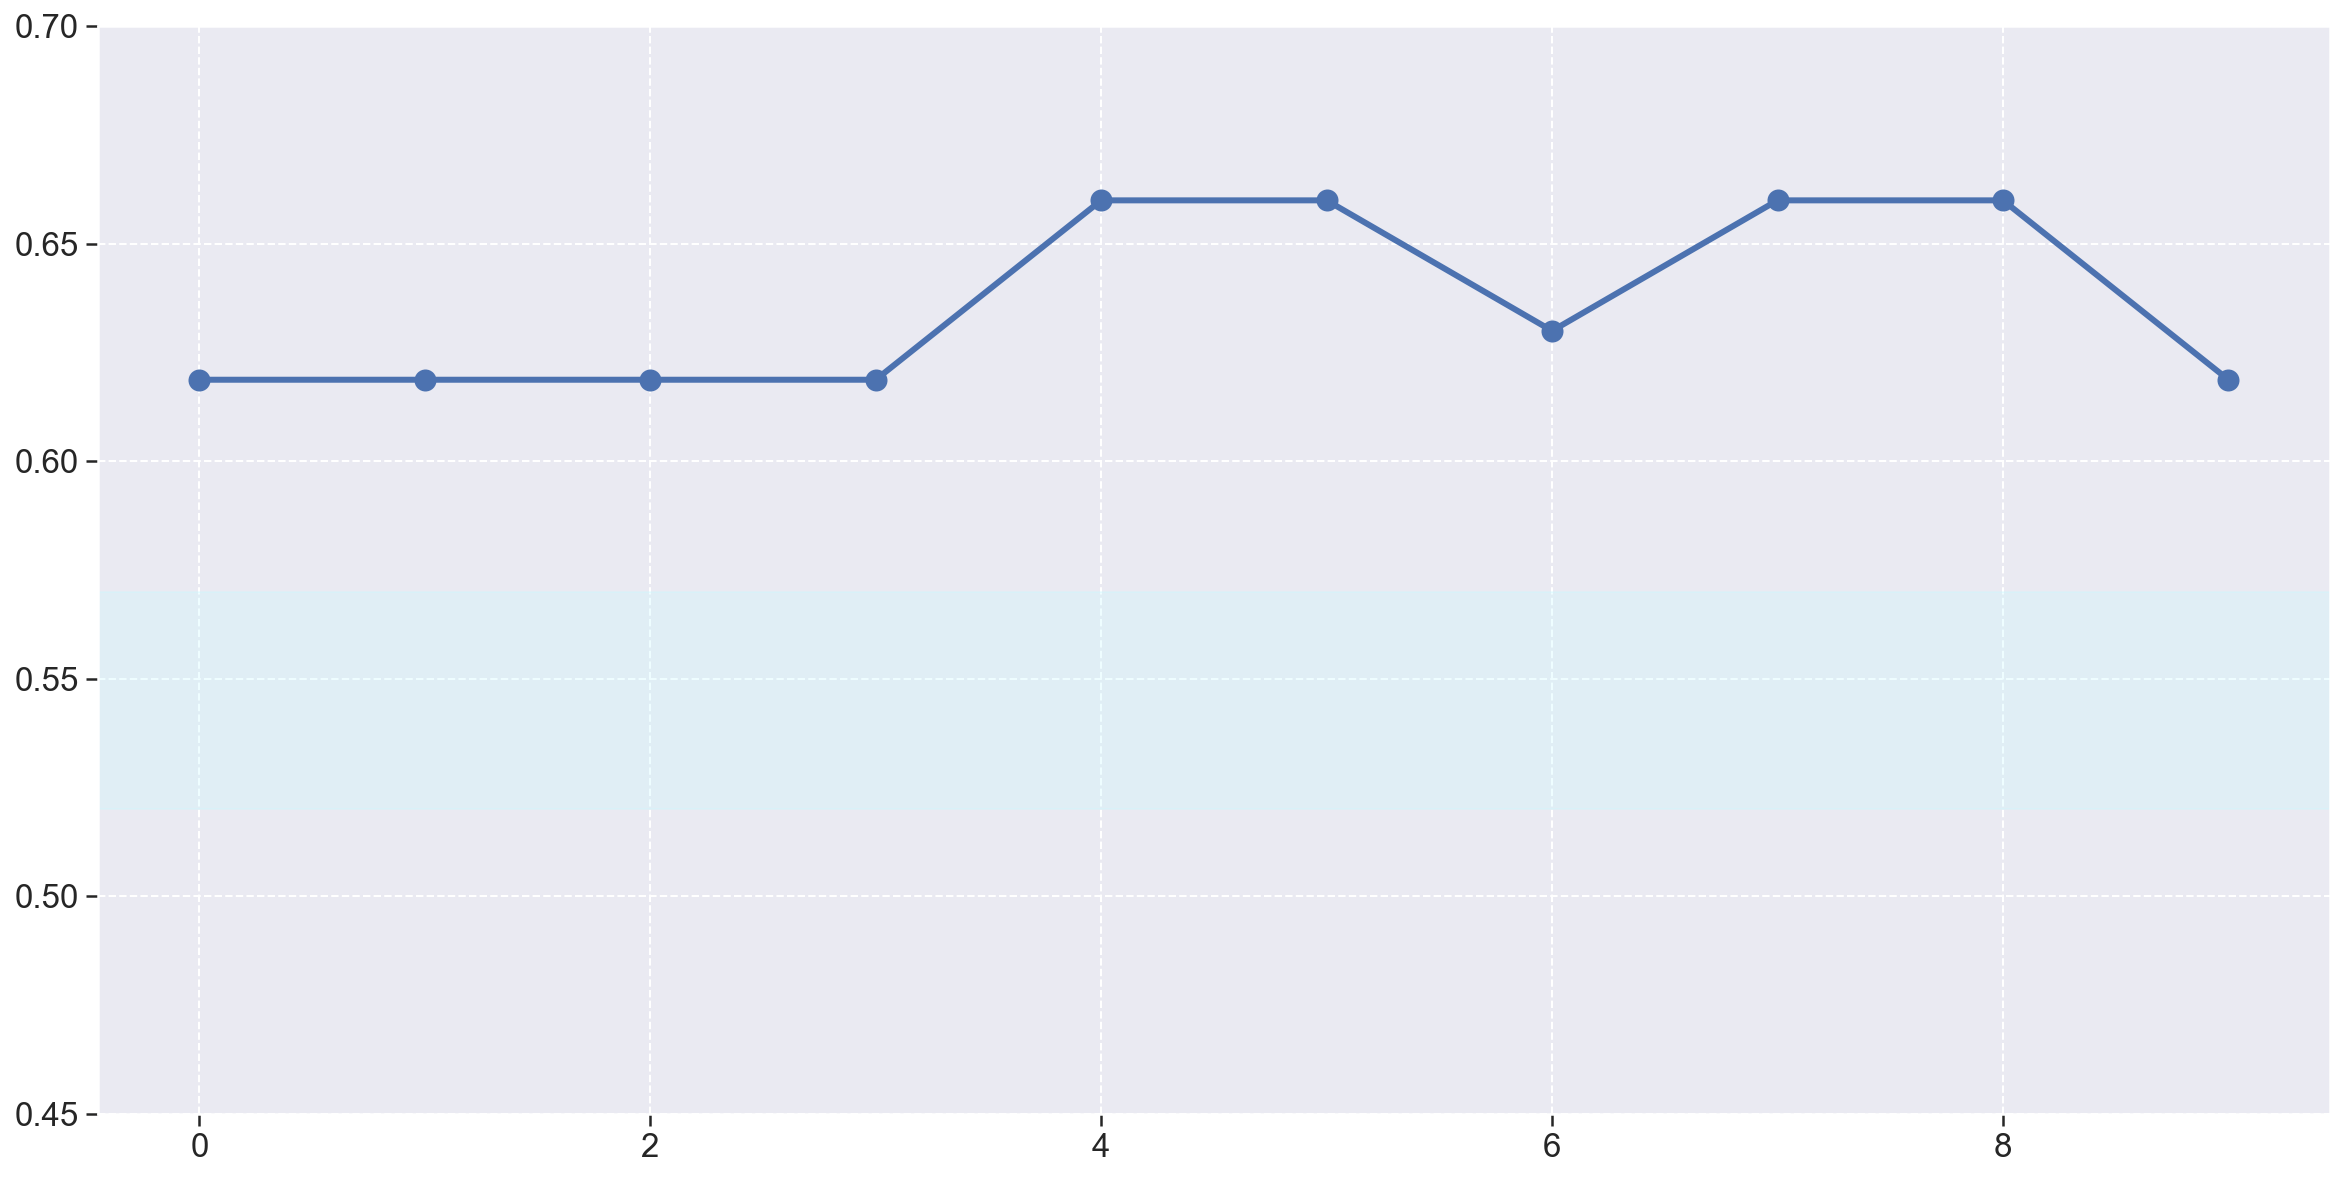

In [165]:
fig = plt.figure(figsize=(20, 10))

plt.plot(repository_metrics["Eccoar_Gateway"]['asc1'], linewidth=3, marker='o', markersize=10)

# Background color
plt.axhspan(.52,.57, color="#c9f9ff", alpha=0.3)

plt.ylim(.45,.7)

(0.45, 0.7)

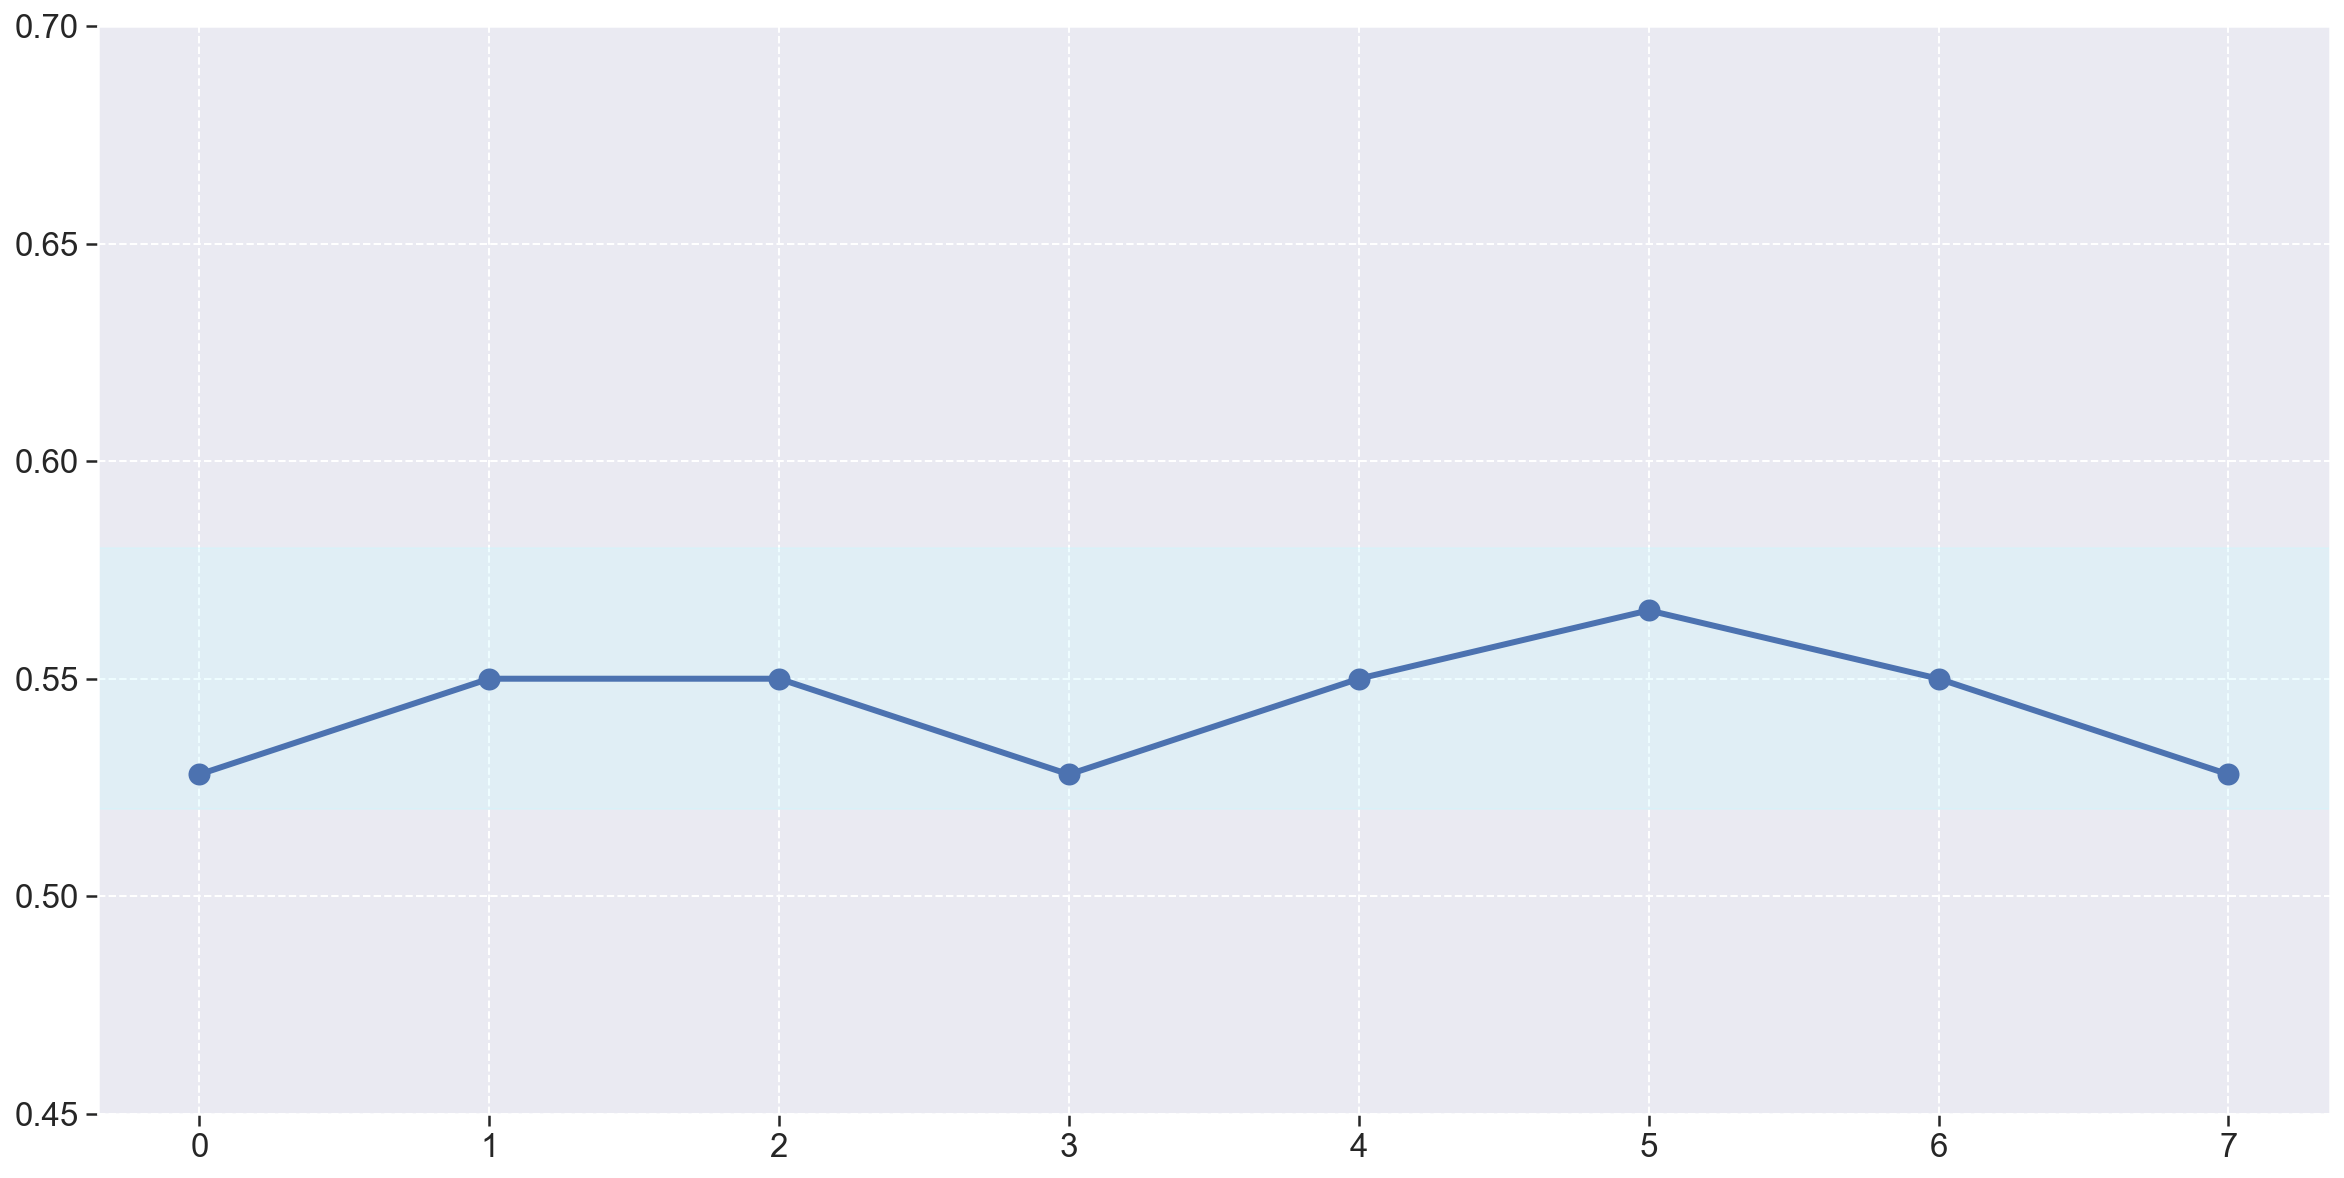

In [166]:
fig = plt.figure(figsize=(20, 10))

plt.plot(repository_metrics["Eccoar_Mailer"]['asc1'], linewidth=3, marker='o', markersize=10)

# Background color
plt.axhspan(.52,.58, color="#c9f9ff", alpha=0.3)

plt.ylim(.45,.7)

(0.45, 0.7)

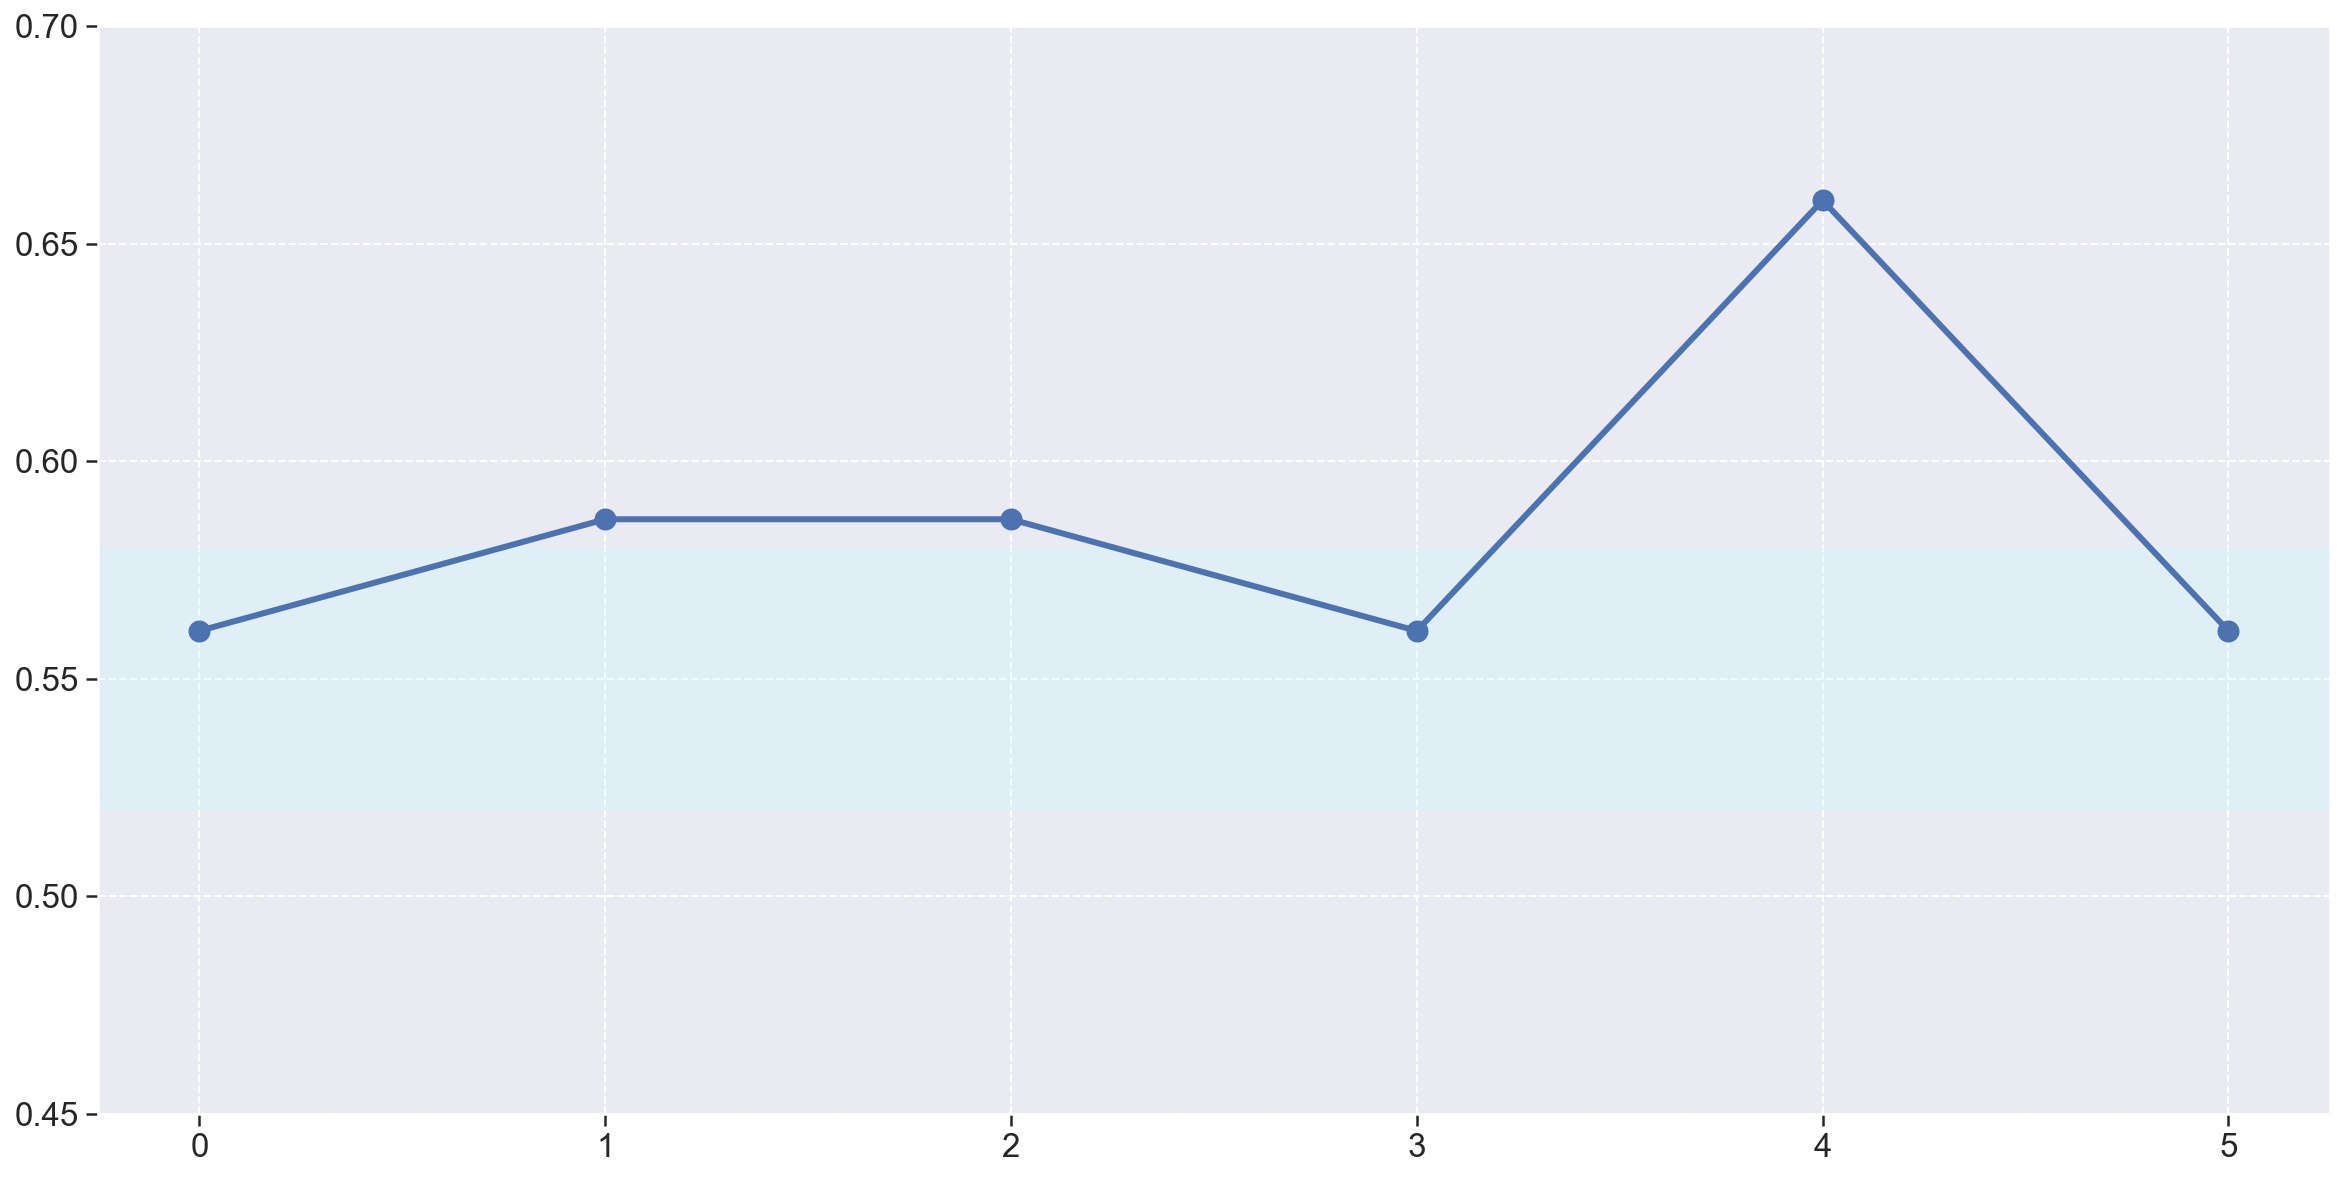

In [167]:
fig = plt.figure(figsize=(20, 10))

plt.plot(repository_metrics["Eccoar_Reports"]['asc1'], linewidth=3, marker='o', markersize=10)

# Background color
plt.axhspan(.52,.58, color="#c9f9ff", alpha=0.3)

plt.ylim(.45,.7)

(0.45, 0.7)

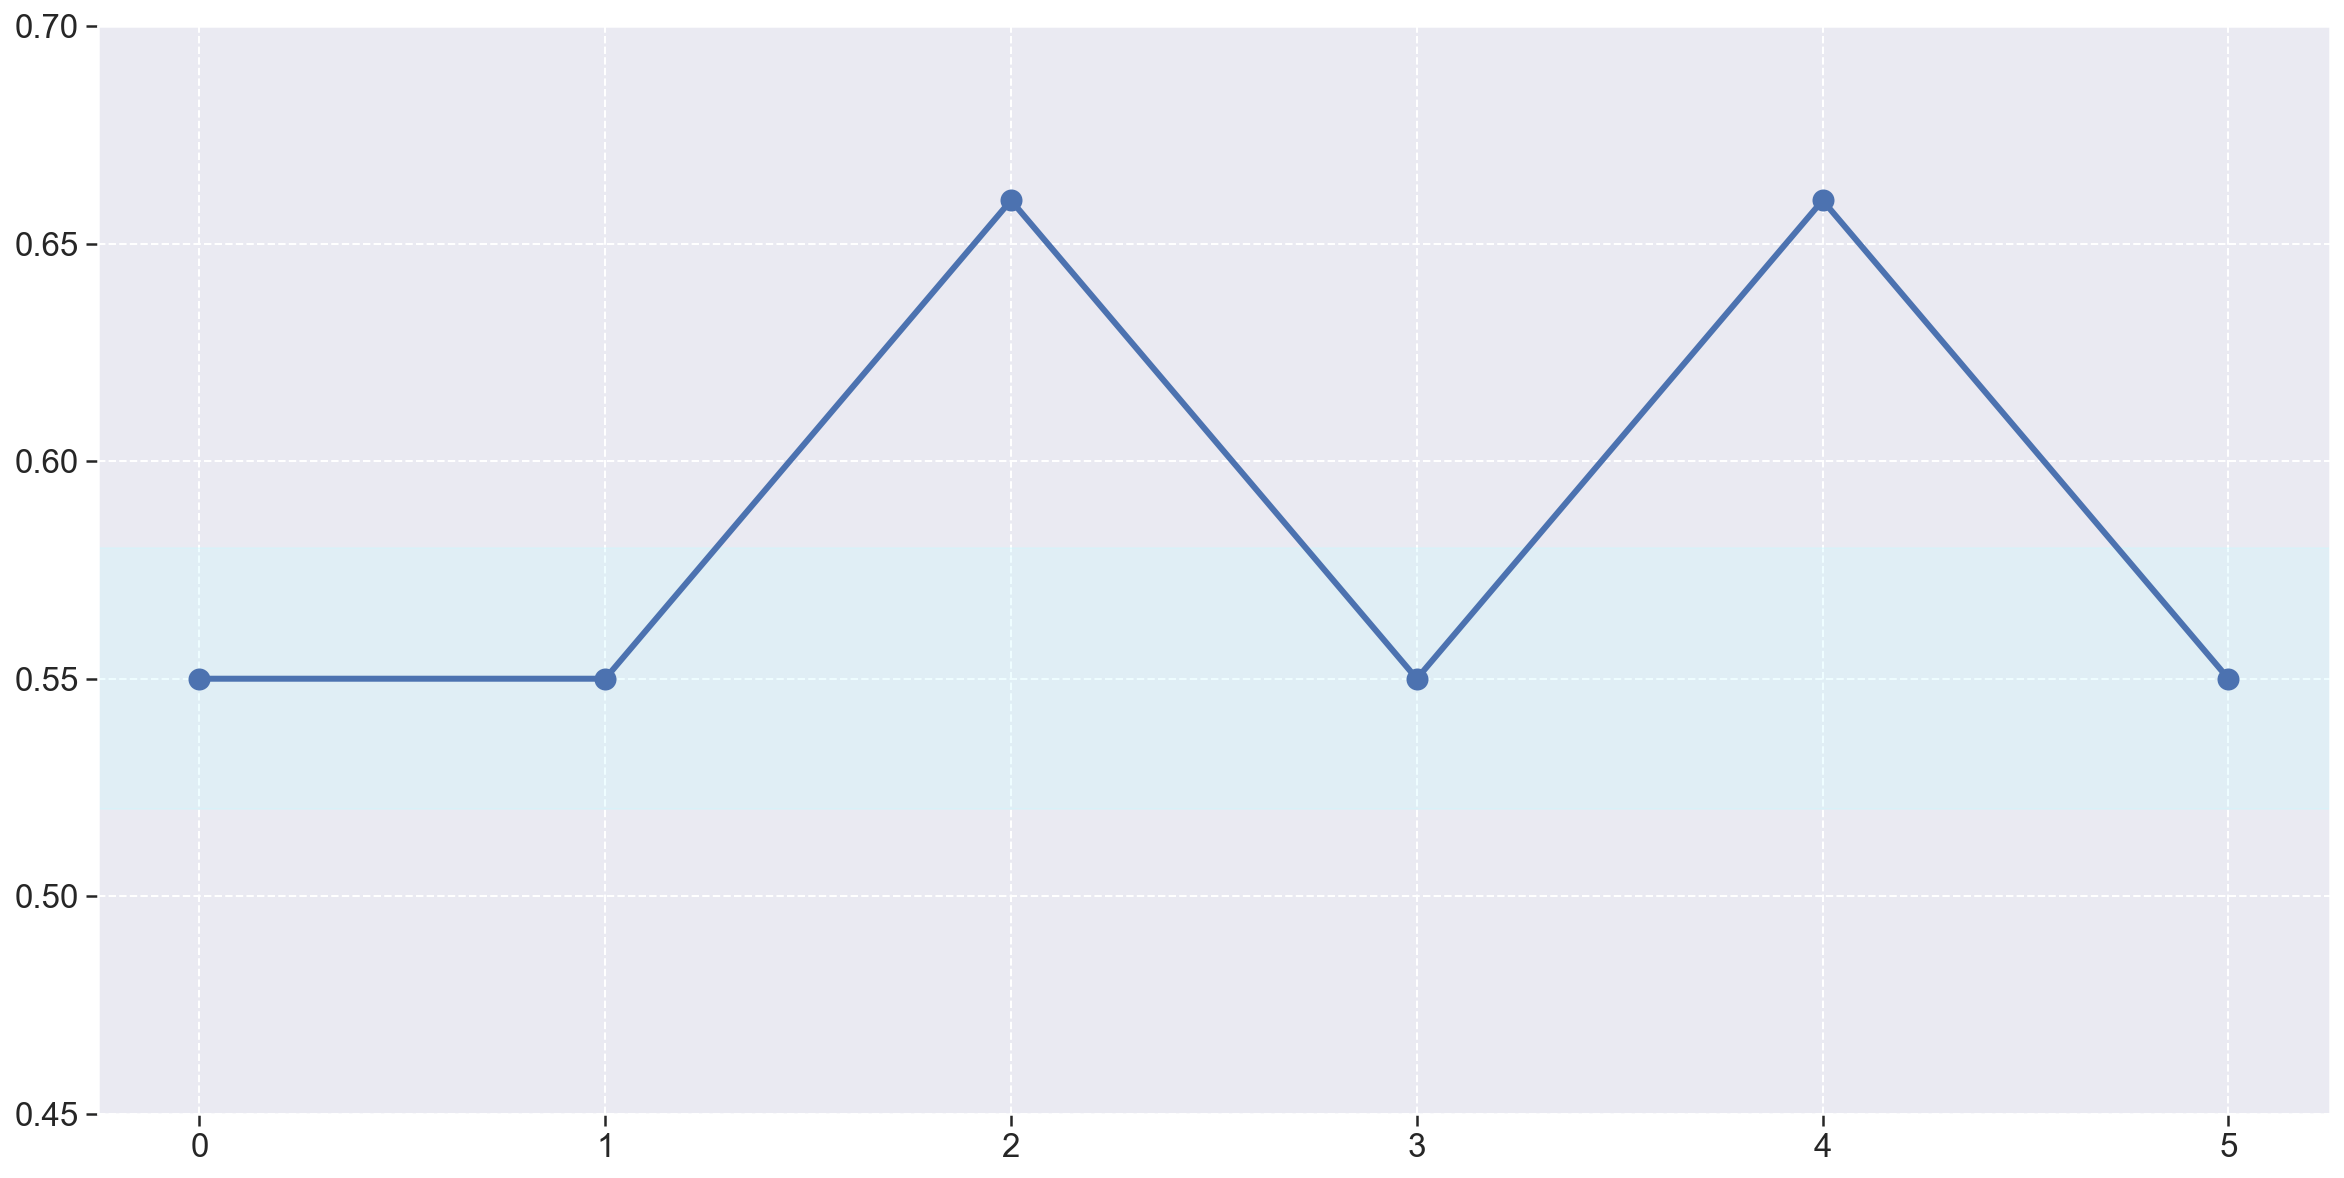

In [168]:
fig = plt.figure(figsize=(20, 10))

plt.plot(repository_metrics["Eccoar_Users"]['asc1'], linewidth=3, marker='o', markersize=10)

# Background color
plt.axhspan(.52,.58, color="#c9f9ff", alpha=0.3)

plt.ylim(.45,.7)

(0.45, 0.7)

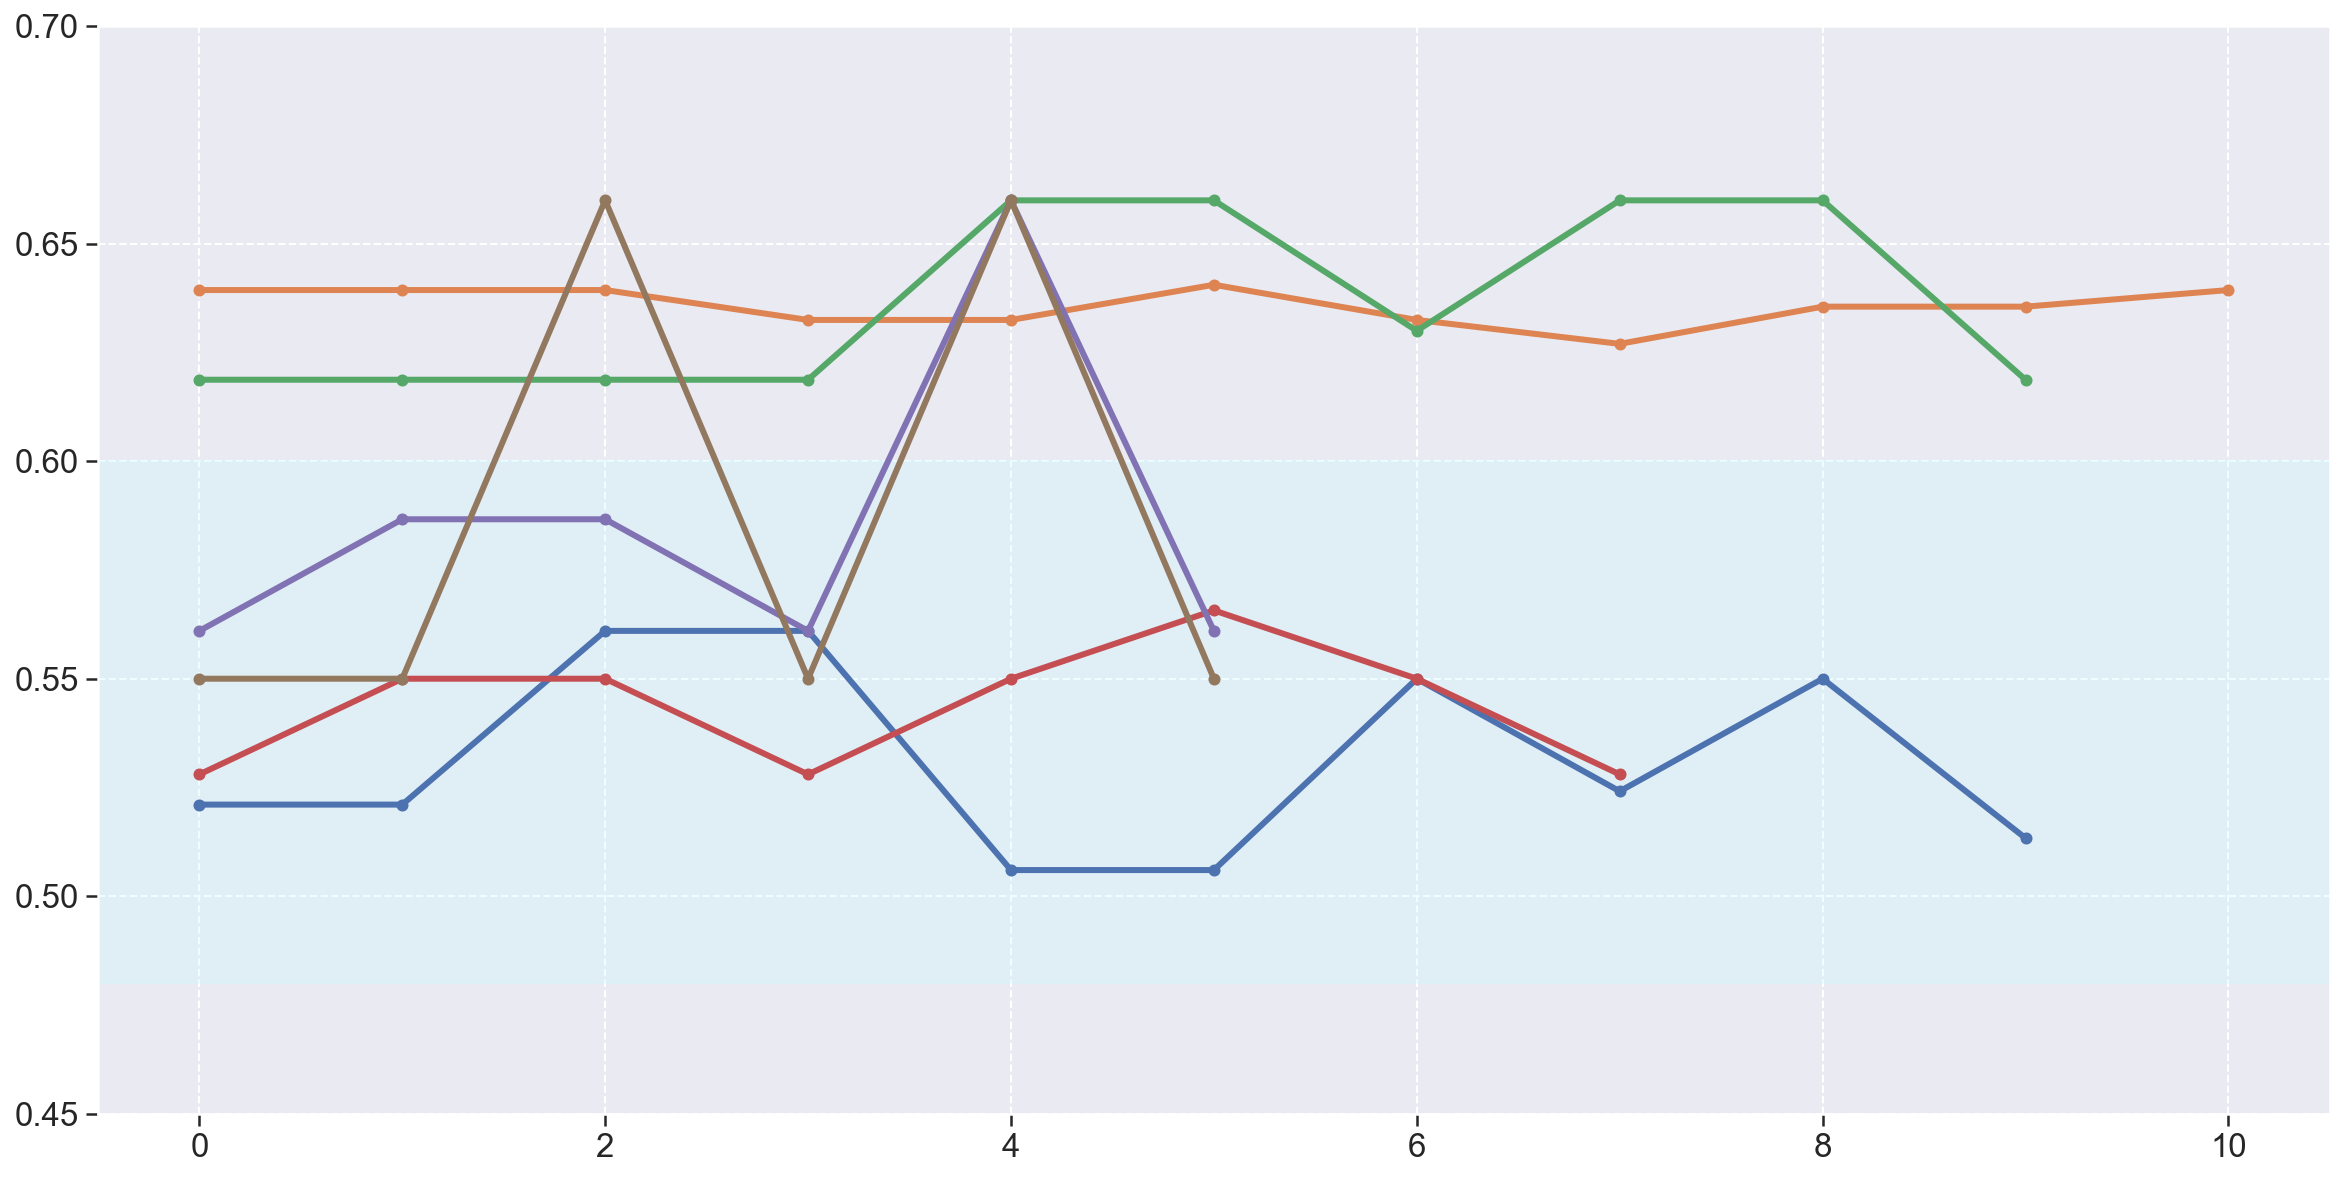

In [169]:
fig = plt.figure(figsize=(20, 10))

plt.plot(repository_metrics["Eccoar_Complaint"]['asc1'], linewidth=3, marker='o', markersize=5)
plt.plot(repository_metrics["eccoar_frontend"]['asc1'], linewidth=3, marker='o', markersize=5)
plt.plot(repository_metrics["Eccoar_Gateway"]['asc1'], linewidth=3, marker='o', markersize=5)
plt.plot(repository_metrics["Eccoar_Mailer"]['asc1'], linewidth=3, marker='o', markersize=5)
plt.plot(repository_metrics["Eccoar_Reports"]['asc1'], linewidth=3, marker='o', markersize=5)
plt.plot(repository_metrics["Eccoar_Users"]['asc1'], linewidth=3, marker='o', markersize=5)

# Background color
plt.axhspan(.48,.6, color="#c9f9ff", alpha=0.3)

plt.ylim(.45,.7)

In [170]:
metrics_df = pd.concat([repository_metrics["Eccoar_Complaint"],
                        repository_metrics["eccoar_frontend"],
                        repository_metrics["Eccoar_Gateway"],
                        repository_metrics["Eccoar_Mailer"],
                        repository_metrics["Eccoar_Reports"],
                        repository_metrics["Eccoar_Users"]], ignore_index=True)

In [171]:
metrics_df['ac1'] = metrics_df['asc1'] * 1
metrics_df['total'] = metrics_df['asc1'] * 1

In [172]:
metrics_df

,m1,m2,m3,repository,version,asc1,ac1,total
0,0.578947,0.000000,1.0,Eccoar_Complaint,01-05-2021-00:00,0.521053,0.521053,0.521053
1,0.578947,0.000000,1.0,Eccoar_Complaint,03-05-2021-00:00,0.521053,0.521053,0.521053
2,0.700000,0.000000,1.0,Eccoar_Complaint,05-05-2021-00:00,0.561000,0.561000,0.561000
3,0.700000,0.000000,1.0,Eccoar_Complaint,10-05-2021-00:00,0.561000,0.561000,0.561000
4,0.533333,0.000000,1.0,Eccoar_Complaint,12-04-2021-00:00,0.506000,0.506000,0.506000
5,0.533333,0.000000,1.0,Eccoar_Complaint,17-04-2021-00:00,0.506000,0.506000,0.506000
6,0.666667,0.000000,1.0,Eccoar_Complaint,17-05-2021-00:00,0.550000,0.550000,0.550000
7,0.588235,0.000000,1.0,Eccoar_Complaint,21-04-2021-00:00,0.524118,0.524118,0.524118
8,0.666667,0.000000,1.0,Eccoar_Complaint,23-03-2021-00:00,0.550000,0.550000,0.550000
9,0.555556,0.000000,1.0,Eccoar_Complaint,27-04-2021-00:00,0.513333,0.513333,0.513333


In [173]:
metrics_df.to_excel('data/fga-eps-mds-2020-2-data/eccoar/qrapids-eccoar-dataset-23-03-2021-24-05-2021-xlsx.xlsx', index = False)
metrics_df.to_csv('data/fga-eps-mds-2020-2-data/eccoar/qrapids-eccoar-dataset-23-03-2021-24-05-2021-csv.csv', header=False, index = False)